# ```Problem Statement :-```

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate 
market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market 
and there are various companies working in the domain. Data science comes as a very important tool to solve problems 
in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and 
focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, 
recommendation systems are some of the machine learning techniques used for achieving the business goals for housing 
companies. Our problem is related to one such housing company.

A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses 
data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same 
purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy houses to enter the market. You are required to build a model 
using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest 
in them or not. For this company wants to know:
* Which variables are important to predict the price of variable?
* How do these variables describe the price of the house?

# ```Business Goal:-```

We are required to model the price of houses with the available independent variables. This model will then be used 
by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the 
strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the 
management to understand the pricing dynamics of a new market.

# ```Technical Requirements:-```

* Data contains 1460 entries each having 81 variables.
* Data contains Null values. You need to treat them using the domain knowledge and your own understanding.
* Extensive EDA has to be performed to gain relationships of important variable and price.
* Data contains numerical as well as categorical variable. You need to handle them accordingly.
* We have to build Machine Learning models, apply regularization and determine the optimal values of Hyper 
Parameters. 
* We need to find important features which affect the price positively or negatively.
*  Two datasets are being provided to you (test.csv, train.csv). You will train on train.csv dataset and predict on 
test.csv file.
- The “Data file.csv” and “Data description.txt” are enclosed with this file.

# ```Import necessary libraries```

In [4752]:
#import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import time
import statistics as st
import statsmodels.api as sm
from scipy.stats import norm, stats
import statistics as st
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PowerTransformer, LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,roc_curve, roc_auc_score, plot_roc_curve
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor
import xgboost as xgb
#import plotty
import warnings
warnings.filterwarnings('ignore')

# ```Reading the CSV Files```

In [4154]:
df1 = pd.read_csv("C://Users//hp-pc//Desktop//Internship22//Housing use case//Project-Housing--2-//Project-Housing_splitted//train.csv")
df1.head() #read the csv file

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  127         120       RL          NaN     4928   Pave   NaN      IR1   
1  889          20       RL         95.0    15865   Pave   NaN      IR1   
2  793          60       RL         92.0     9920   Pave   NaN      IR1   
3  110          20       RL        105.0    11751   Pave   NaN      IR1   
4  422          20       RL          NaN    16635   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2007        WD         Normal     128000  
1     10   2007        WD         Normal     268000  
2      6   2007        WD         Normal     269790  
3      1   2010       COD         Normal     190000  
4      6   2009        WD         Normal     215000  

[5 rows x 81 columns]

In [4155]:
#check the shape of the train dataset
df1.shape

(1168, 81)

In [4156]:
df2 = pd.read_csv("C://Users//hp-pc//Desktop//Internship22//Housing use case//Project-Housing--2-//Project-Housing_splitted//test.csv")
df2.head() #read the csv file

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   337          20       RL         86.0    14157   Pave   NaN      IR1   
1  1018         120       RL          NaN     5814   Pave   NaN      IR1   
2   929          20       RL          NaN    11838   Pave   NaN      Reg   
3  1148          70       RL         75.0    12000   Pave   NaN      Reg   
4  1227          60       RL         86.0    14598   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         HLS    AllPub  ...           0        0    NaN   NaN         NaN   
1         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
2         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   
3         Bnk    AllPub  ...           0        0    NaN   NaN         NaN   
4         Lvl    AllPub  ...           0        0    NaN   NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCondition  
0       0      7    2007        WD         Normal  
1       0      8    2009       COD        Abnorml  
2       0      6    2009        WD         Normal  
3       0      7    2009        WD         Normal  
4       0      1    2008        WD         Normal  

[5 rows x 80 columns]

In [4157]:
#check the shape of test dataset
df2.shape

(292, 80)

* combining the train data & test data into 1 data set to perform all the preprocessing in both data set.

In [4158]:
df = pd.concat([df1, df2], axis = 0)
df

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
..    ...         ...      ...          ...      ...    ...   ...      ...   
287    83          20       RL         78.0    10206   Pave   NaN      Reg   
288  1048          20       RL         57.0     9245   Pave   NaN      IR2   
289    17          20       RL          NaN    11241   Pave   NaN      IR1   
290   523          50       RM         50.0     5000   Pave   NaN      Reg   
291  1379         160       RM         21.0     1953   Pave   NaN      Reg   

    LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3           Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4           Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
..          ...       ...  ...      ...    ...    ...         ...     ...   
287         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
288         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
289         Lvl    AllPub  ...        0    NaN    NaN        Shed     700   
290         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
291         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

    MoSold YrSold  SaleType  SaleCondition  SalePrice  
0        2   2007        WD         Normal   128000.0  
1       10   2007        WD         Normal   268000.0  
2        6   2007        WD         Normal   269790.0  
3        1   2010       COD         Normal   190000.0  
4        6   2009        WD         Normal   215000.0  
..     ...    ...       ...            ...        ...  
287     10   2008        WD         Normal        NaN  
288      2   2008        WD         Normal        NaN  
289      3   2010        WD         Normal        NaN  
290     10   2006        WD         Normal        NaN  
291      6   2006        WD         Normal        NaN  

[1460 rows x 81 columns]

# ```Data Understanding``` 

In [4159]:
#check the shape of the dataset
df.shape

(1460, 81)

In [4160]:
#check the columns 
df.columns 

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [4161]:
#Check the numerical columns and Categorical columns.
def all_columns(i):
    cols = df.columns
    num_cols = df._get_numeric_data().columns
    print("All numeric columns are:- \n \n {0}".format(num_cols))
    print()
    print("Number of Numerical columns are:- {0}".format(len(num_cols)))
    
    cat_cols = list(set(cols)- set(num_cols))
    print()
    print("All Categorical Columns are:- \n \n {0}".format(cat_cols))
    print()
    print("Number of Categorical columns are:- {0}".format(len(cat_cols)))
    
i = df.columns    
all_columns(i)

All numeric columns are:- 
 
 Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

Number of Numerical columns are:- 38

All Categorical Columns are:- 
 
 ['Street', 'LotConfig', 'HouseStyle', 'GarageCond', 'GarageType', 'Condition2', 'Fence', 'Alley', 'LotShape', 'LandContour', 'BsmtFinType2', 'Utilities', 'Functional', 'BsmtQual', 'MSZoning', 'ExterQual', 'FireplaceQu', 'MiscFeature', 'BsmtCond', 'CentralAir', 'MasVnrType', 'BldgType', 'Electrical'

In [4162]:
#check the parameter
df.describe() 

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1168.000000  
mean      2.758904     43.489041     6.321918  2007.815753  181477.005993  
std      40.177307    496.123024     2.703626     1.328095   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

In [4163]:
#check the datatype 
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 0 to 291
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallCo

In [4164]:
#check the duplicate values
df.duplicated().sum() 

0

In [4165]:
#check the null values
df.isnull().sum().head(50) 

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
Alley           1369
LotShape           0
LandContour        0
Utilities          0
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        0
Exterior2nd        0
MasVnrType         8
MasVnrArea         8
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinSF1         0
BsmtFinType2      38
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath 

In [4166]:
#check the skewness
df.skew() 

Id                0.000000
MSSubClass        1.407657
LotFrontage       2.163569
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.669084
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
BedroomAbvGr      0.211790
KitchenAbvGr      4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.649415
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
S

In [4167]:
#check the zero values
df.all().tail(20)

GarageCars       False
GarageArea       False
GarageQual        True
GarageCond        True
PavedDrive        True
WoodDeckSF       False
OpenPorchSF      False
EnclosedPorch    False
3SsnPorch        False
ScreenPorch      False
PoolArea         False
PoolQC            True
Fence             True
MiscFeature       True
MiscVal          False
MoSold            True
YrSold            True
SaleType          True
SaleCondition     True
SalePrice         True
dtype: bool

# ```Documentation:-```

* There are two dataset, one is Train dataset and another one is test dataset.
* Train dataset contains 1168 rows and 81 columns, including label (Saleprice)
* Test dataset contains 292 rows and 80 columns
* There are 38 numerical columns
* There are 43 categorical columns
* Thses columns like ```Alley```, ```LotFrontage```, ```BsmtQual```, ```BsmtCond```,```BsmtExposure```,```BsmtFinType1```, ```BsmtFinType2```,```Electrical``` contains null values.
* Some columns are in float form and some are in object form.
* there is no duplicate values present in the dataset.
* Many columns are skewed and Some columns like ```MiscVal```, ```PoolArea```, ```3SsnPorch```, ```LotArea``` are highly skewed.
* Some columns contains zero values.

# ```Cleaning and Analysing the columns one by one:```

* First, We see all numerical columns

```Column1: Id```

In [4168]:
df['Id'].unique() #check the unique values

array([ 127,  889,  793, ...,   17,  523, 1379], dtype=int64)

In [4169]:
df['Id'].value_counts() #check the count of unique value

1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: Id, Length: 1460, dtype: int64

In [4170]:
df['Id'].duplicated().sum() #check the duplicate values

0

```Observation:```
1. We can see here, there is no duplicate values present, all Id values are unique.

```Column2: MSSubClass: Identifies the type of dwelling involved in the sale.```

* 20 - 1-STORY 1946 & NEWER ALL STYLES
* 30 - 1-STORY 1945 & OLDER
* 40 - 1-STORY W/FINISHED ATTIC ALL AGES
* 45 - 1-1/2 STORY - UNFINISHED ALL AGES
* 50 - 1-1/2 STORY FINISHED ALL AGES
* 60 - 2-STORY 1946 & NEWER
* 70 - 2-STORY 1945 & OLDER
* 75 - 2-1/2 STORY ALL AGES
* 80 - SPLIT OR MULTI-LEVEL
* 85 - SPLIT FOYER
* 90 - DUPLEX - ALL STYLES AND AGES
* 120 - 1-STORY PUD (Planned Unit Development) - 1946 & NEWER
* 150 - 1-1/2 STORY PUD - ALL AGES
* 160 - 2-STORY PUD - 1946 & NEWER
* 180 - PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
* 190 - 2 FAMILY CONVERSION - ALL STYLES AND AGES

In [4171]:
#check the unique values
df['MSSubClass'].unique() 

array([120,  20,  60,  50,  70,  30, 160,  85,  45,  90,  40,  80, 190,
        75, 180], dtype=int64)

In [4172]:
#check the count of unique value
df['MSSubClass'].value_counts() 

20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64

In [4173]:
#check the count of unique value in terms of percentage
df['MSSubClass'].value_counts(normalize = True) 

20     0.367123
60     0.204795
50     0.098630
120    0.059589
30     0.047260
160    0.043151
70     0.041096
80     0.039726
90     0.035616
190    0.020548
85     0.013699
75     0.010959
45     0.008219
180    0.006849
40     0.002740
Name: MSSubClass, dtype: float64

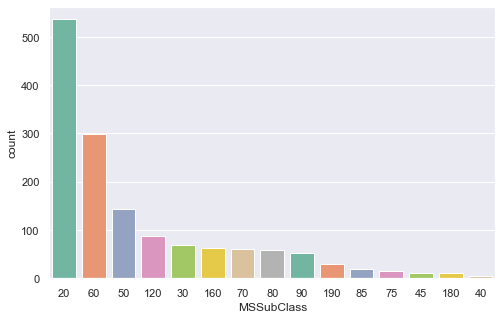

In [4174]:
#plotting each class frequency
fig = plt.figure(figsize=(8,5))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="MSSubClass",palette="Set2", data=df, order = df["MSSubClass"].value_counts().index)
plt.show()

```Observation:```
1. 20 - 1-STORY 1946 & NEWER ALL STYLES has more counts than other.
2. 40	1-STORY W/FINISHED ATTIC ALL AGES has less number of counts.

```Column3: LotFrontage:- Linear feet of street connected to property```

In [4175]:
#check the unique value
df['LotFrontage'].unique() 

array([ nan,  95.,  92., 105.,  58.,  88.,  70.,  80.,  50.,  44., 129.,
        59.,  55.,  64.,  24.,  68.,  71.,  74.,  61.,  60., 120.,  84.,
       141.,  30.,  65.,  76., 100.,  85.,  75., 107., 122.,  82.,  62.,
        73.,  79.,  77.,  41.,  69.,  90.,  96.,  72.,  34.,  78.,  63.,
        40.,  98., 160., 108., 128.,  51.,  81.,  99.,  66.,  37., 174.,
        87.,  53., 152.,  47.,  86.,  56.,  89.,  35.,  52.,  21., 104.,
        57.,  83.,  46., 101., 112., 149.,  93.,  49.,  43., 130.,  54.,
        91.,  67.,  97., 110., 103., 115.,  94.,  48.,  36., 313., 109.,
       144., 121., 102., 116., 182.,  32.,  42., 168., 118.,  38., 140.,
       134., 114., 124.,  39., 111.,  45., 106., 153.,  33., 138., 137.,
       150.])

In [4176]:
#check the count of unique value
df['LotFrontage'].value_counts()

60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
153.0      1
144.0      1
39.0       1
168.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64

In [4177]:
#check the null values
df['LotFrontage'].isnull().sum()

259

In [4178]:
#Treating the null values by using interpolate method
df['LotFrontage'] = df['LotFrontage'].interpolate(method = 'linear', limit_direction='forward')

In [4179]:
#check the null values
df['LotFrontage'].isnull().sum()

1

In [4180]:
#treating the null values by using bfill method
df['LotFrontage'] = df['LotFrontage'].bfill()

In [4181]:
#check the null values
df['LotFrontage'].isnull().sum()

0

In [4182]:
#check the zero values
df['LotFrontage'].all()

True

In [4183]:
#check the count of unique value
df['LotFrontage'].value_counts()

60.000000     150
70.000000      73
80.000000      72
50.000000      59
75.000000      54
             ... 
75.750000       1
116.500000      1
74.666667       1
46.333333       1
78.333333       1
Name: LotFrontage, Length: 208, dtype: int64

```Analysis with other features```

Text(0, 0.5, 'LotFrontage')

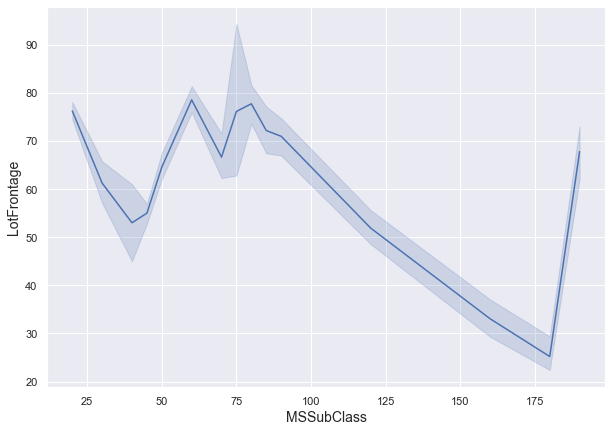

In [4184]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'MSSubClass',y= 'LotFrontage', data=df)
plt.xlabel('MSSubClass', fontsize = 14)
plt.ylabel('LotFrontage', fontsize = 14)

```Observation:```
1. We can clearly see here. this feature is imbalanced and mainly, 60 feet is more than others.
2. We can see, 1-STORY 1946 & NEWER ALL STYLES is highly related with 60 feet.
3. In commercial, 40% is 60 linear feet of street connected to property to residential low density
4. Approximately 9% of 60 feet is connected to RL

```Column4: LotArea: Lot size in square feet```

In [4185]:
#check the unique values
df["LotArea"].unique() 

array([ 4928, 15865,  9920, ..., 10175, 11241,  1953], dtype=int64)

In [4186]:
#check the count of unique values
df["LotArea"].value_counts()

7200     25
9600     24
6000     17
9000     14
8400     14
         ..
6858      1
13005     1
8910      1
17104     1
8190      1
Name: LotArea, Length: 1073, dtype: int64

In [4187]:
def parameter(i):
    a = i.all()
    b = i.isnull().sum()
    c = i.skew()
    
    print("The zero values of this column  is:- {0}".format(a))
    print()
    time.sleep(1)
    print("The null values of this column is:-  {0}".format(b))
    print()
    time.sleep(1)
    print("The skewness of this column is:- {0}".format(c))
    
    
i = df['LotArea']
parameter(i)

The zero values of this column  is:- True

The null values of this column is:-  0

The skewness of this column is:- 12.207687851233496


There is no zero values in this column and No null values are there but column is highly skewed, Now, lets check the mean, median and mode of this column

In [4188]:
def measures(i):
    a = i.mean()
    b = i.median()
    c = st.mode(i)
    d = i.std()
    
    print("The mean of this column is:- {0}".format(a))
    print()
    time.sleep(1)
    print("The median of this column is:- {0}".format(b))
    print()
    time.sleep(1)
    print("The mode of this column is:- {0}".format(c))
    print()
    time.sleep(1)
    print("The Standard deviation of this column is:- {0}".format(d))
    
i = df['LotArea']
measures(i)

The mean of this column is:- 10516.828082191782

The median of this column is:- 9478.5

The mode of this column is:- 7200

The Standard deviation of this column is:- 9981.264932379156


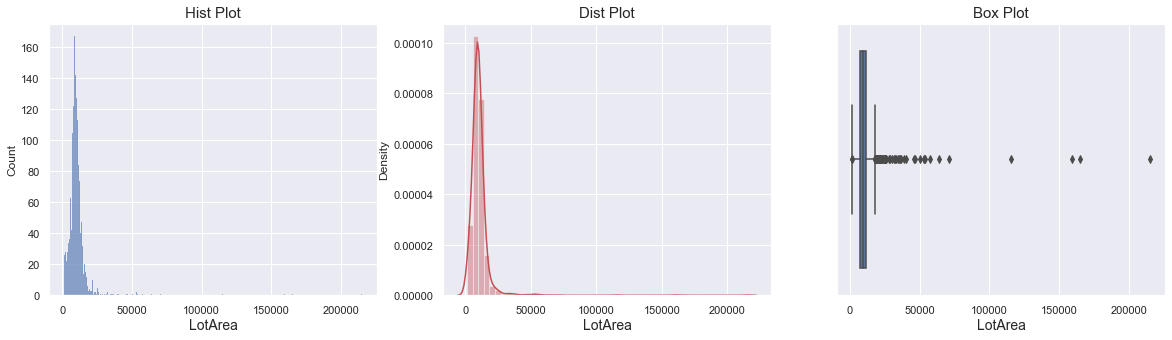

In [4189]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LotArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LotArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LotArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)
plt.show()

We see here, mean, median, mode values are not similar because this column is highly negatively skewed and there are lot of outliers present,so, we need to first remove these outliers and then try to remove the skewness to get a normal curve.

```Removing the outliers by using IQR Method.```

In [4190]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['LotArea'], 24,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['LotArea'], 73,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['LotArea'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['LotArea'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 3902.5

 **************************************************
Higher range:-
 (array([  25,   26,   32,   40,   56,   68,  103,  113,  119,  192,  206,
        211,  245,  251,  267,  284,  290,  310,  356,  361,  440,  441,
        488,  489,  500,  507,  528,  533,  561,  570,  584,  592,  600,
        626,  639,  642,  649,  689,  691,  716,  717,  800,  833,  839,
        840,  858,  864,  887,  896,  914,  974,  980, 1038, 1039, 1053,
       1057, 1081, 1082, 1094, 1120, 1123, 1180, 1181, 1281, 1295, 1299,
       1309, 1324, 1325, 1349, 1415, 1418, 1428, 1429, 1441], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 75

 **************************************************
Lower range:- 
 (array([ 537,  679,  698,  831,  902, 1288], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 6

 ****************************************

In [4191]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1460, 81)
New Shape:------>  (1349, 81)


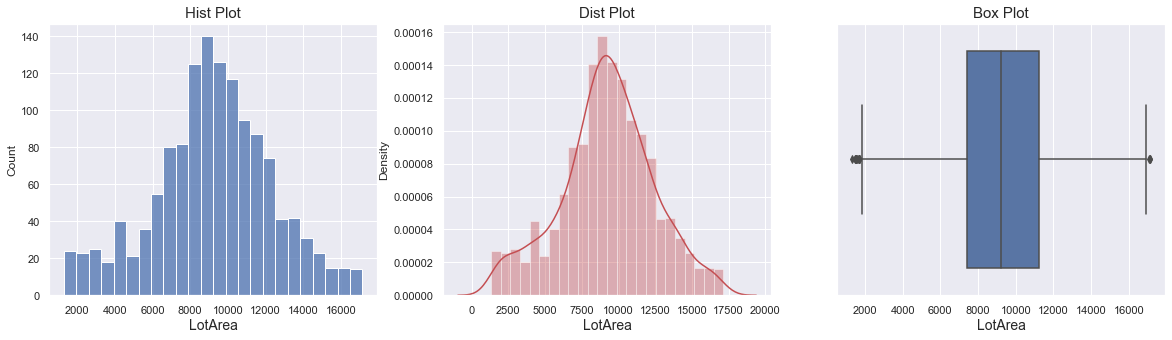

In [4192]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LotArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LotArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LotArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)
plt.show()

In [4193]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['LotArea'], 26,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['LotArea'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['LotArea'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['LotArea'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 3714.0

 **************************************************
Higher range:-
 (array([ 334,  431,  920, 1330], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 4

 **************************************************
Lower range:- 
 (array([ 158,  210,  386,  495,  516,  604,  627,  644,  652,  702,  772,
        801,  835,  847, 1067, 1120, 1141, 1197, 1261, 1271, 1317],
      dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 21

 **************************************************


In [4194]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1349, 81)
New Shape:------>  (1315, 81)


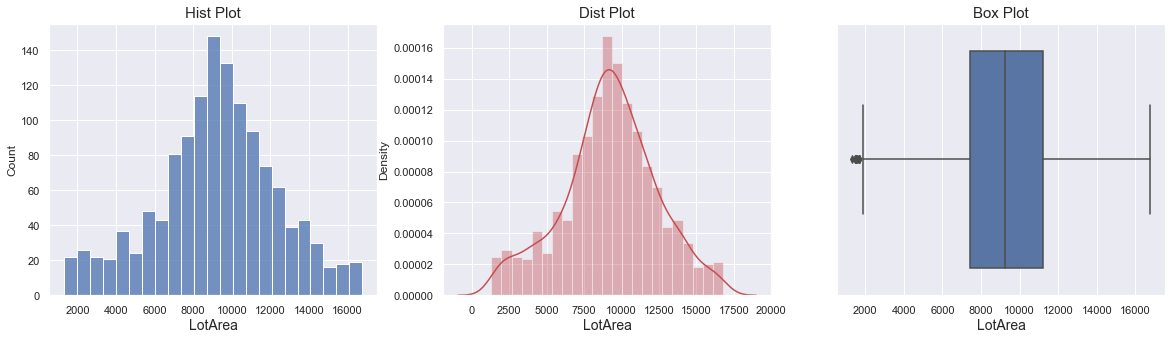

In [4195]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LotArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LotArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LotArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)
plt.show()

In [4196]:
df=df[df['LotArea']>2150].reset_index(drop=True)
time.sleep(1)
df=df[df['LotArea']<16500].reset_index(drop=True)

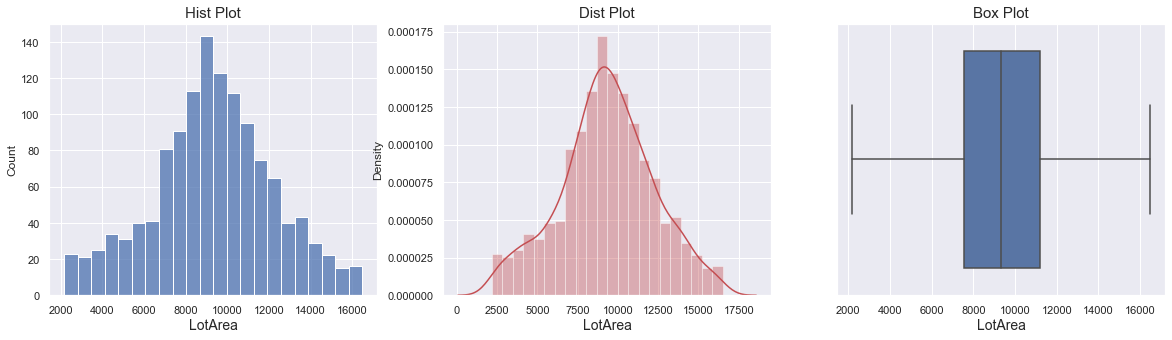

In [4197]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LotArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LotArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LotArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)
plt.show()

In [4198]:
def measures(i):
    a = i.mean()
    b = i.median()
    c = st.mode(i)
    d = i.std()
    
    print("The mean of this column is:- {0}".format(a))
    print()
    time.sleep(1)
    print("The median of this column is:- {0}".format(b))
    print()
    time.sleep(1)
    print("The mode of this column is:- {0}".format(c))
    print()
    time.sleep(1)
    print("The Standard deviation of this column is:- {0}".format(d))
    
i = df['LotArea']
measures(i)

The mean of this column is:- 9312.634585289516

The median of this column is:- 9308.0

The mode of this column is:- 9600

The Standard deviation of this column is:- 2920.9598475453354


In [4199]:
#replace the mode value by mean value
df['LotArea'] = df['LotArea'].replace(9600, df['LotArea'].mean())

In [4200]:
#Now check the mean, mode, median and standard deviation value
def measures(i):
    a = i.mean()
    b = i.median()
    c = st.mode(i)
    d = i.std()
    
    print("The mean of this column is:- {0}".format(a))
    print()
    time.sleep(1)
    print("The median of this column is:- {0}".format(b))
    print()
    time.sleep(1)
    print("The mode of this column is:- {0}".format(c))
    print()
    time.sleep(1)
    print("The Standard deviation of this column is:- {0}".format(d))
    
i = df['LotArea']
measures(i)

The mean of this column is:- 9307.238051679926

The median of this column is:- 9307.817292644759

The mode of this column is:- 9312.634585289516

The Standard deviation of this column is:- 2920.689181354636


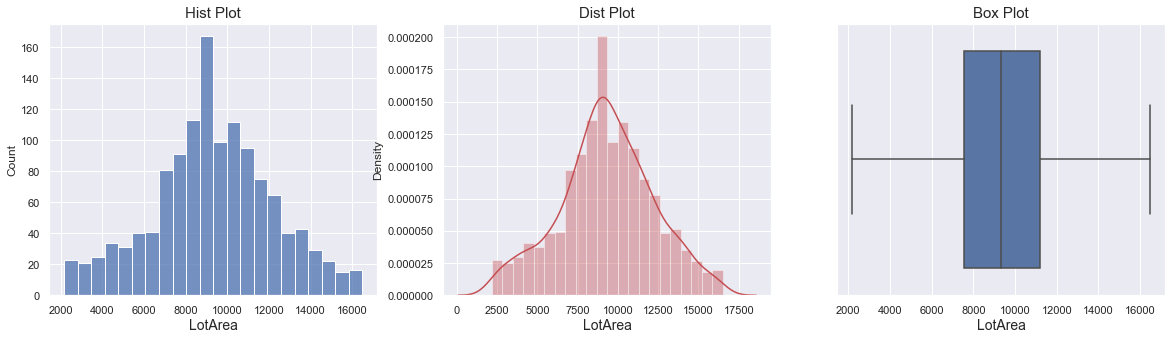

In [4201]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LotArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LotArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LotArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('LotArea', fontsize= 14)
plt.show()

In [4202]:
#Now, check the skewness
df['LotArea'].skew()

-0.08417327538434824

Now, we can see, we almost get a normal curve and we improve the skewness successfully from 12.20 to -0.08.We improved the mean, median and mode values, all these values are almost similar to each other, Now, we can analyze this column ```LotArea``` to other columns like ```MSSubClass```, ```MSZoning```, ```LotFrontage```

```Analysis of this feature with other features```

Text(0, 0.5, 'LotArea')

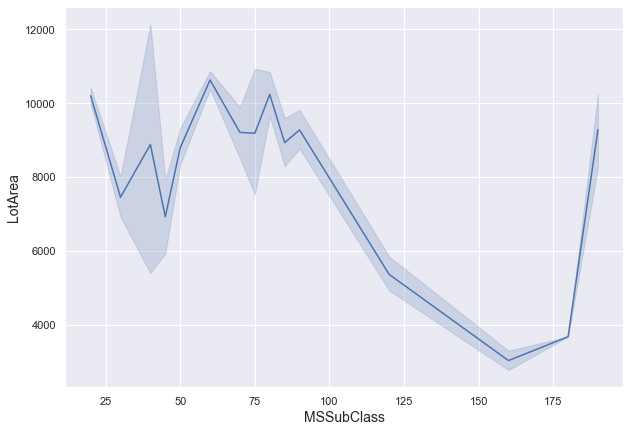

In [4203]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'MSSubClass',y= 'LotArea', data=df)
plt.xlabel('MSSubClass', fontsize = 14)
plt.ylabel('LotArea', fontsize = 14)

Text(0, 0.5, 'LotArea')

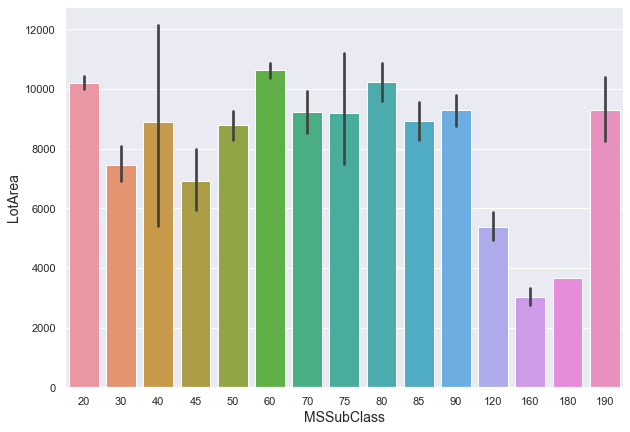

In [4204]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.barplot(x= 'MSSubClass',y= 'LotArea', data=df)
plt.xlabel('MSSubClass', fontsize = 14)
plt.ylabel('LotArea', fontsize = 14)

```Observation:```
1. we see, The variance of 40-1-STORY W/FINISHED ATTIC ALL AGES is high.
2. Lot Area of 160-2-STORY PUD - 1946 & NEWER is very less. 
3. Lot area of low residential density lies between 8000-10000
4. Approximately, the range of 50 - 100 linear feet of street connected to property related to 6000 - 10000 lot area.

```Column5: MSZoning: Identifies the general zoning classification of the sale.```

* A - Agriculture
* C - Commercial
* FV - Floating Village Residential
* I - Industrial
* RH - Residential High Density
* RL - Residential Low Density
* RP - Residential Low Density Park 
* RM - Residential Medium Density

In [4209]:
df['MSZoning'].unique() #check the unique value

array(['RL', 'RM', 'RH', 'FV', 'C (all)'], dtype=object)

In [4210]:
df['MSZoning'].value_counts() #check the count of unique values

RL         1017
RM          179
FV           57
RH           16
C (all)       9
Name: MSZoning, dtype: int64

In [4211]:
df['MSZoning'].value_counts(normalize = True) #check the count of unique values

RL         0.795775
RM         0.140063
FV         0.044601
RH         0.012520
C (all)    0.007042
Name: MSZoning, dtype: float64

```Analysis of this feature with other features```

<AxesSubplot:xlabel='MSSubClass', ylabel='count'>

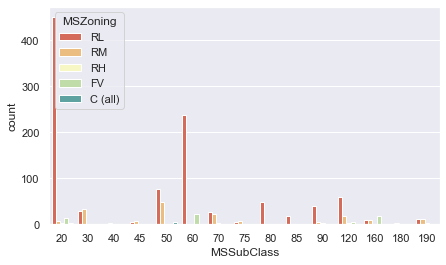

In [4212]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'MSSubClass', hue = 'MSZoning', data = df, palette = 'Spectral')

In [4213]:
#check the relationship between features
df.groupby("MSZoning")["MSSubClass"].value_counts() 

MSZoning  MSSubClass
C (all)   50              4
          20              2
          30              1
          70              1
          190             1
FV        60             22
          160            17
          20             13
          120             5
RH        20              3
          70              3
          90              3
          120             2
          190             2
          30              1
          45              1
          50              1
RL        20            450
          60            238
          50             76
          120            59
          80             48
          90             40
          30             29
          70             26
          85             19
          190            12
          160            10
          75              5
          45              4
          40              1
RM        50             49
          30             33
          70             23
          120            19

In [4214]:
#check the relationship between features in terms of percentage
df.groupby("MSZoning")["MSSubClass"].value_counts(normalize = True)

MSZoning  MSSubClass
C (all)   50            0.444444
          20            0.222222
          30            0.111111
          70            0.111111
          190           0.111111
FV        60            0.385965
          160           0.298246
          20            0.228070
          120           0.087719
RH        20            0.187500
          70            0.187500
          90            0.187500
          120           0.125000
          190           0.125000
          30            0.062500
          45            0.062500
          50            0.062500
RL        20            0.442478
          60            0.234022
          50            0.074730
          120           0.058014
          80            0.047198
          90            0.039331
          30            0.028515
          70            0.025565
          85            0.018682
          190           0.011799
          160           0.009833
          75            0.004916
          45          

Text(0, 0.5, 'MSZoning')

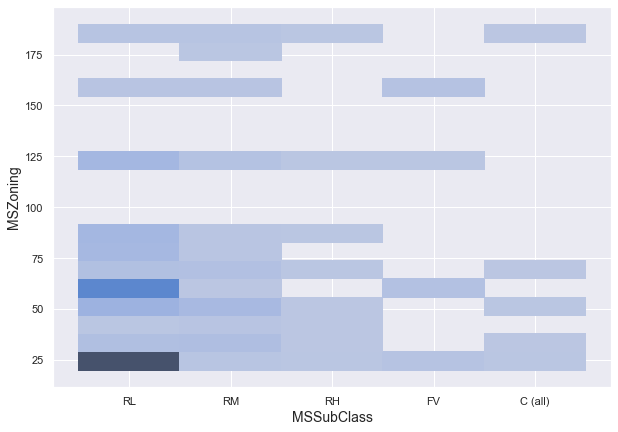

In [4215]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.histplot(x= 'MSZoning',y= 'MSSubClass', data=df)
plt.xlabel('MSSubClass', fontsize = 14)
plt.ylabel('MSZoning', fontsize = 14)

In [4217]:
#check the relationship between features
df.groupby("MSZoning")["LotFrontage"].value_counts(normalize = True).head(50)

MSZoning  LotFrontage
C (all)   60.0           0.444444
          50.0           0.222222
          66.0           0.222222
          105.0          0.111111
FV        75.0           0.157895
          24.0           0.087719
          35.0           0.070175
          65.0           0.070175
          72.0           0.070175
          30.0           0.052632
          34.0           0.052632
          84.0           0.052632
          85.0           0.052632
          60.0           0.035088
          62.0           0.035088
          69.0           0.035088
          37.0           0.017544
          40.0           0.017544
          47.0           0.017544
          50.0           0.017544
          59.0           0.017544
          64.0           0.017544
          66.0           0.017544
          71.5           0.017544
          79.0           0.017544
          81.0           0.017544
          94.0           0.017544
          95.0           0.017544
          102.0          0

```Observation```

1. We can see here, there is no Agriculture, Industrial and Residential Low density park
2. Mostly houses are residential low density, approximately 78%
3. Mostly Low Residential areas are 1-STORY 1946 & NEWER ALL STYLES.
4. In Commercial, there are no 1-1/2 STORY PUD - ALL AGES, 2-STORY PUD - 1946 & NEWER, PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
5. Same for Floating Village Residential, they are also less.

```Column6: Street: Type of road access to property```

1. Grvl Gravel	
2. Pave Paved

In [4218]:
df["Street"].unique() #check the unique values

array(['Pave', 'Grvl'], dtype=object)

In [4219]:
df["Street"].value_counts()

Pave    1275
Grvl       3
Name: Street, dtype: int64

Text(0, 0.5, 'Counts')

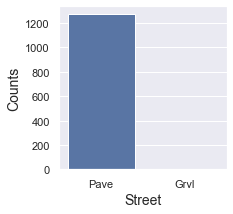

In [4220]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'Street', data=df)
plt.xlabel('Street', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4221]:
#drop the column
df.drop(columns = "Street", inplace = True)

```Observation:```
1. This column is highly imbalanced and contain only one value, So, it will not affect much on our accuracy.
2. That's why we drop this column

```Column7: Alley: Type of alley access to property```

1. Grvl - Gravel
2. Pave	- Paved
3. NA - No alley access

In [4222]:
df["Alley"].unique() #check tyhe unique values

array([nan, 'Grvl', 'Pave'], dtype=object)

In [4223]:
df["Alley"].value_counts()

Grvl    46
Pave    39
Name: Alley, dtype: int64

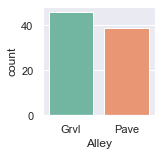

In [4224]:
#plotting each class frequency
fig = plt.figure(figsize=(2,2))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Alley",palette="Set2", data=df, order = df["Alley"].value_counts().index)
plt.show()

In [4225]:
df["Alley"].isnull().sum()

1193

In [4226]:
df["Alley"] = df["Alley"].bfill()

In [4227]:
df["Alley"].isnull().sum()

19

In [4228]:
df["Alley"] = df["Alley"].pad()

In [4229]:
df["Alley"].isnull().sum()

0

In [4230]:
df["Alley"].value_counts()

Pave    677
Grvl    601
Name: Alley, dtype: int64

```Analysis of this feature with other features```

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

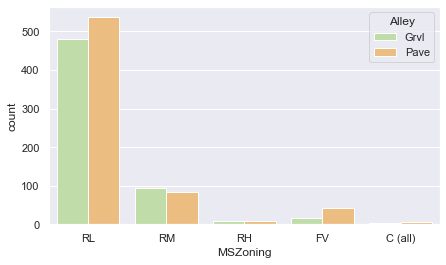

In [4231]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'MSZoning', hue = 'Alley', data = df, palette = 'Spectral_r')

```Observation:```
1. There are two types of Alley in this- 1, Gravel and 2, is Pave
2. After treating Null values, we see, Both types are approximately same.
3. By observing this count plot, we can see, CVount of RL is higher in both the cases.

```Column8: LotShape: General shape of property```

1. Reg - Regular	
2. IR1 - Slightly irregular
3. IR2 - Moderately Irregular
4. IR3 - Irregular

In [4232]:
df["LotShape"].unique() #check tyhe unique values

array(['IR1', 'Reg', 'IR2', 'IR3'], dtype=object)

In [4233]:
df["LotShape"].value_counts()

Reg    824
IR1    423
IR2     26
IR3      5
Name: LotShape, dtype: int64

In [4234]:
df["LotShape"].value_counts(normalize = True)

Reg    0.644757
IR1    0.330986
IR2    0.020344
IR3    0.003912
Name: LotShape, dtype: float64

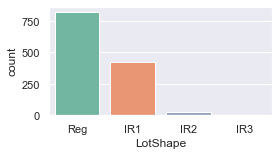

In [4235]:
#plotting each class frequency
fig = plt.figure(figsize=(4,2))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="LotShape",palette="Set2", data=df, order = df["LotShape"].value_counts().index)
plt.show()

```Analysis of this feature with other features```

Text(0, 0.5, 'LotArea')

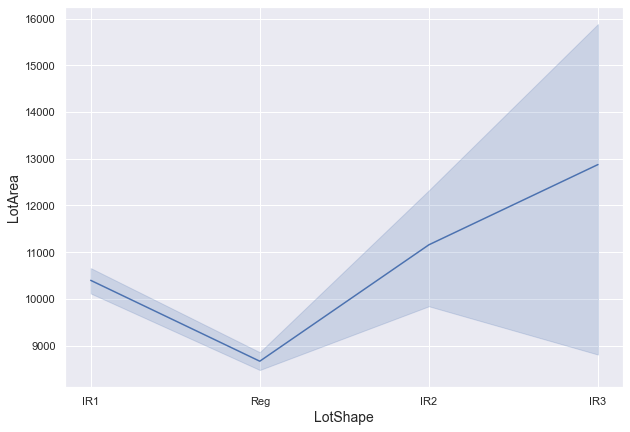

In [4236]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'LotShape',y= 'LotArea', data=df)
plt.xlabel('LotShape', fontsize = 14)
plt.ylabel('LotArea', fontsize = 14)

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

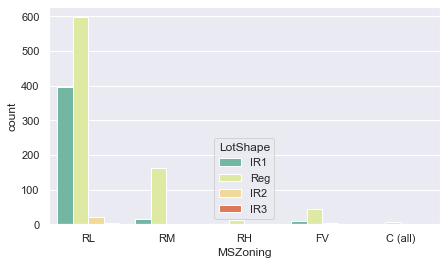

In [4237]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'MSZoning', hue = 'LotShape', data = df, palette = 'Spectral_r')

<AxesSubplot:xlabel='LotShape', ylabel='count'>

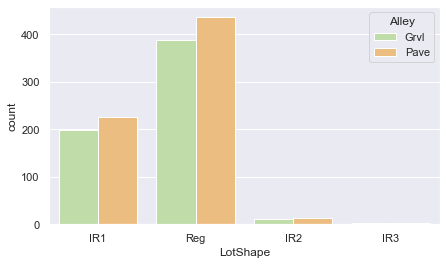

In [4238]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'LotShape', hue = 'Alley', data = df, palette = 'Spectral_r')

```Observation:```
1. more than 60% property shapes are regular.
2. LotArea of Regular shape property is less than others.
3. But LotArea of IR3 is higher than others.
4. Regular properties are more in RL

```Column9: LandContour: Flatness of the property```

1. Lvl - Near Flat/Level	
2. Bnk - Banked - Quick and significant rise from street grade to building
3. HLS - Hillside - Significant slope from side to side
4. Low - Depression

In [4239]:
df["LandContour"].unique() #check the unique values

array(['Lvl', 'Bnk', 'HLS', 'Low'], dtype=object)

In [4240]:
#check the count of unique value
df["LandContour"].value_counts()

Lvl    1165
Bnk      53
HLS      41
Low      19
Name: LandContour, dtype: int64

Text(0, 0.5, 'Counts')

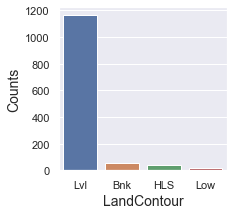

In [4241]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'LandContour', data=df)
plt.xlabel('LandContour', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other features```

<AxesSubplot:xlabel='LandContour', ylabel='count'>

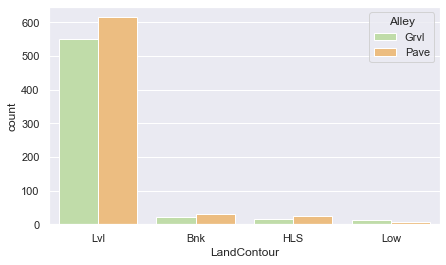

In [4242]:
plt.figure(figsize = (7,4))
sns.countplot(x = 'LandContour', hue = 'Alley', data = df, palette = 'Spectral_r')

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

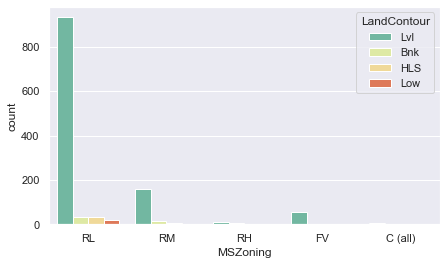

In [4243]:
plt.figure(figsize = (7,4))
sns.countplot(hue = 'LandContour', x = 'MSZoning', data = df, palette = 'Spectral_r')

```Observation:```
1. This feature is highly imbalanced towards flat level.
2. we see the barplot between Alley and landcontour, we see here, at low, there is very less or no pave.
3. mostly, flat level are in low residential area.

```Column10: Utilities: Type of utilities available```

1. AllPub - All public Utilities (E,G,W,& S)	
2. NoSewr - Electricity, Gas, and Water (Septic Tank)
3. NoSeWa - Electricity and Gas Only
4. ELO - Electricity only	

In [4244]:
df["Utilities"].unique() #check tyhe unique values

array(['AllPub', 'NoSeWa'], dtype=object)

In [4245]:
df["Utilities"].value_counts() #check the count of unique values

AllPub    1277
NoSeWa       1
Name: Utilities, dtype: int64

In [4246]:
#drop the column
df.drop(columns = "Utilities", inplace = True)

```Observation:```
1. This column is highly imbalanced, so, we need to drop this feature

```Column11: LotConfig: Lot configuration```

* Inside - Inside lot
* Corner - Corner lot
* CulDSac - Cul-de-sac
* FR2 - Frontage on 2 sides of property
* FR3 - Frontage on 3 sides of property

In [4247]:
df["LotConfig"].unique() #check the unique values

array(['Inside', 'CulDSac', 'Corner', 'FR2', 'FR3'], dtype=object)

In [4248]:
#check the count of unique value
df["LotConfig"].value_counts() 

Inside     927
Corner     237
CulDSac     70
FR2         42
FR3          2
Name: LotConfig, dtype: int64

In [4249]:
#check the count of unique value in terms of percentage
df["LotConfig"].value_counts(normalize = True) 

Inside     0.725352
Corner     0.185446
CulDSac    0.054773
FR2        0.032864
FR3        0.001565
Name: LotConfig, dtype: float64

Text(0, 0.5, 'Counts')

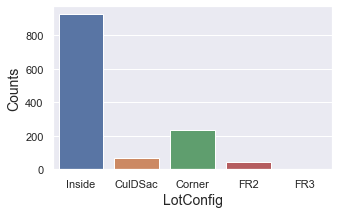

In [4250]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'LotConfig', data=df)
plt.xlabel('LotConfig', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other features```

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

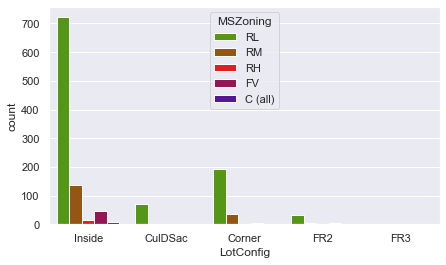

In [4251]:
#Visualize by countplot
plt.figure(figsize = (7,4))
sns.countplot(hue = 'MSZoning', x = 'LotConfig', data = df, palette = 'brg_r')

<AxesSubplot:xlabel='LotConfig', ylabel='count'>

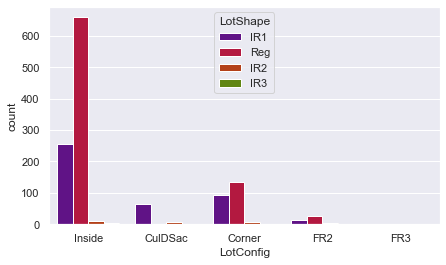

In [4252]:
#Visualize by countplot
plt.figure(figsize = (7,4))
sns.countplot(hue = 'LotShape', x = 'LotConfig', data = df, palette = 'brg')

Text(0, 0.5, 'LotArea')

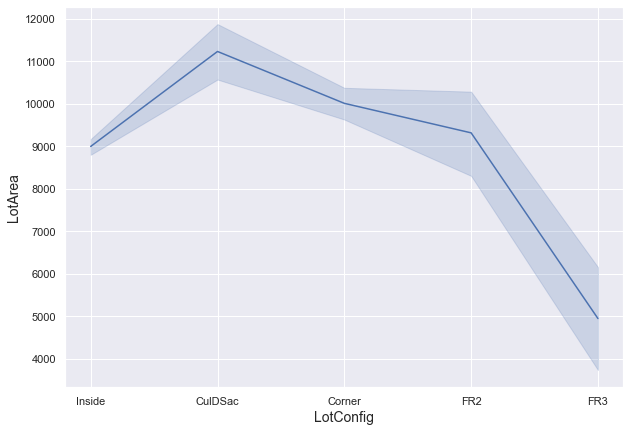

In [4253]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'LotConfig',y= 'LotArea', data=df)
plt.xlabel('LotConfig', fontsize = 14)
plt.ylabel('LotArea', fontsize = 14)

```Observation:```
1.  Inside lot is more in count than others
2. Inside lot is more in low residential area and regular properties
3. While observing lineplot, we see, Lotarea of FR3 is very low and CulDSac is high than others

```Column12: LandSlope: Slope of property```

* Gtl - Gentle slope
* Mod - Moderate Slope	
* Sev - Severe Slope

In [4254]:
df["LandSlope"].unique() #check the unique 

array(['Gtl', 'Mod', 'Sev'], dtype=object)

In [4255]:
df["LandSlope"].value_counts()

Gtl    1224
Mod      51
Sev       3
Name: LandSlope, dtype: int64

Text(0, 0.5, 'Counts')

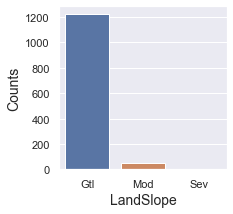

In [4256]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'LandSlope', data=df)
plt.xlabel('LandSlope', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other features```

Text(0, 0.5, 'MSSubClass')

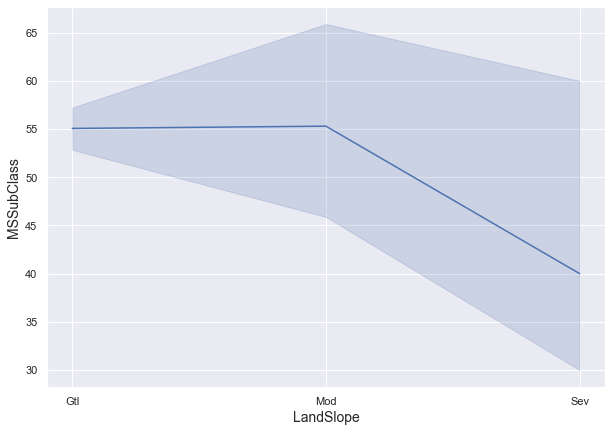

In [4257]:
#visualize this column by lineplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'LandSlope',y= 'MSSubClass', data=df)
plt.xlabel('LandSlope', fontsize = 14)
plt.ylabel('MSSubClass', fontsize = 14)

Text(0, 0.5, 'MSZoning')

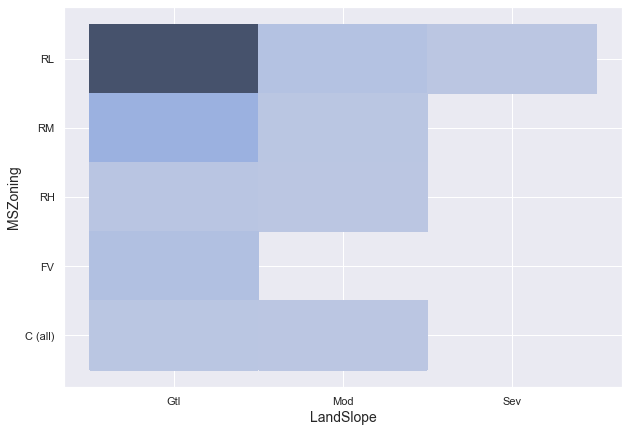

In [4258]:
#visualize this column by histplot
plt.figure(figsize=(10,7))
sns.histplot(x= 'LandSlope',y= 'MSZoning', data=df)
plt.xlabel('LandSlope', fontsize = 14)
plt.ylabel('MSZoning', fontsize = 14)

<AxesSubplot:xlabel='MSZoning', ylabel='count'>

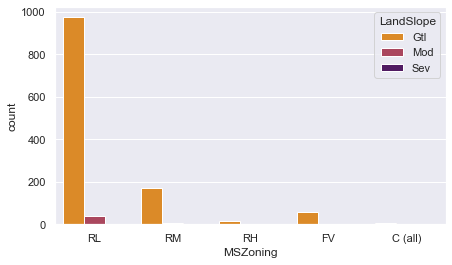

In [4259]:
plt.figure(figsize = (7,4))
sns.countplot(hue = 'LandSlope', x = 'MSZoning', data = df, palette = 'inferno_r')

<AxesSubplot:xlabel='LotShape', ylabel='count'>

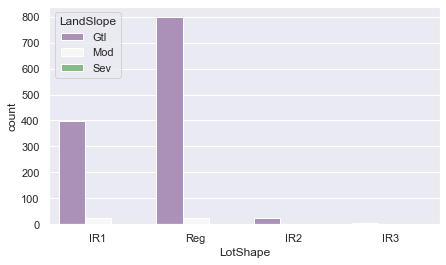

In [4260]:
plt.figure(figsize = (7,4))
sns.countplot(hue = 'LandSlope', x = 'LotShape', data = df, palette = 'PRGn')

Text(0, 0.5, 'LotArea')

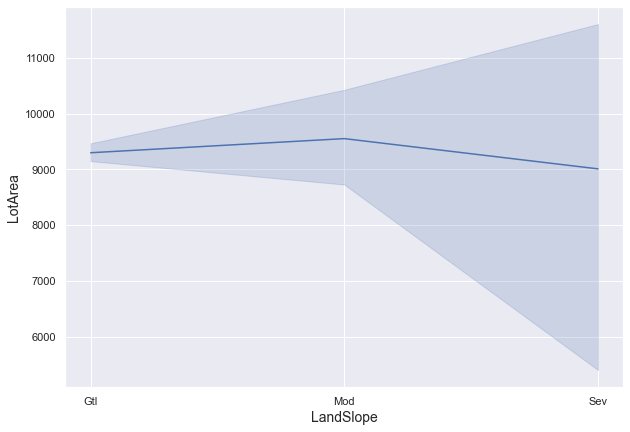

In [4261]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'LandSlope',y= 'LotArea', data=df)
plt.xlabel('LandSlope', fontsize = 14)
plt.ylabel('LotArea', fontsize = 14)

```Observation:```
1. Column contain three values: Gentle slope, moderate slope and severe slope
2. Gentle slope is high in numbers, thats why this feature is imbalanced
3. gentle slope is high in RL and Reg
4. variance of lotArea is high in severe slope

 ```Column13: Neighborhood: Physical locations within Ames city limits```

* Blmngtn - Bloomington Heights
* Blueste - Bluestem
* BrDale - Briardale
* BrkSide - Brookside
* ClearCr - Clear Creek
* CollgCr - College Creek
* Crawfor - Crawford
* Edwards - Edwards
* Gilbert - Gilbert
* IDOTRR - Iowa DOT and Rail Road
* MeadowV - Meadow Village
* Mitchel - Mitchell
* Names - North Ames
* NoRidge - Northridge
* NPkVill - Northpark Villa
* NridgHt - Northridge Heights
* NWAmes - Northwest Ames
* OldTown - Old Town
* SWISU - South & West of Iowa State University
* Sawyer - Sawyer
* SawyerW - Sawyer West
* Somerst - Somerset
* StoneBr - Stone Brook
* Timber - Timberland
* Veenker - Veenker

In [4262]:
df["Neighborhood"].unique() #check the unique values

array(['NPkVill', 'NAmes', 'NoRidge', 'NWAmes', 'Gilbert', 'Sawyer',
       'Edwards', 'IDOTRR', 'CollgCr', 'Crawfor', 'StoneBr', 'BrkSide',
       'NridgHt', 'OldTown', 'Mitchel', 'Timber', 'SWISU', 'SawyerW',
       'Somerst', 'ClearCr', 'Veenker', 'Blmngtn', 'BrDale', 'MeadowV'],
      dtype=object)

In [4263]:
#Check the count of unique values
df["Neighborhood"].value_counts() 

NAmes      206
CollgCr    147
OldTown    106
Edwards     88
Somerst     77
NridgHt     73
Sawyer      67
NWAmes      63
Gilbert     62
SawyerW     57
BrkSide     55
Crawfor     44
Mitchel     37
IDOTRR      35
NoRidge     33
Timber      28
SWISU       24
StoneBr     22
Blmngtn     17
ClearCr     12
NPkVill      9
Veenker      9
MeadowV      6
BrDale       1
Name: Neighborhood, dtype: int64

Text(0, 0.5, 'Counts')

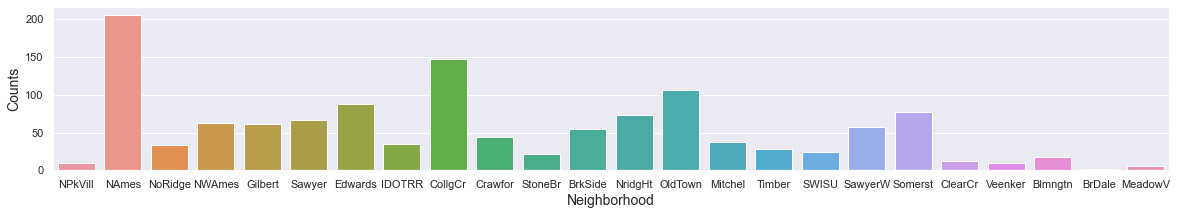

In [4264]:
#visualize this column by Countplot
plt.figure(figsize =(20,3))
sns.countplot(x = 'Neighborhood', data=df)
plt.xlabel('Neighborhood', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this features with other features```

Text(0, 0.5, 'MSSubClass')

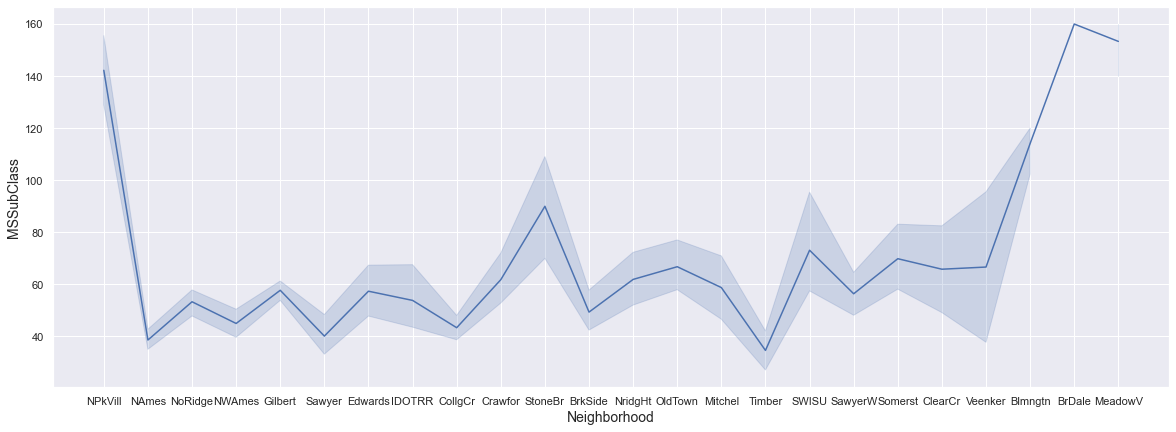

In [4265]:
#visualize this column by lineplot
plt.figure(figsize=(20,7))
sns.lineplot(x= 'Neighborhood',y= 'MSSubClass', data=df)
plt.xlabel('Neighborhood', fontsize = 14)
plt.ylabel('MSSubClass', fontsize = 14)

Text(0, 0.5, 'MSZoning')

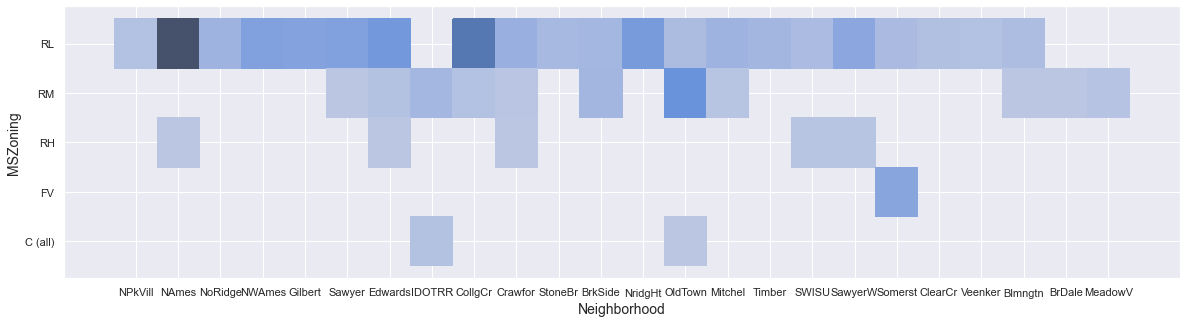

In [4266]:
#visualize this column by histplot
plt.figure(figsize=(20,5))
sns.histplot(x= 'Neighborhood',y= 'MSZoning', data=df)
plt.xlabel('Neighborhood', fontsize = 14)
plt.ylabel('MSZoning', fontsize = 14)

In [4268]:
#visualize this column by lineplot
plt.figure(figsize=(20,5))
sns.lineplot(x= 'Neighborhood',y= 'LotArea', data=df)
plt.xlabel('Neighborhood', fontsize = 14)
plt.ylabel('LotArea', fontsize = 14)

Text(0, 0.5, 'LotArea')

Text(0, 0.5, 'LotShape')

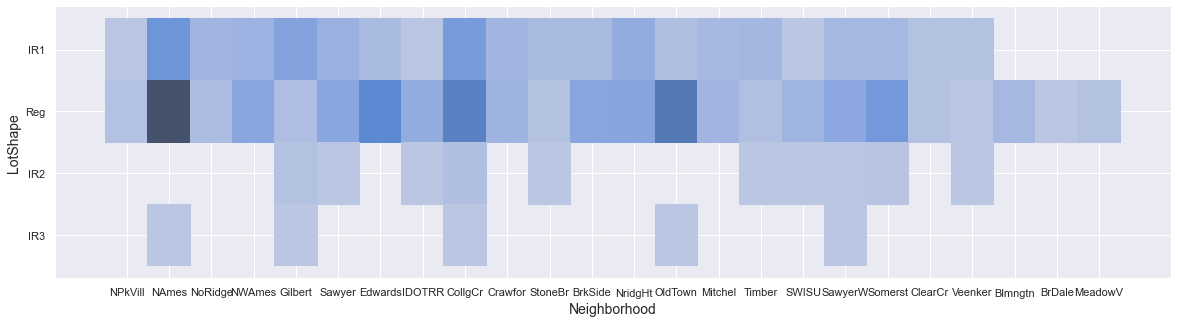

In [4269]:
#visualize this column by histplot
plt.figure(figsize=(20,5))
sns.histplot(x= 'Neighborhood',y= 'LotShape', data=df)
plt.xlabel('Neighborhood', fontsize = 14)
plt.ylabel('LotShape', fontsize = 14)

Observation:
1. This column is also categorical in nature.
2. NAmes and RL are highly related to each other.
3. ClearCr is more if we relate this feature to LotFrontage.
4. LotArea of Blmngtn is lower than others.
5. nAmes and Reg, lvl, gtl are highly related to each other.

```Column14: Condition1: Proximity to various conditions```

* Artery - Adjacent to arterial street
* Feedr - Adjacent to feeder street	
* Norm - Normal	
* RRNn - Within 200' of North-South Railroad
* RRAn - Adjacent to North-South Railroad
* PosN - Near positive off-site feature--park, greenbelt, etc.
* PosA - Adjacent to postive off-site feature
* RRNe - Within 200' of East-West Railroad
* RRAe - Adjacent to East-West Railroad

In [4273]:
df["Condition1"].unique() #check the unique values

array(['Norm', 'Feedr', 'RRAn', 'RRAe', 'PosN', 'Artery', 'PosA', 'RRNe',
       'RRNn'], dtype=object)

In [4274]:
#check the count of unique value
df["Condition1"].value_counts()

Norm      1108
Feedr       71
Artery      40
RRAn        21
PosN        17
RRAe        10
RRNn         5
PosA         4
RRNe         2
Name: Condition1, dtype: int64

In [4275]:
df["Condition1"].value_counts(normalize = True)

Norm      0.866980
Feedr     0.055556
Artery    0.031299
RRAn      0.016432
PosN      0.013302
RRAe      0.007825
RRNn      0.003912
PosA      0.003130
RRNe      0.001565
Name: Condition1, dtype: float64

Text(0, 0.5, 'Counts')

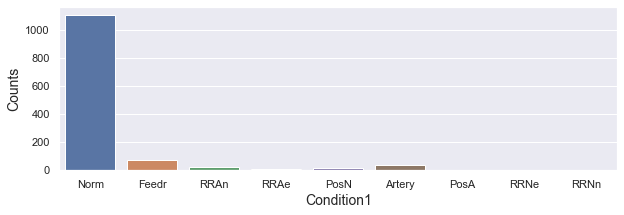

In [4276]:
#visualize this column by Countplot
plt.figure(figsize =(10,3))
sns.countplot(x = 'Condition1', data=df)
plt.xlabel('Condition1', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column15: Condition2: Proximity to various conditions (if more than one is present)```

* Artery - Adjacent to arterial street
* Feedr - Adjacent to feeder street	
* Norm - Normal	
* RRNn - Within 200' of North-South Railroad
* RRAn - Adjacent to North-South Railroad
* PosN - Near positive off-site feature--park, greenbelt, etc.
* PosA - Adjacent to postive off-site feature
* RRNe - Within 200' of East-West Railroad
* RRAe - Adjacent to East-West Railroad

In [4277]:
df["Condition2"].unique() #check the unique values

array(['Norm', 'Feedr', 'Artery', 'RRNn', 'PosA', 'PosN', 'RRAn'],
      dtype=object)

In [4278]:
#check the count of unique value
df["Condition2"].value_counts()

Norm      1265
Feedr        6
RRNn         2
Artery       2
RRAn         1
PosN         1
PosA         1
Name: Condition2, dtype: int64

In [4279]:
#check the count of unique value in percentage form
df["Condition2"].value_counts(normalize = True)

Norm      0.989828
Feedr     0.004695
RRNn      0.001565
Artery    0.001565
RRAn      0.000782
PosN      0.000782
PosA      0.000782
Name: Condition2, dtype: float64

Text(0, 0.5, 'Counts')

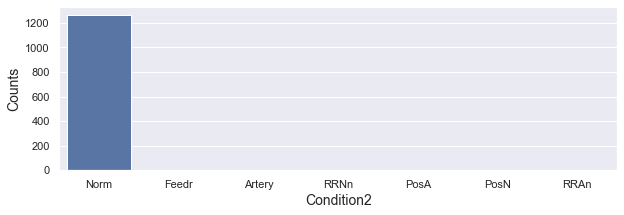

In [4280]:
#visualize this column by Countplot
plt.figure(figsize =(10,3))
sns.countplot(x = 'Condition2', data=df)
plt.xlabel('Condition2', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4281]:
#drop the column
df.drop(columns="Condition2", inplace = True)

```Observation:```
1. This column is highly imbalance, so, we need to drop it  

```Column16: BldgType: Type of dwelling```

* 1Fam - Single-family Detached	
* 2FmCon - Two-family Conversion; originally built as one-family dwelling
* Duplx - Duplex
* TwnhsE - Townhouse End Unit
* TwnhsI - Townhouse Inside Unit

In [4282]:
df["BldgType"].unique() #check the unique values

array(['TwnhsE', '1Fam', 'Twnhs', '2fmCon', 'Duplex'], dtype=object)

In [4283]:
df["BldgType"].value_counts()

1Fam      1080
TwnhsE     102
Duplex      49
2fmCon      27
Twnhs       20
Name: BldgType, dtype: int64

Text(0, 0.5, 'Counts')

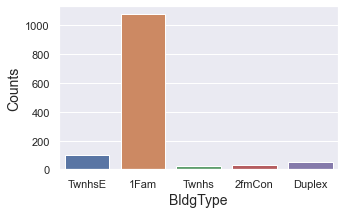

In [4284]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'BldgType', data=df)
plt.xlabel('BldgType', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other features```

<AxesSubplot:xlabel='BldgType', ylabel='count'>

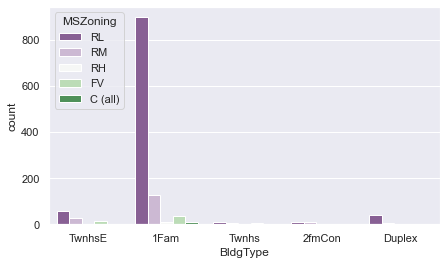

In [4285]:
plt.figure(figsize = (7,4))
sns.countplot(hue = 'MSZoning', x = 'BldgType', data = df, palette = 'PRGn')

In [4286]:
#check the relationship between two features
df.groupby("MSZoning")["BldgType"].value_counts()

MSZoning  BldgType
C (all)   1Fam          8
          2fmCon        1
FV        1Fam         35
          TwnhsE       16
          Twnhs         6
RH        1Fam          9
          Duplex        3
          2fmCon        2
          TwnhsE        2
RL        1Fam        899
          TwnhsE       56
          Duplex       40
          2fmCon       12
          Twnhs        10
RM        1Fam        129
          TwnhsE       28
          2fmCon       12
          Duplex        6
          Twnhs         4
Name: BldgType, dtype: int64

In [4287]:
#check the relationship between two features
df.groupby("MSZoning")["BldgType"].value_counts(normalize = True)

MSZoning  BldgType
C (all)   1Fam        0.888889
          2fmCon      0.111111
FV        1Fam        0.614035
          TwnhsE      0.280702
          Twnhs       0.105263
RH        1Fam        0.562500
          Duplex      0.187500
          2fmCon      0.125000
          TwnhsE      0.125000
RL        1Fam        0.883972
          TwnhsE      0.055064
          Duplex      0.039331
          2fmCon      0.011799
          Twnhs       0.009833
RM        1Fam        0.720670
          TwnhsE      0.156425
          2fmCon      0.067039
          Duplex      0.033520
          Twnhs       0.022346
Name: BldgType, dtype: float64

<AxesSubplot:xlabel='BldgType', ylabel='count'>

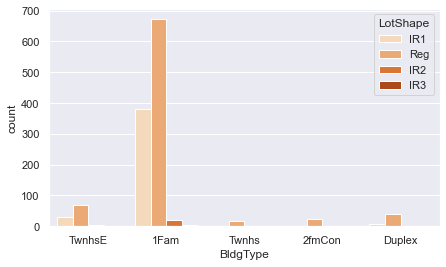

In [4288]:
plt.figure(figsize = (7,4))
sns.countplot(hue = 'LotShape', x = 'BldgType', data = df, palette = 'Oranges')

In [4289]:
#check the relationship between two features
df.groupby("LotShape")["BldgType"].value_counts()

LotShape  BldgType
IR1       1Fam        381
          TwnhsE       30
          Duplex        8
          2fmCon        2
          Twnhs         2
IR2       1Fam         22
          TwnhsE        3
          Duplex        1
IR3       1Fam          5
Reg       1Fam        672
          TwnhsE       69
          Duplex       40
          2fmCon       25
          Twnhs        18
Name: BldgType, dtype: int64

In [4290]:
#check the relationship between two features
df.groupby("LotShape")["BldgType"].value_counts(normalize = True)

LotShape  BldgType
IR1       1Fam        0.900709
          TwnhsE      0.070922
          Duplex      0.018913
          2fmCon      0.004728
          Twnhs       0.004728
IR2       1Fam        0.846154
          TwnhsE      0.115385
          Duplex      0.038462
IR3       1Fam        1.000000
Reg       1Fam        0.815534
          TwnhsE      0.083738
          Duplex      0.048544
          2fmCon      0.030340
          Twnhs       0.021845
Name: BldgType, dtype: float64

```Observation:```
1. This is clearly a categorical column
2. 1Fam count is high in this column.
3. We can see by countplot between BldgType and MSZoning, 1Fam is highly related with RL
4. We can see, In C(all), 2fmCon is only one.
5. In C(all) more than 88% are 1Fam.
6. We can see another countplot, Reg is highly related with 1Fam
7. IR3 contains only 1Fam

```Column17: HouseStyle: Style of dwelling```

* 1Story - One story
* 1.5Fin - One and one-half story: 2nd level finished
* 1.5Unf - One and one-half story: 2nd level unfinished
* 2Story - Two story
* 2.5Fin - Two and one-half story: 2nd level finished
* 2.5Unf - Two and one-half story: 2nd level unfinished
* SFoyer - Split Foyer
* SLvl - Split Level

In [4291]:
df["HouseStyle"].unique() #check tyhe unique values

array(['1Story', '2Story', '1.5Fin', 'SFoyer', '1.5Unf', 'SLvl', '2.5Unf',
       '2.5Fin'], dtype=object)

In [4292]:
df["HouseStyle"].value_counts()

1Story    655
2Story    373
1.5Fin    137
SLvl       54
SFoyer     29
1.5Unf     14
2.5Unf     10
2.5Fin      6
Name: HouseStyle, dtype: int64

In [4293]:
df["HouseStyle"].value_counts(normalize = True)

1Story    0.512520
2Story    0.291862
1.5Fin    0.107199
SLvl      0.042254
SFoyer    0.022692
1.5Unf    0.010955
2.5Unf    0.007825
2.5Fin    0.004695
Name: HouseStyle, dtype: float64

Text(0, 0.5, 'Counts')

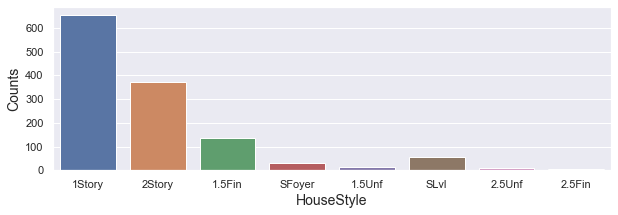

In [4294]:
#visualize this column by Countplot
plt.figure(figsize =(10,3))
sns.countplot(x = 'HouseStyle', data=df)
plt.xlabel('HouseStyle', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other features```

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

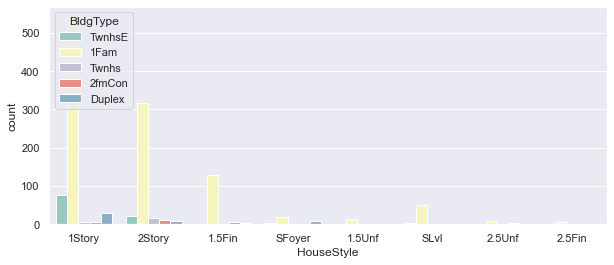

In [4295]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'HouseStyle', hue = 'BldgType', data = df, palette = 'Set3')

<AxesSubplot:xlabel='BldgType', ylabel='count'>

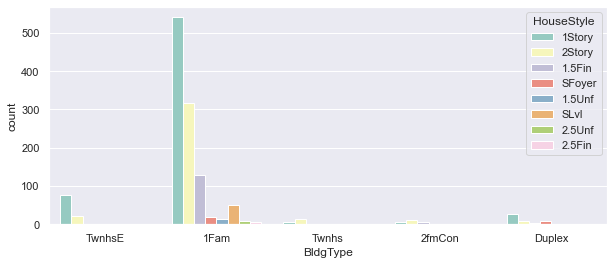

In [4296]:
plt.figure(figsize = (10,4))
sns.countplot(hue = 'HouseStyle', x = 'BldgType', data = df, palette = 'Set3')

In [4297]:
df.groupby("BldgType")["HouseStyle"].value_counts()

BldgType  HouseStyle
1Fam      1Story        541
          2Story        316
          1.5Fin        128
          SLvl           50
          SFoyer         19
          1.5Unf         13
          2.5Unf          8
          2.5Fin          5
2fmCon    2Story         11
          1.5Fin          6
          1Story          5
          2.5Unf          2
          1.5Unf          1
          2.5Fin          1
          SLvl            1
Duplex    1Story         28
          2Story          9
          SFoyer          8
          1.5Fin          3
          SLvl            1
Twnhs     2Story         15
          1Story          5
TwnhsE    1Story         76
          2Story         22
          SFoyer          2
          SLvl            2
Name: HouseStyle, dtype: int64

In [4298]:
df.groupby("BldgType")["HouseStyle"].value_counts(normalize = True)

BldgType  HouseStyle
1Fam      1Story        0.500926
          2Story        0.292593
          1.5Fin        0.118519
          SLvl          0.046296
          SFoyer        0.017593
          1.5Unf        0.012037
          2.5Unf        0.007407
          2.5Fin        0.004630
2fmCon    2Story        0.407407
          1.5Fin        0.222222
          1Story        0.185185
          2.5Unf        0.074074
          1.5Unf        0.037037
          2.5Fin        0.037037
          SLvl          0.037037
Duplex    1Story        0.571429
          2Story        0.183673
          SFoyer        0.163265
          1.5Fin        0.061224
          SLvl          0.020408
Twnhs     2Story        0.750000
          1Story        0.250000
TwnhsE    1Story        0.745098
          2Story        0.215686
          SFoyer        0.019608
          SLvl          0.019608
Name: HouseStyle, dtype: float64

```Observation:```
1. More than 51% peoples housestyles are 1story
2. Only 6 people have 2.5fin
3. 1Fam and 1story housestyle are more.

```Column18: OverallQual: Rates the overall material and finish of the house```

* 10 - Very Excellent
* 9 - Excellent
* 8 - Very Good
* 7 - Good
* 6 - Above Average
* 5 - Average
* 4 - Below Average
* 3 - Fair
* 2 - Poor
* 1 - Very Poor

In [4299]:
df["OverallQual"].unique() #check tyhe unique values

array([ 6,  8,  7,  5,  9,  1,  2,  4,  3, 10], dtype=int64)

In [4300]:
df["OverallQual"].value_counts() #check the count of unique value

5     350
6     323
7     281
8     154
4      97
9      39
3      17
10     12
2       3
1       2
Name: OverallQual, dtype: int64

Text(0, 0.5, 'Counts')

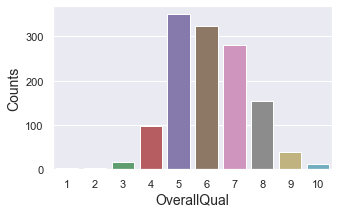

In [4301]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'OverallQual', data=df)
plt.xlabel('OverallQual', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other featrure```

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

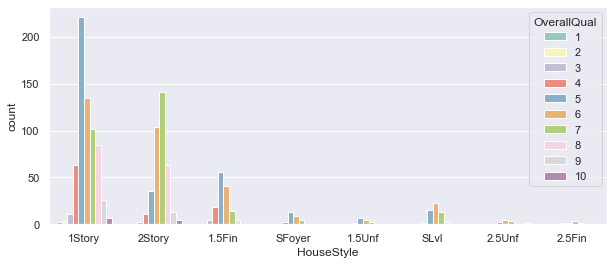

In [4302]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'HouseStyle', hue = 'OverallQual', data = df, palette = 'Set3')

In [4303]:
#check the relationship between feature
df.groupby("HouseStyle")["OverallQual"].value_counts()

HouseStyle  OverallQual
1.5Fin      5               56
            6               41
            4               18
            7               14
            3                4
            8                4
1.5Unf      5                7
            6                4
            7                2
            4                1
1Story      5              221
            6              135
            7              102
            8               85
            4               63
            9               26
            3               11
            10               7
            2                3
            1                2
2.5Fin      6                3
            4                1
            5                1
            7                1
2.5Unf      6                4
            7                3
            5                2
            10               1
2Story      7              141
            6              104
            8               63
            5  

```Observation:```
1. This column contains ratings out of 10.
2. 5 rating is more than others.
3. 1 rating very less.
4. 1Story building contains both 1 ratings.
5. 1story, 2 story and 2.5unf contains 10 ratings
    

```Column19: OverallCond: Rates the overall condition of the house```

* 10 - Very Excellent
* 9 - Excellent
* 8 - Very Good
* 7 - Good
* 6 - Above Average	
* 5 - Average
* 4 - Below Average	
* 3 - Fair
* 2 - Poor
* 1 - Very Poor

In [4304]:
df["OverallCond"].unique() #check tyhe unique values

array([5, 6, 4, 7, 8, 2, 3, 9, 1], dtype=int64)

In [4305]:
df["OverallCond"].value_counts()

5    719
6    225
7    180
8     62
4     46
3     22
9     18
2      5
1      1
Name: OverallCond, dtype: int64

Text(0, 0.5, 'Counts')

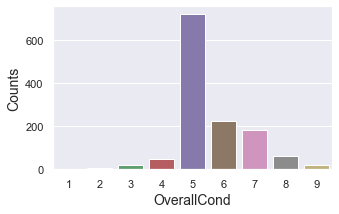

In [4306]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'OverallCond', data=df)
plt.xlabel('OverallCond', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other features```

In [4307]:
#check the relationship between feature
df.groupby("HouseStyle")["OverallCond"].value_counts()

HouseStyle  OverallCond
1.5Fin      7               35
            5               32
            6               29
            4               17
            8               16
            3                4
            9                3
            2                1
1.5Unf      6                7
            7                4
            3                1
            5                1
            8                1
1Story      5              389
            6              115
            7               87
            8               23
            4               18
            3               15
            9                4
            2                3
            1                1
2.5Fin      7                2
            3                1
            5                1
            6                1
            8                1
2.5Unf      5                3
            6                3
            7                2
            4                1
            9  

```Observation:```
1. Column contain ratings of the overall condition of the house.
2. 5 rating is more than other rating.
3. there is no 10 rating in this column
4. one 1Story building got one rating
5. 2 Story building got maximum 9 ratings.

```Column20: YearBuilt: Original construction date```

In [4308]:
df["YearBuilt"].unique() #check the unique values

array([1976, 1970, 1996, 1977, 2006, 1957, 1965, 1947, 1937, 2003, 1955,
       1923, 1930, 2007, 2001, 1972, 1950, 1961, 2010, 1922, 1934, 2005,
       1946, 1941, 1948, 1975, 1978, 1956, 2004, 1982, 2000, 1960, 2002,
       1920, 1992, 1936, 1967, 1989, 1929, 1968, 1959, 1935, 1966, 1931,
       1916, 1998, 1962, 1974, 1926, 1918, 1904, 1995, 1969, 1985, 1963,
       1958, 2008, 1971, 1980, 1945, 1986, 1949, 1954, 1925, 1953, 1915,
       1921, 1924, 1999, 1951, 1993, 1964, 1900, 1910, 1938, 1911, 1940,
       1990, 1927, 1983, 1994, 2009, 1928, 1917, 1981, 1979, 1898, 1997,
       1984, 1880, 1973, 1952, 1919, 1939, 1987, 1890, 1942, 1988, 1991,
       1932, 1908, 1914, 1905, 1875, 1906, 1893, 1912, 1913, 1885, 1872,
       1892], dtype=int64)

In [4309]:
df["YearBuilt"].value_counts()

2006    61
2005    53
2004    50
2007    45
2003    42
        ..
1904     1
1898     1
1893     1
1892     1
2010     1
Name: YearBuilt, Length: 111, dtype: int64

```Analysis of this feature with other features```

Text(0, 0.5, 'YearBuilt')

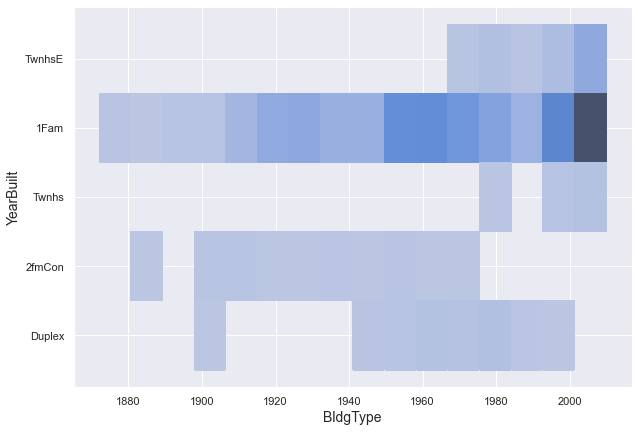

In [4310]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'BldgType',x= 'YearBuilt', data=df)
plt.xlabel('BldgType', fontsize = 14)
plt.ylabel('YearBuilt', fontsize = 14)

In [4311]:
df.groupby("HouseStyle")["YearBuilt"].value_counts()

HouseStyle  YearBuilt
1.5Fin      1920         9
            1925         7
            1940         7
            1941         7
            1936         6
                        ..
SLvl        1991         1
            1992         1
            1995         1
            2002         1
            2003         1
Name: YearBuilt, Length: 296, dtype: int64

Text(0, 0.5, 'YearBuilt')

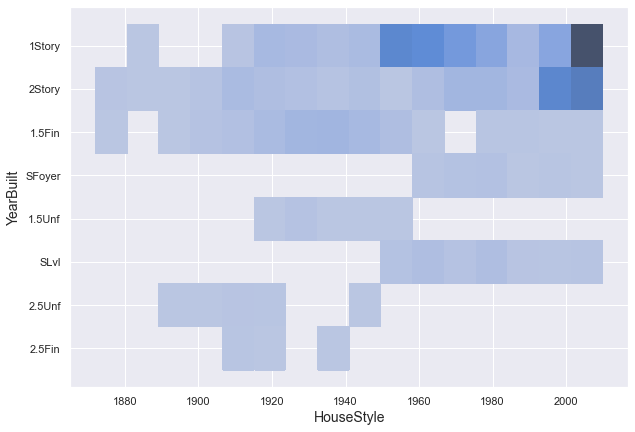

In [4312]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.histplot(y= 'HouseStyle',x= 'YearBuilt', data=df)
plt.xlabel('HouseStyle', fontsize = 14)
plt.ylabel('YearBuilt', fontsize = 14)

```Observations:```
1. This column contain years.
2. We see by using value_counts, construction dates are more after year 2000.
3. and 1Fam is highly related with the construction years after 2000.
4. And 1Story buildings are built more than others after year 2000.

```Column21: YearRemodAdd: Remodel date (same as construction date if no remodeling or additions)```

In [4313]:
df["YearRemodAdd"].unique() #check the unique values

array([1976, 1970, 1997, 1977, 2006, 1996, 2000, 1965, 1950, 2003, 1955,
       2007, 2001, 1961, 1998, 2010, 1995, 2005, 1992, 1975, 1978, 1960,
       1982, 2002, 1967, 1989, 1968, 1959, 2004, 1966, 2008, 1987, 1981,
       1969, 1985, 1963, 1991, 1971, 1990, 1956, 1986, 1954, 1953, 1957,
       1999, 1972, 1993, 1958, 1980, 1951, 1983, 2009, 1994, 1979, 1964,
       1952, 1984, 1962, 1988, 1974, 1973], dtype=int64)

In [4314]:
df["YearRemodAdd"].value_counts()

1950    160
2006     86
2007     68
2004     60
2005     60
       ... 
1983      5
1952      5
2010      5
1986      4
1951      2
Name: YearRemodAdd, Length: 61, dtype: int64

```Column22: RoofStyle: Type of roof```

* Flat - Flat
* Gable - Gable
* Gambrel - Gabrel (Barn)
* Hip - Hip
* Mansard - Mansard
* Shed - Shed

In [4315]:
df["RoofStyle"].unique() #check the unique values

array(['Gable', 'Flat', 'Hip', 'Gambrel', 'Mansard'], dtype=object)

In [4316]:
df["RoofStyle"].value_counts()

Gable      1002
Hip         253
Gambrel      11
Mansard       7
Flat          5
Name: RoofStyle, dtype: int64

Text(0, 0.5, 'Counts')

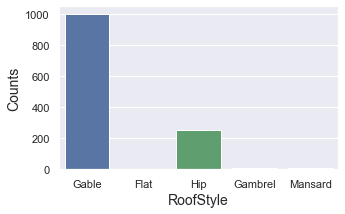

In [4317]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'RoofStyle', data=df)
plt.xlabel('RoofStyle', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other features```

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

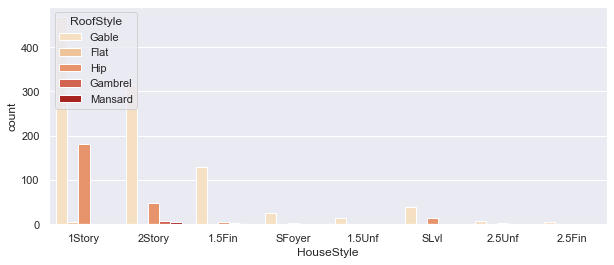

In [4318]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'HouseStyle', hue = 'RoofStyle', data = df, palette = 'OrRd')

In [4319]:
df.groupby("HouseStyle")["RoofStyle"].value_counts()

HouseStyle  RoofStyle
1.5Fin      Gable        129
            Hip            5
            Gambrel        3
1.5Unf      Gable         14
1Story      Gable        468
            Hip          182
            Flat           4
            Mansard        1
2.5Fin      Gable          5
            Hip            1
2.5Unf      Gable          7
            Hip            3
2Story      Gable        314
            Hip           47
            Gambrel        7
            Mansard        5
SFoyer      Gable         26
            Hip            2
            Flat           1
SLvl        Gable         39
            Hip           13
            Gambrel        1
            Mansard        1
Name: RoofStyle, dtype: int64

In [4320]:
df.groupby("HouseStyle")["RoofStyle"].value_counts(normalize = True)

HouseStyle  RoofStyle
1.5Fin      Gable        0.941606
            Hip          0.036496
            Gambrel      0.021898
1.5Unf      Gable        1.000000
1Story      Gable        0.714504
            Hip          0.277863
            Flat         0.006107
            Mansard      0.001527
2.5Fin      Gable        0.833333
            Hip          0.166667
2.5Unf      Gable        0.700000
            Hip          0.300000
2Story      Gable        0.841823
            Hip          0.126005
            Gambrel      0.018767
            Mansard      0.013405
SFoyer      Gable        0.896552
            Hip          0.068966
            Flat         0.034483
SLvl        Gable        0.722222
            Hip          0.240741
            Gambrel      0.018519
            Mansard      0.018519
Name: RoofStyle, dtype: float64

In [4321]:
df.groupby("RoofStyle")["HouseStyle"].value_counts()

RoofStyle  HouseStyle
Flat       1Story          4
           SFoyer          1
Gable      1Story        468
           2Story        314
           1.5Fin        129
           SLvl           39
           SFoyer         26
           1.5Unf         14
           2.5Unf          7
           2.5Fin          5
Gambrel    2Story          7
           1.5Fin          3
           SLvl            1
Hip        1Story        182
           2Story         47
           SLvl           13
           1.5Fin          5
           2.5Unf          3
           SFoyer          2
           2.5Fin          1
Mansard    2Story          5
           1Story          1
           SLvl            1
Name: HouseStyle, dtype: int64

```Observation:```
1. Gable is more in count and Flats are less in count
2. 1.5unf has only Gable rooftype
3. Gable and 1Story are highly correlated.
4. 1Story and SFoyer only contains Flat rooftype.

```Column23: RoofMatl: Roof material```

* ClyTile - Clay or Tile
* CompShg - Standard (Composite) Shingle
* Membran - Membrane
* Metal - Metal
* Roll - Roll
* Tar&Grv - Gravel & Tar
* WdShake - Wood Shakes
* WdShngl - Wood Shingles

In [4322]:
df["RoofMatl"].unique() #check the unique values

array(['CompShg', 'Tar&Grv', 'Roll', 'WdShngl', 'WdShake'], dtype=object)

In [4323]:
df["RoofMatl"].value_counts()

CompShg    1267
Tar&Grv       5
WdShake       3
WdShngl       2
Roll          1
Name: RoofMatl, dtype: int64

Text(0, 0.5, 'Counts')

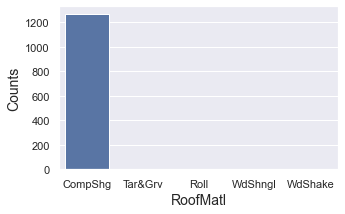

In [4324]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'RoofMatl', data=df)
plt.xlabel('RoofMatl', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4325]:
df.drop(columns = 'RoofMatl', inplace = True)

```Column24: Exterior1st: Exterior covering on house```

* AsbShng - Asbestos Shingles
* AsphShn - Asphalt Shingles
* BrkComm - Brick Common
* BrkFace - Brick Face
* CBlock - Cinder Block
* CemntBd - Cement Board
* HdBoard - Hard Board
* ImStucc - Imitation Stucco
* MetalSd - Metal Siding
* Other - Other
* Plywood - Plywood
* PreCast - PreCast	
* Stone - Stone
* Stucco - Stucco
* VinylSd - Vinyl Siding
* Wd Sdng - Wood Siding
* WdShing - Wood Shingles

In [4326]:
df["Exterior1st"].unique() #check tyhe unique values

array(['Plywood', 'Wd Sdng', 'MetalSd', 'VinylSd', 'HdBoard', 'Stucco',
       'WdShing', 'BrkFace', 'CemntBd', 'Stone', 'AsbShng', 'AsphShn',
       'ImStucc', 'BrkComm', 'CBlock'], dtype=object)

In [4327]:
df["Exterior1st"].value_counts()

VinylSd    473
MetalSd    198
HdBoard    189
Wd Sdng    175
Plywood     88
BrkFace     43
CemntBd     41
WdShing     23
Stucco      21
AsbShng     20
Stone        2
BrkComm      2
ImStucc      1
AsphShn      1
CBlock       1
Name: Exterior1st, dtype: int64

Text(0, 0.5, 'Counts')

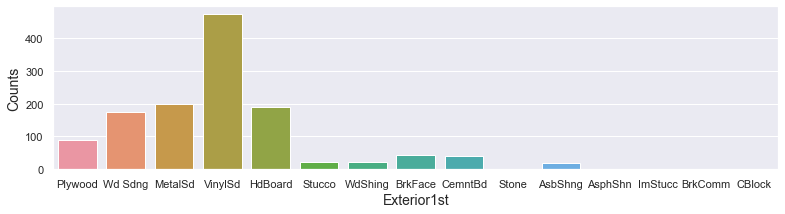

In [4328]:
#visualize this column by Countplot
plt.figure(figsize =(13,3))
sns.countplot(x = 'Exterior1st', data=df)
plt.xlabel('Exterior1st', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis with other features```

In [4329]:
df.groupby("HouseStyle")["Exterior1st"].value_counts()

HouseStyle  Exterior1st
1.5Fin      Wd Sdng         42
            MetalSd         41
            VinylSd         20
            BrkFace          8
            AsbShng          7
            WdShing          6
            Stucco           5
            HdBoard          4
            Plywood          2
            CBlock           1
            CemntBd          1
1.5Unf      MetalSd          7
            Wd Sdng          6
            WdShing          1
1Story      VinylSd        239
            HdBoard        107
            MetalSd         91
            Wd Sdng         81
            Plywood         53
            BrkFace         30
            CemntBd         24
            WdShing         10
            Stucco           9
            AsbShng          5
            BrkComm          2
            Stone            2
            AsphShn          1
            ImStucc          1
2.5Fin      Wd Sdng          4
            MetalSd          1
            VinylSd          1
2.5Unf      Wd 

Text(0, 0.5, 'Exterior1st')

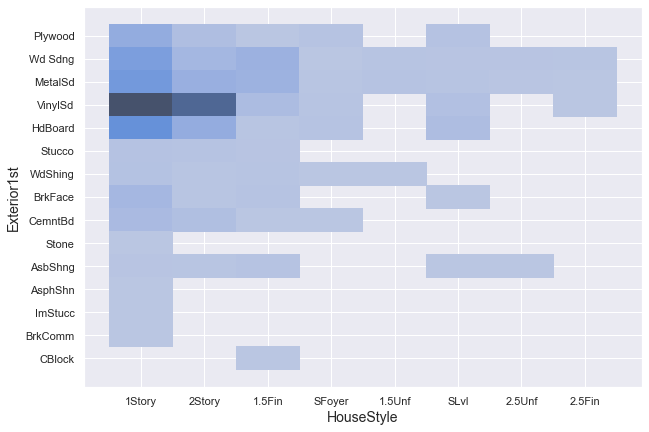

In [4330]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.histplot(x= 'HouseStyle',y= 'Exterior1st', data=df)
plt.xlabel('HouseStyle', fontsize = 14)
plt.ylabel('Exterior1st', fontsize = 14)

```Observation:```
1. VinylSd is more in count where as ImStucc, AsphShn, CBlock is less.
2. 1Story house has more VinylSd Covering
3. 1Story house has ImStucc, AsphShn.
4. 1.5Fin has Cblock covering

```Column25: Exterior2nd: Exterior covering on house (if more than one material)```

* AsbShng - Asbestos Shingles
* AsphShn - Asphalt Shingles
* BrkComm - Brick Common
* BrkFace - Brick Face
* CBlock - Cinder Block
* CemntBd - Cement Board
* HdBoard - Hard Board
* ImStucc - Imitation Stucco
* MetalSd - Metal Siding
* Other - Other
* Plywood - Plywood
* PreCast - PreCast
* Stone - Stone
* Stucco - Stucco
* VinylSd - Vinyl Siding
* Wd Sdng - Wood Siding
* WdShing - Wood Shingles

In [4331]:
df["Exterior2nd"].unique() #check tyhe unique values

array(['Plywood', 'Wd Sdng', 'MetalSd', 'VinylSd', 'HdBoard', 'Wd Shng',
       'Stucco', 'ImStucc', 'CmentBd', 'BrkFace', 'AsbShng', 'Stone',
       'Brk Cmn', 'AsphShn', 'CBlock'], dtype=object)

In [4332]:
df["Exterior2nd"].value_counts()

VinylSd    463
MetalSd    192
HdBoard    176
Wd Sdng    172
Plywood    114
CmentBd     41
Wd Shng     33
BrkFace     22
Stucco      22
AsbShng     20
ImStucc      8
Brk Cmn      7
Stone        4
AsphShn      3
CBlock       1
Name: Exterior2nd, dtype: int64

Text(0, 0.5, 'Counts')

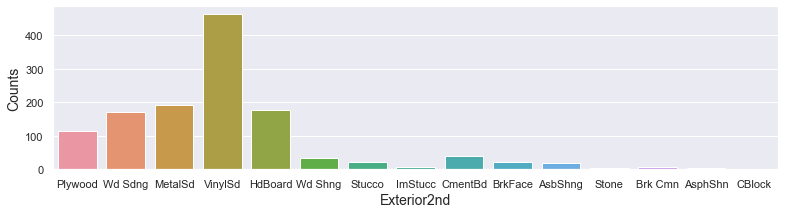

In [4333]:
#visualize this column by Countplot
plt.figure(figsize =(13,3))
sns.countplot(x = 'Exterior2nd', data=df)
plt.xlabel('Exterior2nd', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Observation:```
1. VinylSd is more in count than others.

```Column26: MasVnrType: Masonry veneer type```

* BrkCmn - Brick Common
* BrkFace - Brick Face
* CBlock - Cinder Block
* None - None
* Stone - Stone

In [4334]:
df["MasVnrType"].unique() #check the unique values

array(['None', 'BrkFace', 'BrkCmn', 'Stone', nan], dtype=object)

In [4335]:
df["MasVnrType"].value_counts()

None       752
BrkFace    391
Stone      117
BrkCmn      11
Name: MasVnrType, dtype: int64

Text(0, 0.5, 'Counts')

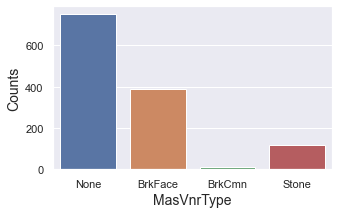

In [4336]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'MasVnrType', data=df)
plt.xlabel('MasVnrType', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Observation:```
1. None type is more than others.

Column27: ExterQual: Evaluates the quality of the material on the exterior 

* Ex - Excellent
* Gd - Good
* TA - Average/Typical
* Fa - Fair
* Po - Poor

In [4337]:
df["ExterQual"].unique() #check tyhe unique values

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [4338]:
df["ExterQual"].value_counts()

TA    781
Gd    438
Ex     46
Fa     13
Name: ExterQual, dtype: int64

Text(0, 0.5, 'Counts')

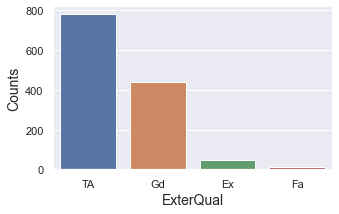

In [4339]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'ExterQual', data=df)
plt.xlabel('ExterQual', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Observation:```
1. Imstucc has good quality.
2. CBlock has Fair quality
3. Count of Average quality is more

```Column28: ExterCond: Evaluates the present condition of the material on the exterior```

* Ex - Excellent
* Gd - Good
* TA - Average/Typical
* Fa - Fair
* Po - Poor

In [4340]:
df["ExterCond"].unique() #check the unique values

array(['TA', 'Gd', 'Fa', 'Po', 'Ex'], dtype=object)

In [4341]:
df["ExterCond"].value_counts()

TA    1128
Gd     119
Fa      27
Ex       3
Po       1
Name: ExterCond, dtype: int64

Text(0, 0.5, 'Counts')

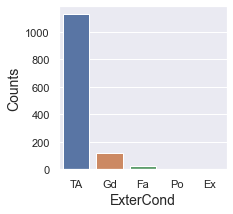

In [4342]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'ExterCond', data=df)
plt.xlabel('ExterCond', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

Observation:
1. Avearge condition is more in count than others.

```Column29: Foundation: Type of foundation```

* BrkTil - Brick & Tile
* CBlock - Cinder Block
* PConc - Poured Contrete	
* Slab - Slab
* Stone - Stone
* Wood - Wood

In [4343]:
df["Foundation"].unique() #check the unique values

array(['CBlock', 'PConc', 'BrkTil', 'Slab', 'Stone', 'Wood'], dtype=object)

In [4344]:
df["Foundation"].value_counts()

PConc     583
CBlock    531
BrkTil    134
Slab       22
Stone       6
Wood        2
Name: Foundation, dtype: int64

Text(0, 0.5, 'Counts')

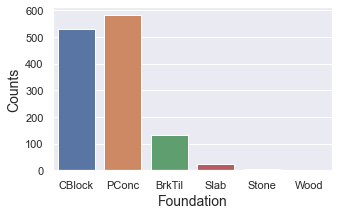

In [4345]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'Foundation', data=df)
plt.xlabel('Foundation', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4346]:
df.groupby("HouseStyle")["Foundation"].value_counts()

HouseStyle  Foundation
1.5Fin      CBlock         59
            BrkTil         52
            PConc          21
            Slab            3
            Stone           1
            Wood            1
1.5Unf      BrkTil          8
            CBlock          4
            PConc           2
1Story      CBlock        314
            PConc         288
            BrkTil         37
            Slab           15
            Stone           1
2.5Fin      BrkTil          2
            CBlock          2
            PConc           2
2.5Unf      BrkTil          6
            CBlock          3
            PConc           1
2Story      PConc         247
            CBlock         89
            BrkTil         29
            Stone           4
            Slab            3
            Wood            1
SFoyer      CBlock         21
            PConc           7
            Slab            1
SLvl        CBlock         39
            PConc          15
Name: Foundation, dtype: int64

<AxesSubplot:xlabel='HouseStyle', ylabel='count'>

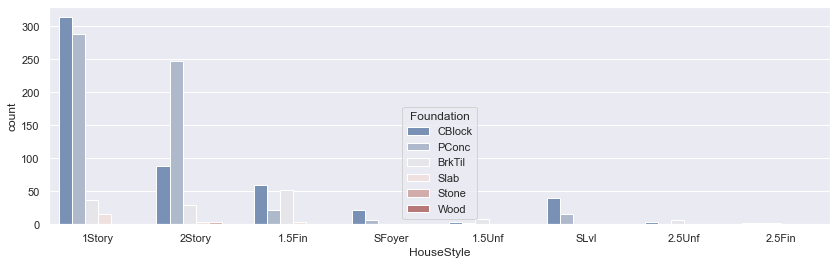

In [4347]:
plt.figure(figsize = (14,4))
sns.countplot(x = 'HouseStyle', hue = 'Foundation', data = df, palette = 'vlag')

<AxesSubplot:xlabel='Foundation', ylabel='count'>

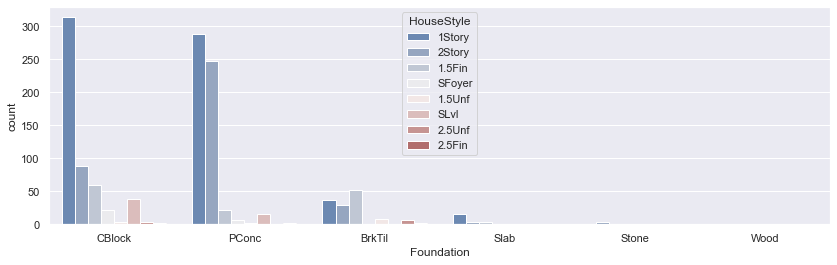

In [4348]:
plt.figure(figsize = (14,4))
sns.countplot(hue = 'HouseStyle', x = 'Foundation', data = df, palette = 'vlag')

```Observation:```
1. PConc and Cblock are more in count than others.
2. 1.5Fin and 2Story has Wood foundation.
3. 1Story building has Cblock higher than PConc

```Column30: BsmtQual: Evaluates the height of the basement```

* Ex - Excellent (100+ inches)	
* Gd - Good (90-99 inches)
* TA - Typical (80-89 inches)
* Fa - Fair (70-79 inches)
* Po - Poor (<70 inches)
* NA - No Basement

In [4349]:
df["BsmtQual"].unique() #check the unique values

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [4350]:
df["BsmtQual"].value_counts()

TA    566
Gd    542
Ex    105
Fa     32
Name: BsmtQual, dtype: int64

Text(0, 0.5, 'Counts')

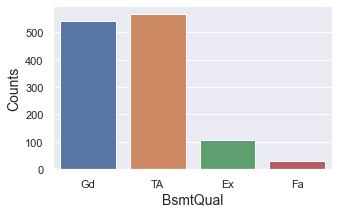

In [4351]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'BsmtQual', data=df)
plt.xlabel('BsmtQual', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Observation:```
1. Average height is more in count than others 

```Column31: BsmtCond: Evaluates the general condition of the basement```

* Ex - Excellent
* Gd - Good
* TA - Typical - slight dampness allowed
* Fa - Fair - dampness or some cracking or settling
* Po - Poor - Severe cracking, settling, or wetness
* NA - No Basement

In [4352]:
df["BsmtCond"].unique() #check tyhe unique values

array(['TA', 'Gd', 'Fa', nan, 'Po'], dtype=object)

In [4353]:
df["BsmtCond"].value_counts()

TA    1144
Gd      59
Fa      40
Po       2
Name: BsmtCond, dtype: int64

In [4354]:
df["BsmtCond"].value_counts(normalize = True)

TA    0.918876
Gd    0.047390
Fa    0.032129
Po    0.001606
Name: BsmtCond, dtype: float64

Text(0, 0.5, 'Counts')

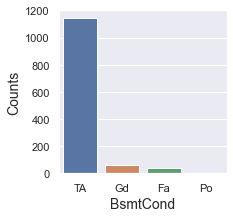

In [4355]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'BsmtCond', data=df)
plt.xlabel('BsmtCond', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Observation:```
1. column is highly imbalanced.
2. TA is more in count, approximately 92%

```Column32: BsmtExposure: Refers to walkout or garden level walls```

* Gd - Good Exposure
* Av - Average Exposure (split levels or foyers typically score average or above)	
* Mn - Mimimum Exposure
* No - No Exposure
* NA - No Basement

In [4356]:
df["BsmtExposure"].unique() #check tyhe unique values

array(['No', 'Gd', 'Av', 'Mn', nan], dtype=object)

In [4357]:
df["BsmtExposure"].value_counts()

No    852
Av    192
Mn    101
Gd     99
Name: BsmtExposure, dtype: int64

Text(0, 0.5, 'Counts')

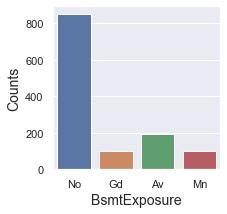

In [4358]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'BsmtExposure', data=df)
plt.xlabel('BsmtExposure', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4359]:
df.groupby("BsmtExposure")["HouseStyle"].value_counts()

BsmtExposure  HouseStyle
Av            1Story         98
              2Story         47
              SLvl           25
              SFoyer         19
              1.5Fin          2
              1.5Unf          1
Gd            1Story         60
              2Story         17
              SLvl           13
              SFoyer          8
              1.5Fin          1
Mn            1Story         54
              2Story         32
              1.5Fin         13
              2.5Unf          2
No            1Story        419
              2Story        272
              1.5Fin        117
              SLvl           16
              1.5Unf         13
              2.5Unf          8
              2.5Fin          6
              SFoyer          1
Name: HouseStyle, dtype: int64

In [4360]:
df.groupby("BsmtExposure")["HouseStyle"].value_counts(normalize = True)

BsmtExposure  HouseStyle
Av            1Story        0.510417
              2Story        0.244792
              SLvl          0.130208
              SFoyer        0.098958
              1.5Fin        0.010417
              1.5Unf        0.005208
Gd            1Story        0.606061
              2Story        0.171717
              SLvl          0.131313
              SFoyer        0.080808
              1.5Fin        0.010101
Mn            1Story        0.534653
              2Story        0.316832
              1.5Fin        0.128713
              2.5Unf        0.019802
No            1Story        0.491784
              2Story        0.319249
              1.5Fin        0.137324
              SLvl          0.018779
              1.5Unf        0.015258
              2.5Unf        0.009390
              2.5Fin        0.007042
              SFoyer        0.001174
Name: HouseStyle, dtype: float64

```Observation:```
1. Count of No Exposure are high than others.
2. More 1Story building has No exposure than other buildings 

```Column33: BsmtFinType1: Rating of basement finished area```

* GLQ - Good Living Quarters
* ALQ - Average Living Quarters
* BLQ - Below Average Living Quarters	
* Rec - Average Rec Room
* LwQ - Low Quality
* Unf - Unfinshed
* NA - No Basement

In [4361]:
df["BsmtFinType1"].unique() #check the unique values

array(['ALQ', 'GLQ', 'BLQ', 'Unf', 'Rec', 'LwQ', nan], dtype=object)

In [4362]:
df["BsmtFinType1"].value_counts()

Unf    381
GLQ    368
ALQ    187
BLQ    124
Rec    121
LwQ     64
Name: BsmtFinType1, dtype: int64

Text(0, 0.5, 'Counts')

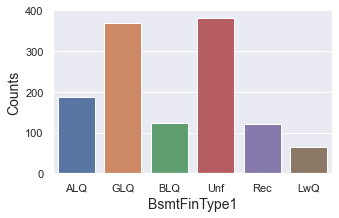

In [4363]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'BsmtFinType1', data=df)
plt.xlabel('BsmtFinType1', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4364]:
df.groupby("HouseStyle")["BsmtFinType1"].value_counts()

HouseStyle  BsmtFinType1
1.5Fin      Unf              60
            Rec              23
            BLQ              17
            LwQ              16
            ALQ              10
            GLQ               7
1.5Unf      Unf               9
            ALQ               2
            BLQ               1
            GLQ               1
            LwQ               1
1Story      GLQ             194
            Unf             143
            ALQ             114
            BLQ              79
            Rec              72
            LwQ              29
2.5Fin      Unf               3
            LwQ               2
            GLQ               1
2.5Unf      Unf               6
            Rec               4
2Story      Unf             150
            GLQ             124
            ALQ              40
            BLQ              22
            Rec              20
            LwQ              13
SFoyer      GLQ              19
            ALQ               6
            BLQ

```Observation:```
1. 1 Story building has more good quality basements.
2. 2.5Fin has more Unfinished basements

```Column34: BsmtFinSF1: Type 1 finished square feet```

In [4365]:
df["BsmtFinSF1"].unique() #check the unique values

array([ 120,  351,  862,  705,    0, 1302,  168,  698,  442,  483,  538,
        724,  751,  361,  656,   49,  915,  661, 1445,  326,  456,  360,
        716,  477,  773,  377,  595,  546,  144,  374, 1274,  493,  290,
        860,  674,  285,  769, 1024,  421, 1170,  234,  510,  490,  312,
        544, 1288,  116, 1386, 1443,  336,  600, 1071,  535,  280, 1153,
        562,  368,   25,  567, 1196,  248,  486,  936,  432,  454,  586,
         24,  375,  416,  774,  680,  592, 1373,  637,  196,  197,  552,
         16,  904,  428,  189,  854,  216,  504, 1218,  978,  713,  784,
         72,  810, 1148,  988,  765,  697,  733,  603,  572,  300,  180,
        450,  296,  400,  969, 1039,  767,  740,  419,  831,  689,  998,
       1070,  865,  626,  922,  388,  611,  228,  852,  609,   20,  641,
       1022,  250, 1106,  301,  746,  821,  560,   75,  704, 2188,  958,
       1124,  392,   50,  846,  402,  319,  605,  310,  685,  588,  315,
        324, 1032,  763,  655,  397,  842,  262,  2

In [4366]:
df["BsmtFinSF1"].value_counts()

0       414
24       10
16        9
20        5
616       5
       ... 
575       1
573       1
572       1
167       1
1880      1
Name: BsmtFinSF1, Length: 571, dtype: int64

In [4367]:
df["BsmtFinSF1"].skew()

0.7240354823379092

In [4368]:
df["BsmtFinSF1"].isnull().sum()

0

In [4369]:
df["BsmtFinSF1"] = df["BsmtFinSF1"].replace(0,np.nan)

In [4370]:
df["BsmtFinSF1"].all()

True

In [4371]:
df["BsmtFinSF1"] = df["BsmtFinSF1"].interpolate()

In [4372]:
df["BsmtFinSF1"].isnull().sum()

0

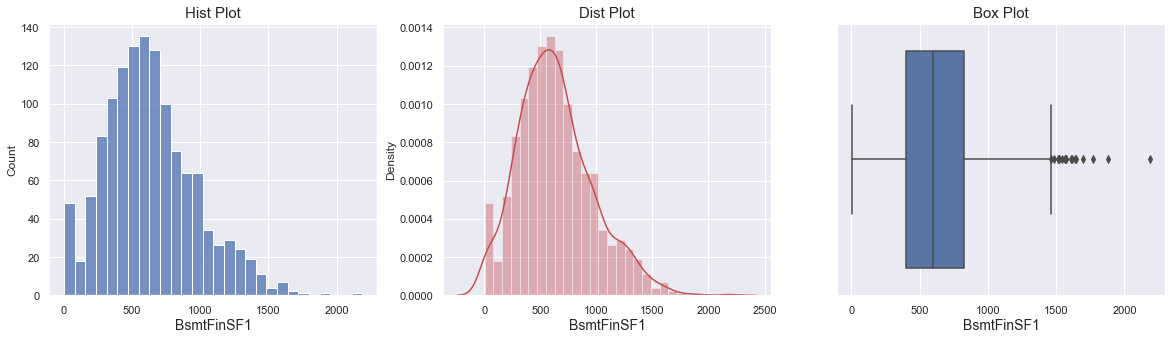

In [4373]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BsmtFinSF1']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('BsmtFinSF1', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BsmtFinSF1'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('BsmtFinSF1', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['BsmtFinSF1']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('BsmtFinSF1', fontsize= 14)
plt.show()

```Remove the outliers by using IQR Method```

In [4374]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['BsmtFinSF1'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['BsmtFinSF1'], 74,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['BsmtFinSF1'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['BsmtFinSF1'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 410.92857142857144

 **************************************************
Higher range:-
 (array([  21,   67,  209,  273,  306,  326,  389,  464,  470,  587,  614,
        615,  675,  696,  719,  787,  876,  892,  939, 1027, 1043, 1078,
       1194, 1227, 1228, 1253], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 26

 **************************************************
Lower range:- 
 (array([], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 0

 **************************************************


In [4375]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1278, 77)
New Shape:------>  (1252, 77)


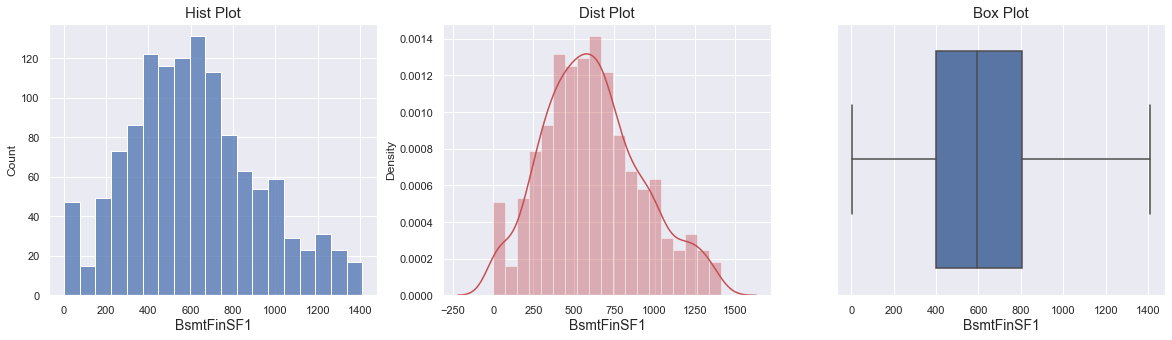

In [4376]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BsmtFinSF1']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('BsmtFinSF1', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BsmtFinSF1'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('BsmtFinSF1', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['BsmtFinSF1']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('BsmtFinSF1', fontsize= 14)
plt.show()

In [4377]:
df['BsmtFinSF1'].skew()

0.3515122913885604

```Analysis of this feature with other features```

Text(0, 0.5, 'BsmtFinSF1')

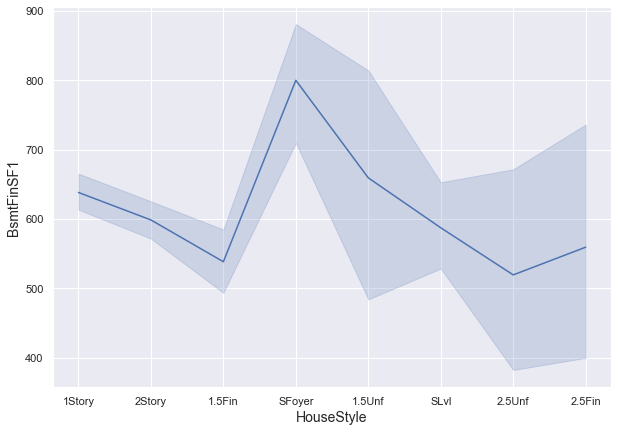

In [4378]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'HouseStyle',y= 'BsmtFinSF1', data=df)
plt.xlabel('HouseStyle', fontsize = 14)
plt.ylabel('BsmtFinSF1', fontsize = 14)

Text(0, 0.5, 'BsmtFinSF1')

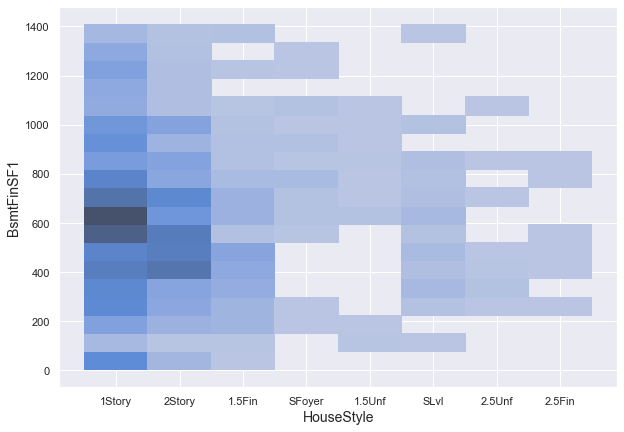

In [4379]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.histplot(x= 'HouseStyle',y= 'BsmtFinSF1', data=df)
plt.xlabel('HouseStyle', fontsize = 14)
plt.ylabel('BsmtFinSF1', fontsize = 14)

In [4380]:
df.groupby("HouseStyle")["BsmtFinSF1"].value_counts().head(100)

HouseStyle  BsmtFinSF1
1.5Fin      312.000000    2
            331.000000    2
            420.000000    2
            462.000000    2
            490.000000    2
                         ..
            686.000000    1
            688.500000    1
            690.000000    1
            690.666667    1
            700.000000    1
Name: BsmtFinSF1, Length: 100, dtype: int64

```Observation:```
1. Column contains zero value.
2. We convert all zero values into Null values and then use interpolate command to treat null values.
3. Then we remove outliers.
4. skewness is improved
5. We can see by histplot, the range of area of 1Story building is around 500 - 800 ft

```Column35: BsmtFinType2: Rating of basement finished area (if multiple types)```

* GLQ - Good Living Quarters
* ALQ - Average Living Quarters
* BLQ - Below Average Living Quarters	
* Rec - Average Rec Room
* LwQ - Low Quality
* Unf - Unfinshed
* NA - No Basement

In [4381]:
df["BsmtFinType2"].unique() #check tyhe unique values

array(['Unf', 'Rec', 'BLQ', 'GLQ', nan, 'ALQ', 'LwQ'], dtype=object)

In [4382]:
df["BsmtFinType2"].value_counts()

Unf    1078
Rec      43
LwQ      43
BLQ      30
ALQ      15
GLQ       9
Name: BsmtFinType2, dtype: int64

Text(0, 0.5, 'Counts')

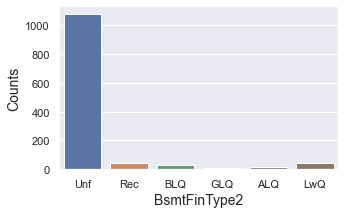

In [4383]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'BsmtFinType2', data=df)
plt.xlabel('BsmtFinType2', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Observation:```
1. Mostly rating goes to unfinished area for basement

```Column36: BsmtFinSF2: Type 2 finished square feet```

In [4384]:
df["BsmtFinSF2"].unique() #check the unique values

array([   0,  823,  682,   96, 1029,  608,  532,  692,  539,   41,  123,
        193, 1120,  872,   28,  240,  239,  150,  180,  661,  258,  486,
        374,  547,   93,  230,  306,  294,  108,  396,  279,  324,  791,
        479,  228,  110,  290,  121,   40,  531,  362,   80,  634,  128,
        391,  336,  472,   35,  435,  182,  132,  495,  438,  287,   64,
        168,  210,  202, 1080,  149,  670,  468,  645,  411,  232, 1474,
        177,  768,  127,  500,  620,  144,  441,   81, 1061,  344,  375,
        219,  125,  906,  311,  627,  117,  208,  551,  147,  173,  264,
       1057,  377,  630,  276,  580,  712,  139,  544,  606,  972,   32,
        163,  175,  841,  400,  546,  174,  215,  420,  492,  273,  345,
        354,  352,  119,  668,  557,  105,  480,  165,  713,  465,  600,
        506,  491], dtype=int64)

In [4385]:
df["BsmtFinSF2"].value_counts()

0       1111
180        4
374        3
182        2
117        2
        ... 
215        1
210        1
208        1
202        1
1474       1
Name: BsmtFinSF2, Length: 123, dtype: int64

In [4386]:
df["BsmtFinSF2"].value_counts(normalize = True)

0       0.887380
180     0.003195
374     0.002396
182     0.001597
117     0.001597
          ...   
215     0.000799
210     0.000799
208     0.000799
202     0.000799
1474    0.000799
Name: BsmtFinSF2, Length: 123, dtype: float64

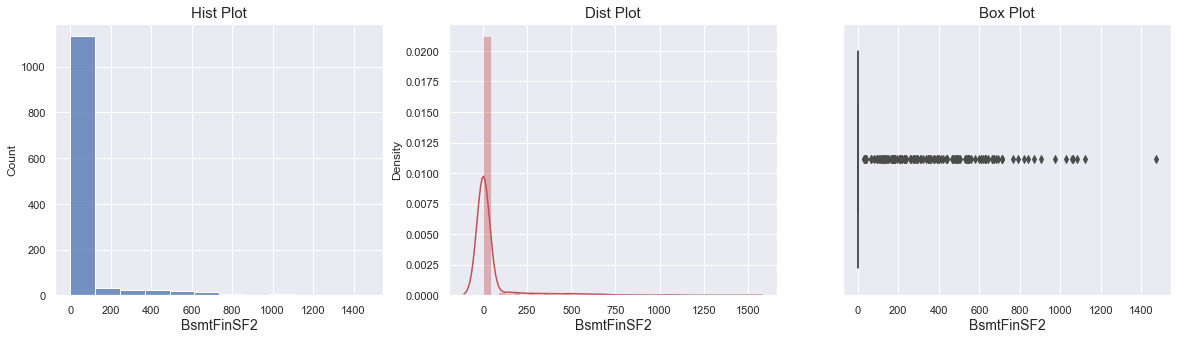

In [4387]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BsmtFinSF2']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BsmtFinSF2'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['BsmtFinSF2']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize= 14)
plt.show()

In [4388]:
df["BsmtFinSF2"].all()

False

In [4389]:
df["BsmtFinSF2"] = df["BsmtFinSF2"].replace(0,np.nan)

In [4390]:
df["BsmtFinSF2"].all()

True

In [4391]:
df["BsmtFinSF2"].isnull().sum()

1111

In [4392]:
df["BsmtFinSF2"] = df["BsmtFinSF2"].interpolate()

In [4393]:
df["BsmtFinSF2"].isnull().sum()

1

In [4394]:
df["BsmtFinSF2"] = df["BsmtFinSF2"].bfill()

In [4395]:
df["BsmtFinSF2"].isnull().sum()

0

In [4396]:
df["BsmtFinSF2"].skew()

0.9763468379092781

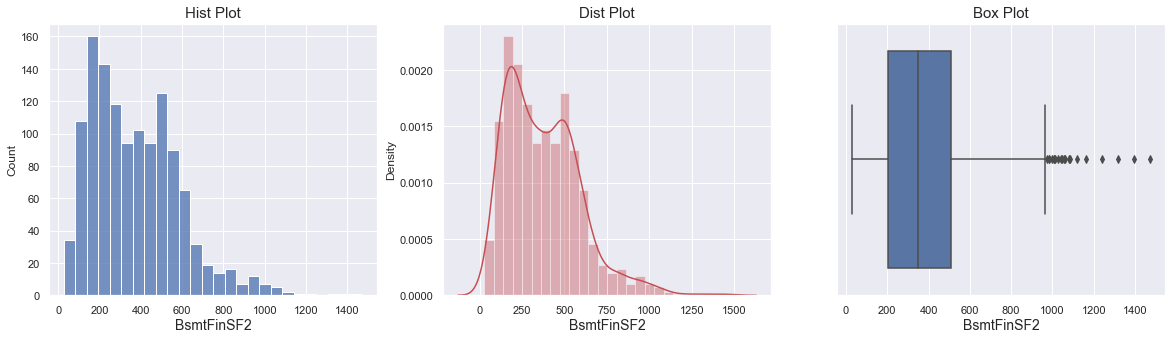

In [4397]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BsmtFinSF2']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BsmtFinSF2'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['BsmtFinSF2']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize= 14)
plt.show()

```Analysis of this feature with other features```

In [4398]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['BsmtFinSF2'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['BsmtFinSF2'], 74,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['BsmtFinSF2'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['BsmtFinSF2'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 300.68382352941177

 **************************************************
Higher range:-
 (array([ 18,  19,  20,  21,  81,  82, 508, 509, 510, 511, 589, 590, 591,
       592, 593, 594, 595, 596, 685, 783, 929], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 21

 **************************************************
Lower range:- 
 (array([], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 0

 **************************************************


In [4399]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1252, 77)
New Shape:------>  (1231, 77)


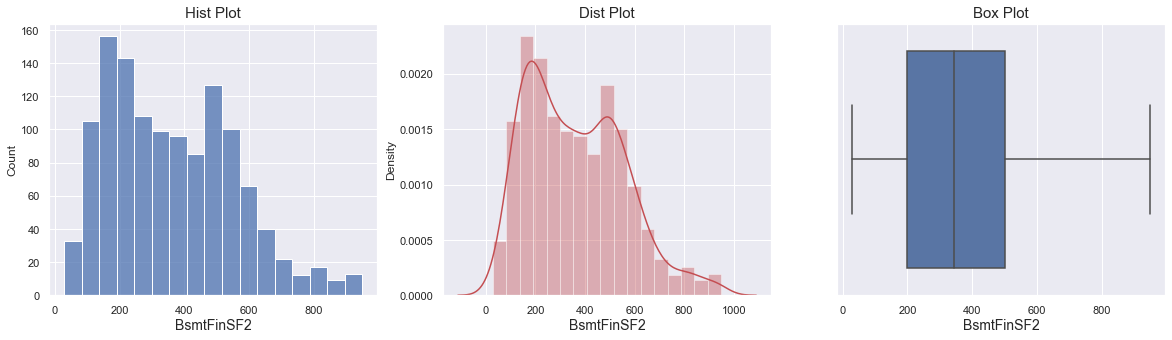

In [4400]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BsmtFinSF2']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BsmtFinSF2'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['BsmtFinSF2']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('BsmtFinSF2', fontsize= 14)
plt.show()

In [4401]:
df["BsmtFinSF2"].skew()

0.5605073151142336

```Observation:```
1. Column contains zero value.
2. We convert all zero values into Null values and then use interpolate command to treat null values.
3. Then we remove outliers.
4. skewness is improved

```Column37: TotalBsmtSF: Total square feet of basement area```

In [4402]:
df["TotalBsmtSF"].unique() #check the unique values

array([1078, 2217, 1117, 1844,  879, 1392, 1134, 1214,  832,  780,  941,
        816,  602, 1232, 1143,  963,  768,  715, 1752,  651,  720,    0,
        969, 1090, 1202,  888,  742,  928,  970,  985,  982,  924, 1269,
       1800, 1510,  290,  992, 1777,  750,  951,  864, 1132,  807, 1462,
        926, 1194,  798, 1496,  520, 1127,  544, 1705,  660, 2076, 1498,
        672,  912, 1389,  690,  960,  728, 1032,  650, 1055, 1099, 1593,
        784, 1144, 1008,  813, 1494,  936,  920, 1104, 1048, 1554,  825,
       1314, 1028,  756, 1080,  691, 1074, 1594,  858,  637,  319, 1442,
       1040, 1196,  894, 1574,  600, 1440,  608,  884, 1478, 1128, 1225,
       1010, 1518, 1262,  876, 1063, 1393, 1319, 1536,  721, 1148, 1386,
       1017,  900,  848, 1337, 1212, 1304, 1065, 1486,  859, 1073,  796,
        622, 1428, 1247, 1126, 1154, 1100, 1175, 1356, 1062,  940, 1489,
       1205,  931,  866, 1188,  952, 1020, 1728, 1094, 1394, 1352, 1614,
       1620,  384, 1241,  882,  990, 1926, 1670, 11

In [4403]:
df["TotalBsmtSF"].value_counts()

0       32
864     29
912     14
672     13
1040    13
        ..
1007     1
1006     1
1005     1
1003     1
2046     1
Name: TotalBsmtSF, Length: 637, dtype: int64

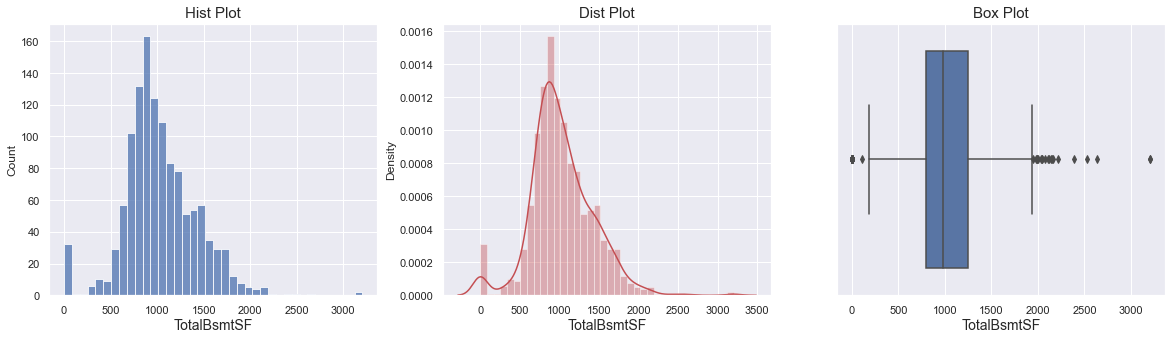

In [4404]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['TotalBsmtSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['TotalBsmtSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['TotalBsmtSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)
plt.show()

In [4405]:
df["TotalBsmtSF"].all()

False

In [4406]:
df["TotalBsmtSF"] = df["TotalBsmtSF"].replace(0, df["TotalBsmtSF"].mean())

In [4407]:
df["TotalBsmtSF"].all()

True

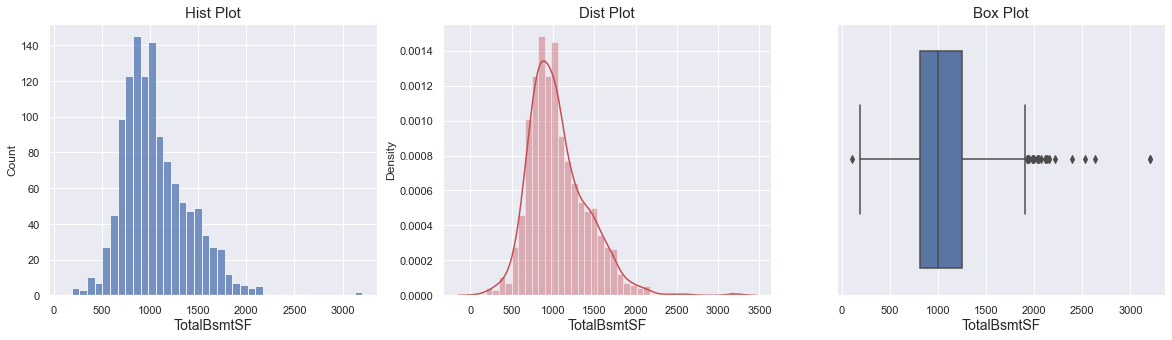

In [4408]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['TotalBsmtSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['TotalBsmtSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['TotalBsmtSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)
plt.show()

In [4409]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['TotalBsmtSF'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['TotalBsmtSF'], 74,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['TotalBsmtSF'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['TotalBsmtSF'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 424.0

 **************************************************
Higher range:-
 (array([   1,   61,  192,  202,  213,  247,  252,  357,  394,  433,  490,
        530,  582,  602,  634,  638,  646,  691,  726,  796,  873,  973,
        979,  995, 1005, 1067, 1193], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 27

 **************************************************
Lower range:- 
 (array([428], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 1

 **************************************************


In [4410]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1231, 77)
New Shape:------>  (1203, 77)


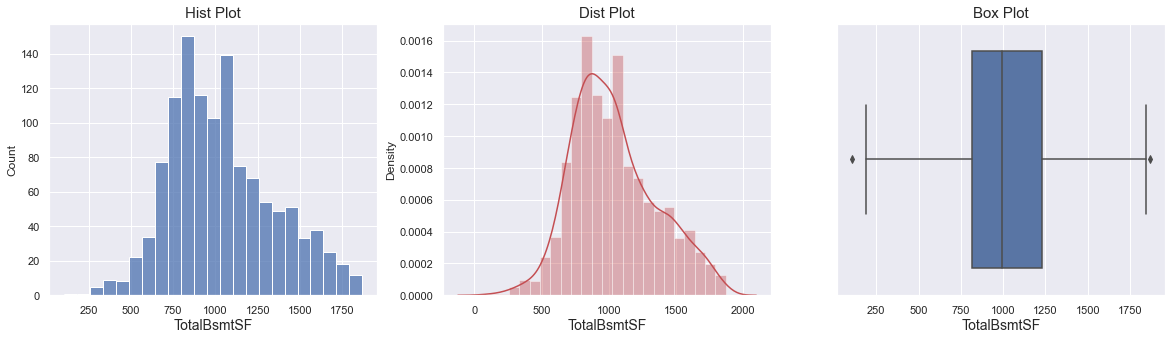

In [4411]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['TotalBsmtSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['TotalBsmtSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['TotalBsmtSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)
plt.show()

In [4412]:
df=df[df['TotalBsmtSF']>250].reset_index(drop=True)
df=df[df['TotalBsmtSF']<1800].reset_index(drop=True)

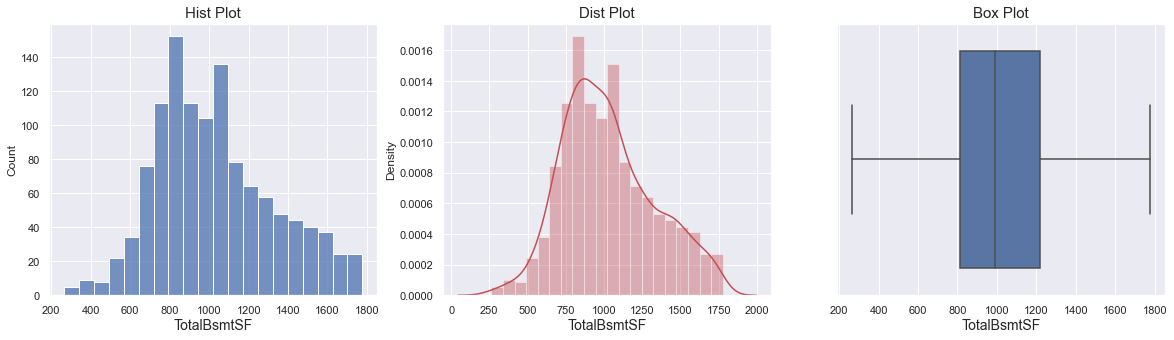

In [4413]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['TotalBsmtSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['TotalBsmtSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['TotalBsmtSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('TotalBsmtSF', fontsize= 14)
plt.show()

In [4414]:
df['TotalBsmtSF'].skew()

0.42371328589853197

```Analysis of this feature with other feature```

Text(0, 0.5, 'TotalBsmtSF')

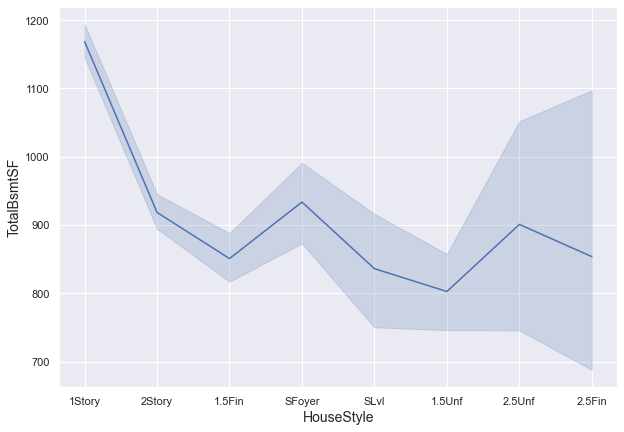

In [4415]:
#visualize this column by catplot
plt.figure(figsize=(10,7))
sns.lineplot(x= 'HouseStyle',y= 'TotalBsmtSF', data=df)
plt.xlabel('HouseStyle', fontsize = 14)
plt.ylabel('TotalBsmtSF', fontsize = 14)

```Observation:```
1. Zero values are found and we replace all zero values into column mean value.
2. Outliers are found and removed by using IQR method.
3. skewness in proved.
4. We see by using line plot, Area of the basement is more in 1Story buildings and the variation of area is higher for 2.5Fin

```Column38: Heating: Type of heating```

* Floor - Floor Furnace
* GasA - Gas forced warm air furnace
* GasW - Gas hot water or steam heat
* Grav - Gravity furnace	
* OthW - Hot water or steam heat other than gas
* Wall - Wall furnace

In [4416]:
df["Heating"].unique() #check the unique values

array(['GasA', 'GasW', 'Floor', 'OthW', 'Wall', 'Grav'], dtype=object)

In [4417]:
df["Heating"].value_counts()

GasA     1161
GasW       16
Grav        5
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

In [4418]:
df["Heating"].value_counts(normalize = True)

GasA     0.976451
GasW     0.013457
Grav     0.004205
Wall     0.003364
OthW     0.001682
Floor    0.000841
Name: Heating, dtype: float64

Text(0, 0.5, 'Counts')

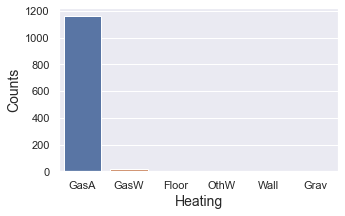

In [4419]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'Heating', data=df)
plt.xlabel('Heating', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4420]:
df.drop(columns = "Heating", inplace = True)

```Observation:```
1. column is highly imbalanced, so we drop it

```Column39: HeatingQC: Heating quality and condition```

* Ex - Excellent
* Gd - Good
* TA - Average/Typical
* Fa - Fair
* Po - Poor

In [4421]:
df["HeatingQC"].unique() #check the unique values

array(['TA', 'Ex', 'Fa', 'Gd', 'Po'], dtype=object)

In [4422]:
df["HeatingQC"].value_counts()

Ex    594
TA    349
Gd    205
Fa     40
Po      1
Name: HeatingQC, dtype: int64

Text(0, 0.5, 'Counts')

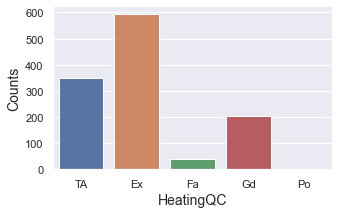

In [4423]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'HeatingQC', data=df)
plt.xlabel('HeatingQC', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other feature```

In [4424]:
df.groupby("HouseStyle")["HeatingQC"].value_counts()

HouseStyle  HeatingQC
1.5Fin      TA            49
            Ex            42
            Gd            36
            Fa             7
1.5Unf      Ex             5
            Gd             3
            TA             2
            Fa             1
            Po             1
1Story      Ex           284
            TA           193
            Gd            84
            Fa            20
2.5Fin      Ex             4
            Fa             1
            TA             1
2.5Unf      Gd             3
            Fa             2
            TA             2
            Ex             1
2Story      Ex           230
            TA            67
            Gd            61
            Fa             9
SFoyer      TA            14
            Ex             9
            Gd             6
SLvl        TA            21
            Ex            19
            Gd            12
Name: HeatingQC, dtype: int64

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

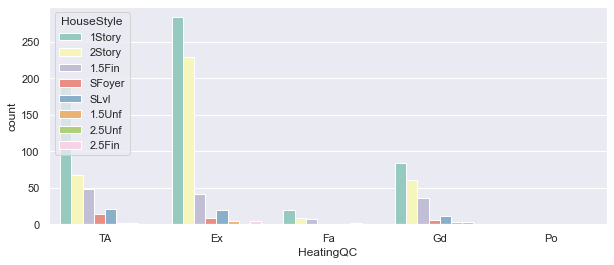

In [4425]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'HeatingQC', hue = 'HouseStyle', data = df, palette = 'Set3')

In [4426]:
df.groupby("RoofStyle")["HeatingQC"].value_counts()

RoofStyle  HeatingQC
Flat       TA             2
           Fa             1
Gable      Ex           483
           TA           270
           Gd           174
           Fa            32
           Po             1
Gambrel    Ex             4
           TA             4
           Gd             3
Hip        Ex           105
           TA            70
           Gd            26
           Fa             7
Mansard    TA             3
           Ex             2
           Gd             2
Name: HeatingQC, dtype: int64

<AxesSubplot:xlabel='HeatingQC', ylabel='count'>

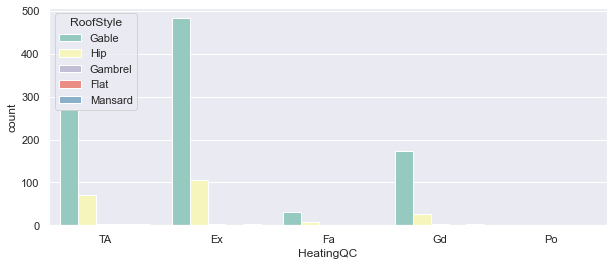

In [4427]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'HeatingQC', hue = 'RoofStyle', data = df, palette = 'Set3')

```Observation:```
1. Heating Quality is excellent for many houses.
2. Heating Quality is excellent for 1Story houses.

```Column40: CentralAir: Central air conditioning```

* N - No
* Y - Yes

In [4428]:
df["CentralAir"].unique() #check tyhe unique values

array(['Y', 'N'], dtype=object)

In [4429]:
df["CentralAir"].value_counts()

Y    1103
N      86
Name: CentralAir, dtype: int64

Text(0, 0.5, 'Counts')

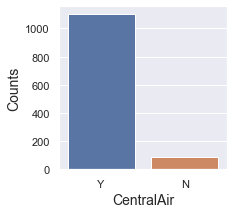

In [4430]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'CentralAir', data=df)
plt.xlabel('CentralAir', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Analysis of this feature with other features```

<AxesSubplot:xlabel='CentralAir', ylabel='count'>

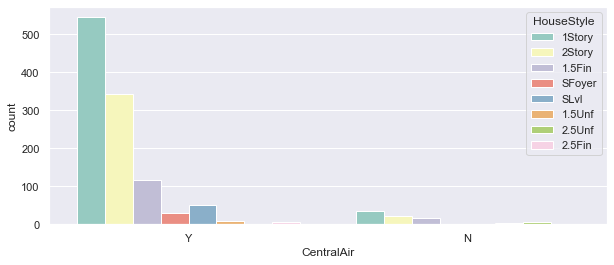

In [4431]:
plt.figure(figsize = (10,4))
sns.countplot(x = 'CentralAir', hue = 'HouseStyle', data = df, palette = 'Set3')

In [4432]:
df.groupby("CentralAir")["HouseStyle"].value_counts()

CentralAir  HouseStyle
N           1Story         36
            2Story         23
            1.5Fin         17
            2.5Unf          6
            1.5Unf          3
            2.5Fin          1
Y           1Story        545
            2Story        344
            1.5Fin        117
            SLvl           52
            SFoyer         29
            1.5Unf          9
            2.5Fin          5
            2.5Unf          2
Name: HouseStyle, dtype: int64

```Observation:```
1. In thsi column, Yes is more than No.
2. Mostly, 1Story houses has Central AC than others

```Column41: Electrical: Electrical system```

* SBrkr - Standard Circuit Breakers & Romex
* FuseA - Fuse Box over 60 AMP and all Romex wiring (Average)	
* FuseF - 60 AMP Fuse Box and mostly Romex wiring (Fair)
* FuseP - 60 AMP Fuse Box and mostly knob & tube wiring (poor)
* Mix - Mixed

In [4433]:
df["Electrical"].unique() #check the unique values

array(['SBrkr', 'FuseA', 'FuseF', 'FuseP', 'Mix'], dtype=object)

In [4434]:
df["Electrical"].value_counts()

SBrkr    1081
FuseA      81
FuseF      23
FuseP       3
Mix         1
Name: Electrical, dtype: int64

Text(0, 0.5, 'Counts')

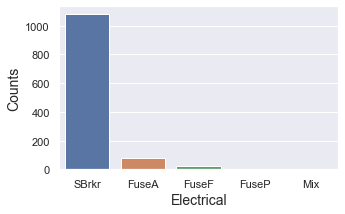

In [4435]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'Electrical', data=df)
plt.xlabel('Electrical', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4436]:
df.groupby("Electrical")["HouseStyle"].value_counts()

Electrical  HouseStyle
FuseA       1Story         43
            1.5Fin         22
            2Story         10
            1.5Unf          2
            2.5Unf          2
            2.5Fin          1
            SLvl            1
FuseF       1Story          9
            1.5Fin          8
            2Story          3
            1.5Unf          2
            SLvl            1
FuseP       1Story          2
            2Story          1
Mix         1Story          1
SBrkr       1Story        526
            2Story        353
            1.5Fin        104
            SLvl           50
            SFoyer         29
            1.5Unf          8
            2.5Unf          6
            2.5Fin          5
Name: HouseStyle, dtype: int64

```Observation:```
1. Mostly, houses has Standard Circuit Breakers for safety purpose.
2. One 1 Story house has mixed type

```Column42: 1stFlrSF: First Floor square feet```

In [4437]:
df["1stFlrSF"].unique() #check the unique values

array([ 958, 1127,  879, 1392, 1803, 1214,  832,  780,  941,  872,  900,
        816, 1232, 1113,  963,  768,  849, 1752,  707,  854, 1547,  969,
       1370, 2158,  912,  779,  928,  970,  985, 1007, 1122,  334, 1269,
       1584,  438, 1306,  930, 1795, 1061,  951,  827, 1132, 1175, 1462,
        926,  874, 1194,  798, 1496,  520, 1165,  774, 1718,  808,  803,
       1498, 1072, 1085, 1389,  698,  986, 1040,  728, 1032, 1055, 1099,
       1593, 1168, 1144, 1053,  822, 1652,  936,  920, 1130,  864, 1186,
       1048, 1554, 1097, 1314,  888, 1436, 1051, 1080,  691, 1088, 1646,
        897, 1035, 1442, 1196,  894, 1574,  600, 1476, 1319,  884,  882,
       1478, 1149, 1276,  961, 1052, 1518, 1262,  964,  784, 1287, 1422,
       1537, 1536,  904,  720,  841, 1148, 1569, 1026,  848, 1337, 1212,
       1304,  915, 1486,  899,  859, 1811,  983,  796,  741,  954,  820,
       1428, 1247, 1126, 1154, 1100, 1661, 1490, 1182, 1500, 1352, 1024,
       1489, 2117, 1236, 1192, 1283,  866, 1217,  9

In [4438]:
df["1stFlrSF"].value_counts()

864     21
912     13
1040    13
848     12
894     10
        ..
1064     1
1063     1
1062     1
1061     1
1968     1
Name: 1stFlrSF, Length: 637, dtype: int64

In [4439]:
df["1stFlrSF"].isnull().sum()

0

In [4440]:
df["1stFlrSF"].all()

True

In [4441]:
df["1stFlrSF"].skew()

0.6655087172567483

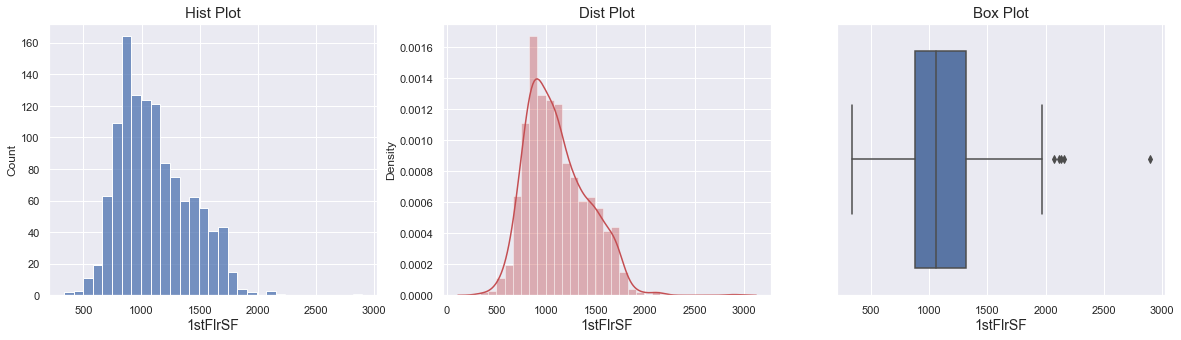

In [4442]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['1stFlrSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('1stFlrSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['1stFlrSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('1stFlrSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['1stFlrSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('1stFlrSF', fontsize= 14)
plt.show()

```Removing the outliers by using IQR Method```

In [4443]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['1stFlrSF'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['1stFlrSF'], 74,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['1stFlrSF'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['1stFlrSF'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 427.5

 **************************************************
Higher range:-
 (array([  23,  159,  893,  940, 1014, 1156], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 6

 **************************************************
Lower range:- 
 (array([], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 0

 **************************************************


In [4444]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1189, 76)
New Shape:------>  (1183, 76)


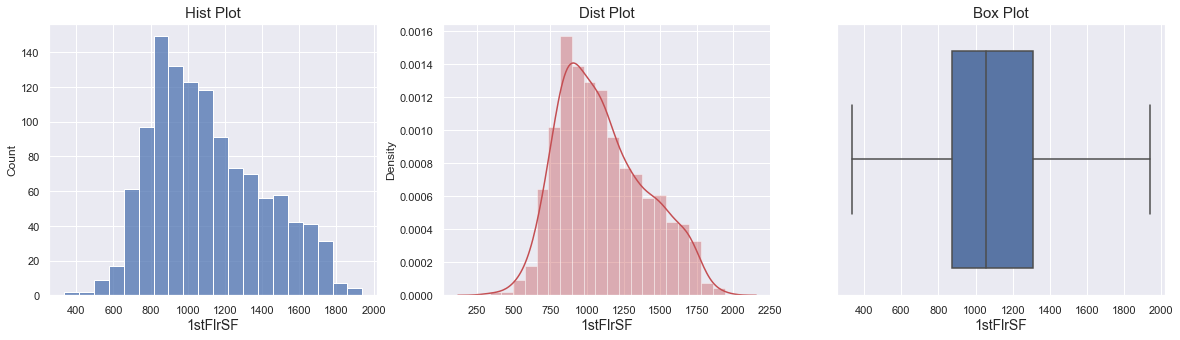

In [4445]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['1stFlrSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('1stFlrSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['1stFlrSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('1stFlrSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['1stFlrSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('1stFlrSF', fontsize= 14)
plt.show()

In [4446]:
df["1stFlrSF"].skew()

0.4603590229548975

```Observation:```
1. Outliers are removed
2. No Null valuesa and no zero values are found
3. skewness is improved

```Column43: 2ndFlrSF: Second floor square feet```

In [4447]:
df["2ndFlrSF"].unique() #check the unique values

array([   0,  886,  984,  384,  596,  888,  521,  602,  829,  811,  682,
        720,  739,  793, 1208,  862,  807,  762,  842,  704,  213,  649,
        728,  514,  220,  581,  800,  843,  866, 1054,  896,  676,  884,
        788,  439,  371,  678,  600,  809,  677, 1151, 1141, 1336,  756,
        864, 1177,  981,  983,  595,  319,  813,  622,  527, 1304, 1142,
        940,  872,  403, 1182,  913, 1020, 1349,  656,  539,  741,  846,
        730,  924,  472,  790, 1323,  685,  336, 1063, 1122,  871,  611,
       1053,  684,  568, 1001,  840, 1194,  628,  464,  661,  742,  848,
        744, 1370,  992,  358,  883, 1101,  783,  941,  432, 1093,  709,
        475,  378,  530,  850,  504,  764,  325, 1112,  903,  590,  441,
        806,  561, 1070,  928,  665,  918, 1357, 1312, 1017,  729,  780,
       1040,  368, 1540,  767, 1031,  844,  689,  592,  887, 1215,  349,
       1088,  854,  787,  524,  564, 1427,  914,  653,  672,  769, 1254,
       1066,  702,  467, 1038,  881,  526,  664, 12

In [4448]:
df["2ndFlrSF"].value_counts()

0       662
728       9
720       7
896       6
862       5
       ... 
812       1
813       1
817       1
828       1
1611      1
Name: 2ndFlrSF, Length: 364, dtype: int64

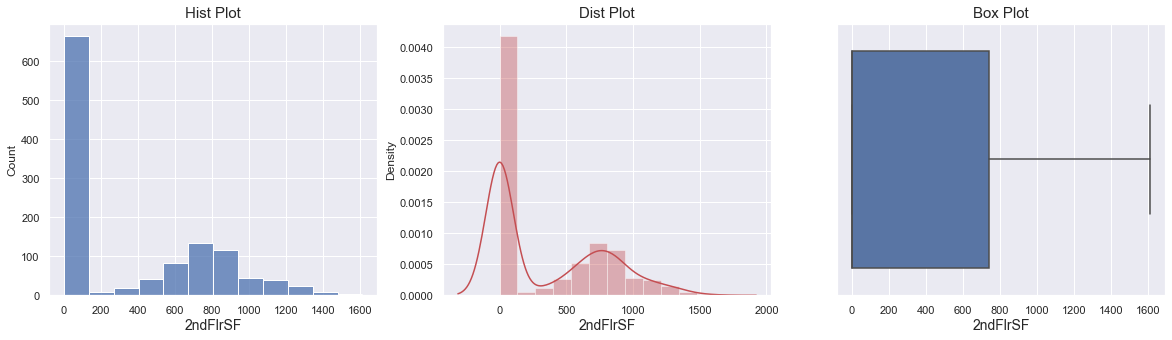

In [4449]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['2ndFlrSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['2ndFlrSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['2ndFlrSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)
plt.show()

In [4450]:
df["2ndFlrSF"].all()

False

In [4451]:
df["2ndFlrSF"] = df["2ndFlrSF"].replace(0, np.nan)

In [4452]:
df["2ndFlrSF"].all()

True

In [4453]:
df["2ndFlrSF"].isnull().sum()

662

In [4454]:
df["2ndFlrSF"] = df["2ndFlrSF"].interpolate()

In [4455]:
df["2ndFlrSF"].isnull().sum()

1

In [4456]:
df["2ndFlrSF"] = df["2ndFlrSF"].bfill()

In [4457]:
df["2ndFlrSF"].isnull().sum()

0

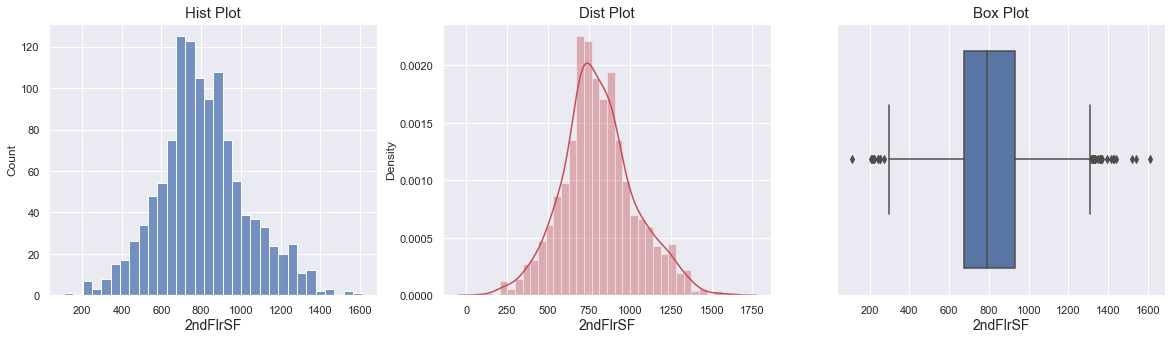

In [4458]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['2ndFlrSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['2ndFlrSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['2ndFlrSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)
plt.show()

```Removing the outliers by using IQR Method```

In [4459]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['2ndFlrSF'], 26,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['2ndFlrSF'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['2ndFlrSF'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['2ndFlrSF'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 249.83119658119654

 **************************************************
Higher range:-
 (array([ 108,  169,  206,  251,  308,  309,  310,  326,  327,  355,  432,
        464,  502,  565,  598,  599,  600,  601,  731,  786,  796,  825,
        901, 1036, 1071, 1072, 1073], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 27

 **************************************************
Lower range:- 
 (array([  57,   65,  419,  538,  603,  680,  692,  914,  933,  945, 1089,
       1090, 1151], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 13

 **************************************************


In [4460]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1183, 76)
New Shape:------>  (1143, 76)


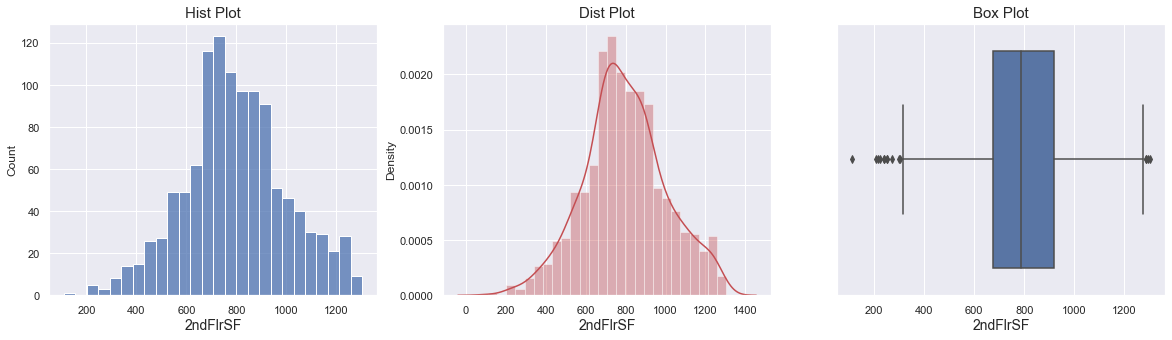

In [4461]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['2ndFlrSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['2ndFlrSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['2ndFlrSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)
plt.show()

In [4462]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['2ndFlrSF'], 27,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['2ndFlrSF'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['2ndFlrSF'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['2ndFlrSF'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 235.41666666666674

 **************************************************
Higher range:-
 (array([ 149,  456,  586,  821,  981, 1079], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 6

 **************************************************
Lower range:- 
 (array([ 136,  285,  407,  473,  522,  581,  657,  669,  884,  903,  914,
       1051, 1052, 1053, 1112], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 15

 **************************************************


In [4463]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1143, 76)
New Shape:------>  (1122, 76)


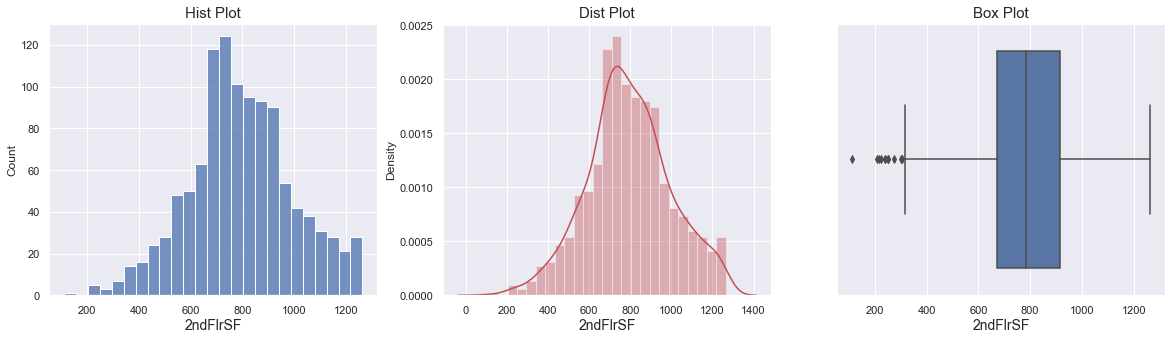

In [4464]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['2ndFlrSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['2ndFlrSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['2ndFlrSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)
plt.show()

In [4465]:
df = df[df["2ndFlrSF"]>310].reset_index(drop = True)

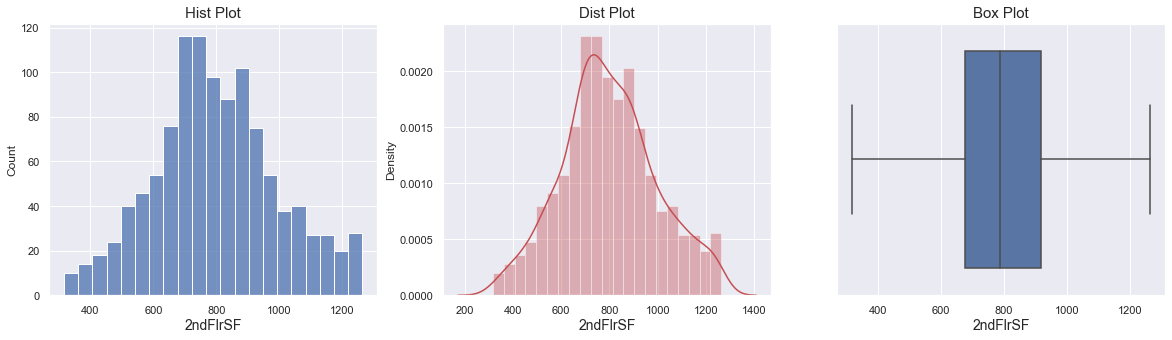

In [4466]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['2ndFlrSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['2ndFlrSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['2ndFlrSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('2ndFlrSF', fontsize= 14)
plt.show()

```Column44: LowQualFinSF: Low quality finished square feet (all floors)```

In [4467]:
df["LowQualFinSF"].unique() #check the unique values

array([  0, 528,  53, 156, 390, 234, 144, 360,  80, 514, 120, 384, 481,
       513, 232, 371, 473, 420, 397, 205], dtype=int64)

In [4468]:
df["LowQualFinSF"].value_counts()

0      1091
360       2
384       1
514       1
513       1
481       1
473       1
420       1
397       1
390       1
371       1
53        1
234       1
232       1
205       1
156       1
144       1
120       1
80        1
528       1
Name: LowQualFinSF, dtype: int64

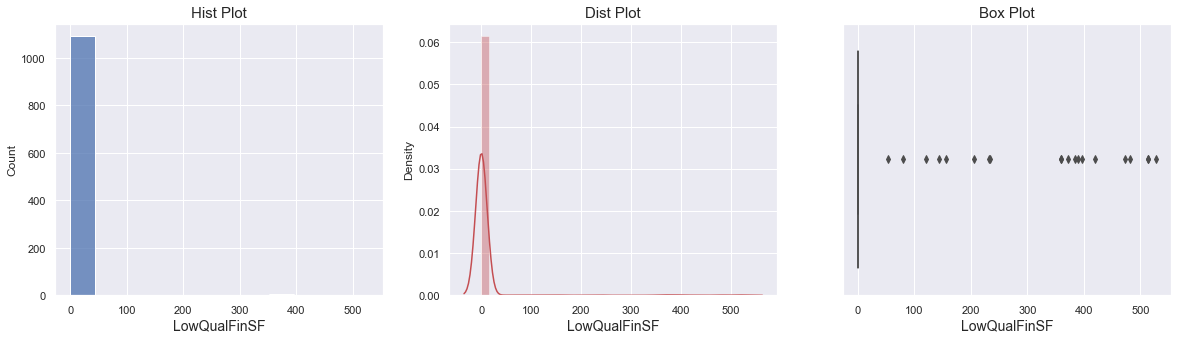

In [4469]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LowQualFinSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('LowQualFinSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LowQualFinSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('LowQualFinSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LowQualFinSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('LowQualFinSF', fontsize= 14)
plt.show()

In [4470]:
df["LowQualFinSF"].skew()

8.853145067082549

In [4471]:
df["LowQualFinSF"].all()

False

In [4472]:
df["LowQualFinSF"] = df["LowQualFinSF"].replace(0,np.nan)

In [4473]:
df["LowQualFinSF"].all()

True

In [4474]:
df["LowQualFinSF"].isnull().sum()

1091

In [4475]:
df["LowQualFinSF"] = df["LowQualFinSF"].interpolate()

In [4476]:
df["LowQualFinSF"].isnull().sum()

19

In [4477]:
df["LowQualFinSF"] = df["LowQualFinSF"].bfill()

In [4478]:
df["LowQualFinSF"].isnull().sum()

0

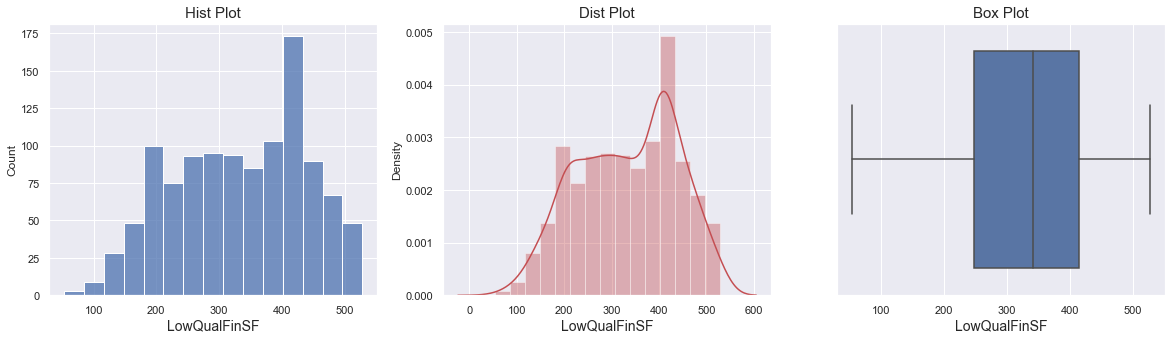

In [4479]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['LowQualFinSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('LowQualFinSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['LowQualFinSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('LowQualFinSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['LowQualFinSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('LowQualFinSF', fontsize= 14)
plt.show()

In [4480]:
df["LowQualFinSF"].skew()

-0.20328305365179297

```Column45: GrLivArea: Above grade (ground) living area square feet```

In [4481]:
df["GrLivArea"].unique() #check the unique values

array([ 958, 2013, 1863, 1392, 1803, 1214, 1216, 1376, 1829, 1393, 1502,
        816, 1232, 1113, 1792,  768, 1660, 1752, 1389, 1382, 2320,  969,
       1370,  912,  935,  928, 1709,  985, 1800, 1122,  334, 1269, 2792,
        438, 1306,  930, 1795, 1923,  951,  827,  900, 1132, 1982, 2224,
       1316,  874, 1194, 1640, 1496,  754, 1165,  774, 1718, 1656,  803,
       1498, 1734, 1426,  986, 1040, 1456, 1539, 2263, 1099, 1593, 1968,
       1144, 1053, 1665, 1652,  936, 1786, 2184,  864, 1986, 1048, 1554,
       1993, 1314, 1564, 1839, 1080, 1088, 1646,  872, 1336, 1406, 1442,
       1846, 1196,  894, 1574, 1200, 1641, 2153, 1319, 2035,  882, 1478,
       2290, 1717, 1052, 1518, 1262,  964, 1728,  784, 1287, 2599, 1537,
       1536,  904,  720,  841, 1148, 1569, 2007,  848, 1337, 1212, 2287,
       1635, 1375, 1486,  899, 1811, 1796,  796, 1363,  954, 1347, 1428,
       1247, 1126, 1154, 1100, 1661, 2324, 1500, 1352, 1964, 1489, 2108,
       1595, 1283, 2094, 1779, 1217,  952, 1928, 13

In [4482]:
df["GrLivArea"].value_counts()

864     15
848     10
1040    10
894      9
1456     9
        ..
1117     1
1116     1
1112     1
1110     1
2046     1
Name: GrLivArea, Length: 699, dtype: int64

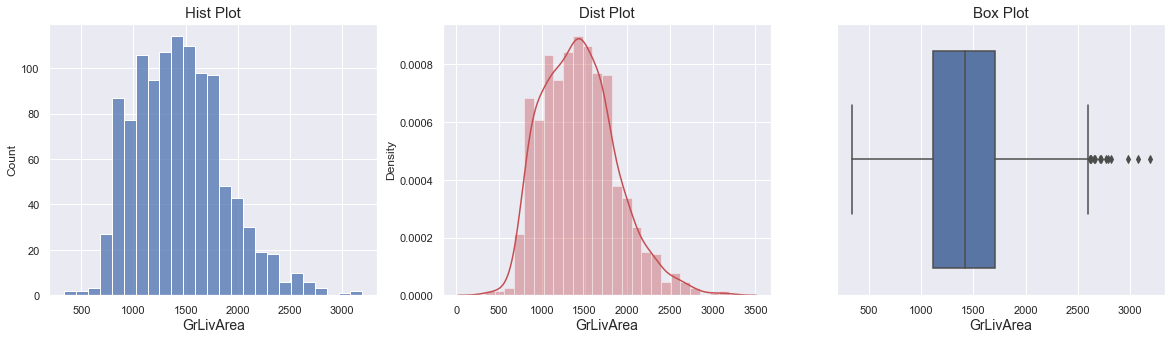

In [4483]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['GrLivArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('GrLivArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['GrLivArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('GrLivArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['GrLivArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('GrLivArea', fontsize= 14)
plt.show()

In [4484]:
df["GrLivArea"].skew()

0.5805509270567609

```Removing the outliers by using IQR Method```

In [4485]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['GrLivArea'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['GrLivArea'], 75,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['GrLivArea'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['GrLivArea'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 596.0

 **************************************************
Higher range:-
 (array([  33,  206,  279,  332,  356,  357,  419,  545,  878,  931,  967,
       1034, 1102], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 13

 **************************************************
Lower range:- 
 (array([], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 0

 **************************************************


In [4486]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1111, 76)
New Shape:------>  (1098, 76)


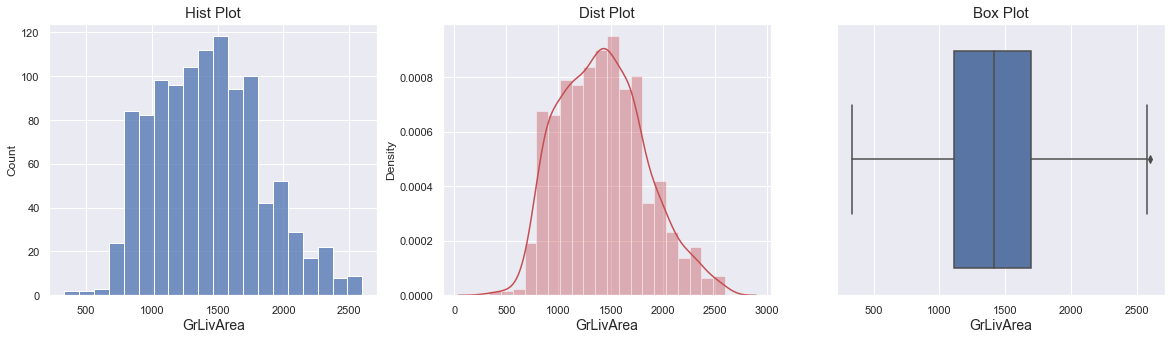

In [4487]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['GrLivArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('GrLivArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['GrLivArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('GrLivArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['GrLivArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('GrLivArea', fontsize= 14)
plt.show()

In [4488]:
df= df[df["GrLivArea"]<2500].reset_index(drop = True)

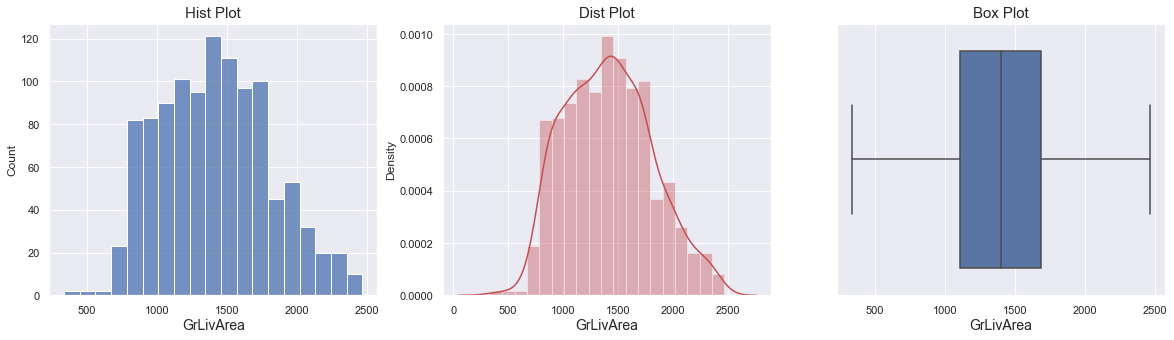

In [4489]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['GrLivArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('GrLivArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['GrLivArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('GrLivArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['GrLivArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('GrLivArea', fontsize= 14)
plt.show()

```Column46: BsmtFullBath: Basement full bathrooms```

In [4490]:
df["BsmtFullBath"].unique() #check the unique values

array([0, 1, 2, 3], dtype=int64)

In [4491]:
df["BsmtFullBath"].value_counts()

0    665
1    418
2      5
3      1
Name: BsmtFullBath, dtype: int64

In [4492]:
df["BsmtFullBath"].value_counts(normalize = True)

0    0.610652
1    0.383838
2    0.004591
3    0.000918
Name: BsmtFullBath, dtype: float64

Text(0, 0.5, 'Counts')

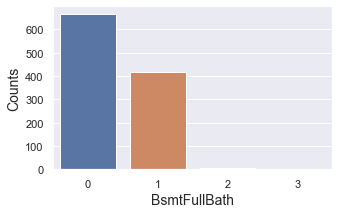

In [4493]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'BsmtFullBath', data=df)
plt.xlabel('BsmtFullBath', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column47: BsmtHalfBath: Basement half bathrooms```

In [4494]:
df["BsmtHalfBath"].unique() #check tyhe unique values

array([0, 1, 2], dtype=int64)

In [4495]:
df["BsmtHalfBath"].value_counts()

0    1027
1      60
2       2
Name: BsmtHalfBath, dtype: int64

In [4496]:
df["BsmtHalfBath"].value_counts(normalize = True)

0    0.943067
1    0.055096
2    0.001837
Name: BsmtHalfBath, dtype: float64

Text(0, 0.5, 'Counts')

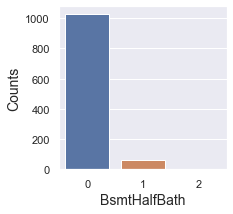

In [4497]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'BsmtHalfBath', data=df)
plt.xlabel('BsmtHalfBath', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column48: FullBath: Full bathrooms above grade```

In [4498]:
df["FullBath"].unique() #check the unique values

array([2, 1, 3, 0], dtype=int64)

In [4499]:
df["FullBath"].value_counts()

2    553
1    522
0      7
3      7
Name: FullBath, dtype: int64

In [4500]:
df["FullBath"].value_counts(normalize = True)

2    0.507805
1    0.479339
0    0.006428
3    0.006428
Name: FullBath, dtype: float64

Text(0, 0.5, 'Counts')

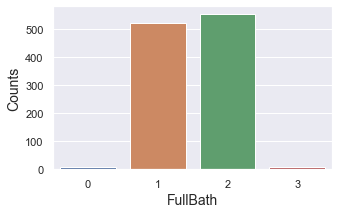

In [4501]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'FullBath', data=df)
plt.xlabel('FullBath', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column49:HalfBath: Half baths above grade```

In [4502]:
df["HalfBath"].unique() #check the unique values

array([0, 1, 2], dtype=int64)

In [4503]:
df["HalfBath"].value_counts()

0    709
1    371
2      9
Name: HalfBath, dtype: int64

In [4504]:
df["HalfBath"].value_counts(normalize = True)

0    0.651056
1    0.340680
2    0.008264
Name: HalfBath, dtype: float64

Text(0, 0.5, 'Counts')

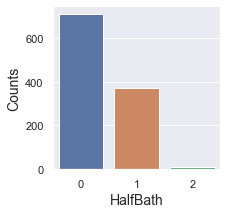

In [4505]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'HalfBath', data=df)
plt.xlabel('HalfBath', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column50: BedroomAbvGr: Bedrooms above grade (does NOT include basement bedrooms)```

In [4506]:
df["BedroomAbvGr"].unique() #check the unique values

array([2, 3, 4, 1, 0, 5, 6], dtype=int64)

In [4507]:
df["BedroomAbvGr"].value_counts()

3    637
2    276
4    125
1     32
5     10
6      5
0      4
Name: BedroomAbvGr, dtype: int64

Text(0, 0.5, 'Counts')

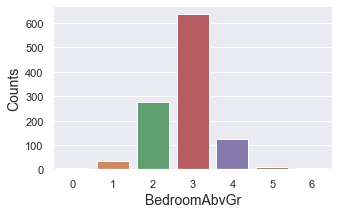

In [4508]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'BedroomAbvGr', data=df)
plt.xlabel('BedroomAbvGr', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column51: Kitchen: Kitchens above grade```

In [4509]:
df["KitchenAbvGr"].unique() #check the unique values

array([1, 2, 3, 0], dtype=int64)

In [4510]:
df["KitchenAbvGr"].value_counts()

1    1036
2      50
3       2
0       1
Name: KitchenAbvGr, dtype: int64

Text(0, 0.5, 'Counts')

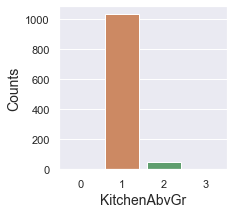

In [4511]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'KitchenAbvGr', data=df)
plt.xlabel('KitchenAbvGr', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column52:KitchenQual: Kitchen quality```

* Ex - Excellent
* Gd - Good
* TA - Typical/Average
* Fa - Fair
* Po - Poor

In [4512]:
df["KitchenQual"].unique() #check the unique values

array(['TA', 'Gd', 'Ex', 'Fa'], dtype=object)

In [4513]:
df["KitchenQual"].value_counts()

TA    572
Gd    436
Ex     48
Fa     33
Name: KitchenQual, dtype: int64

In [4514]:
df["KitchenQual"].value_counts(normalize = True)

TA    0.525253
Gd    0.400367
Ex    0.044077
Fa    0.030303
Name: KitchenQual, dtype: float64

Text(0, 0.5, 'Counts')

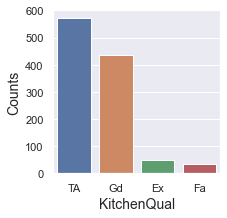

In [4515]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'KitchenQual', data=df)
plt.xlabel('KitchenQual', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column53: TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)```

In [4516]:
df["TotRmsAbvGrd"].unique() #check the unique values

array([ 5,  8,  9,  6,  7,  4,  2,  3, 10, 11, 12], dtype=int64)

In [4517]:
df["TotRmsAbvGrd"].value_counts()

6     333
7     253
5     223
8     134
4      75
9      34
10     20
3      10
11      4
12      2
2       1
Name: TotRmsAbvGrd, dtype: int64

Text(0, 0.5, 'Counts')

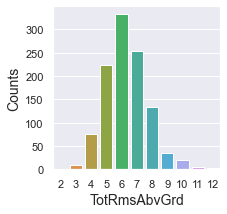

In [4518]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'TotRmsAbvGrd', data=df)
plt.xlabel('TotRmsAbvGrd', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4519]:
df.groupby("HouseStyle")["TotRmsAbvGrd"].value_counts()

HouseStyle  TotRmsAbvGrd
1.5Fin      6                40
            7                39
            5                16
            8                14
            9                 4
            4                 2
            10                1
1.5Unf      5                 6
            4                 4
1Story      6               200
            5               176
            7                91
            4                54
            8                22
            3                 9
            10                3
            9                 2
            2                 1
2.5Fin      8                 2
            10                1
2.5Unf      6                 2
            7                 1
            8                 1
            9                 1
            10                1
            11                1
2Story      7               109
            8                91
            6                54
            9                27
            10 

```Column54: Functional: Home functionality (Assume typical unless deductions are warranted)```

* Typ - Typical Functionality
* Min1 - Minor Deductions 1
* Min2 - Minor Deductions 2
* Mod - Moderate Deductions
* Maj1 - Major Deductions 1
* Maj2 - Major Deductions 2
* Sev - Severely Damaged
* Sal - Salvage only

In [4520]:
df["Functional"].unique() #check the unique values

array(['Typ', 'Mod', 'Maj1', 'Min2', 'Min1', 'Maj2'], dtype=object)

In [4521]:
df["Functional"].value_counts()

Typ     1016
Min2      28
Min1      22
Mod       11
Maj1       8
Maj2       4
Name: Functional, dtype: int64

In [4522]:
df["Functional"].value_counts(normalize = True)

Typ     0.932966
Min2    0.025712
Min1    0.020202
Mod     0.010101
Maj1    0.007346
Maj2    0.003673
Name: Functional, dtype: float64

Text(0, 0.5, 'Counts')

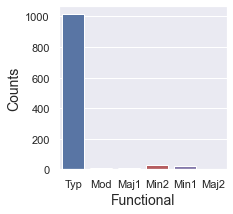

In [4523]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'Functional', data=df)
plt.xlabel('Functional', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column55: Fireplaces: Number of fireplaces```

In [4524]:
df["Fireplaces"].unique() #check the unique values

array([1, 0, 2, 3], dtype=int64)

In [4525]:
df["Fireplaces"].value_counts()

0    575
1    456
2     56
3      2
Name: Fireplaces, dtype: int64

Text(0, 0.5, 'Counts')

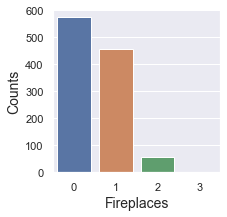

In [4526]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'Fireplaces', data=df)
plt.xlabel('Fireplaces', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column56: FireplaceQu: Fireplace quality```

* Ex - Excellent - Exceptional Masonry Fireplace
* Gd - Good - Masonry Fireplace in main level
* TA - Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement
* Fa - Fair - Prefabricated Fireplace in basement
* Po - Poor - Ben Franklin Stove
* NA - No Fireplace

In [4527]:
df["FireplaceQu"].unique() #check the unique values

array(['TA', 'Gd', nan, 'Fa', 'Po', 'Ex'], dtype=object)

In [4528]:
df["FireplaceQu"].value_counts()

Gd    242
TA    220
Fa     29
Po     14
Ex      9
Name: FireplaceQu, dtype: int64

In [4529]:
df["FireplaceQu"].isnull().sum()

575

In [4530]:
df["FireplaceQu"] = df["FireplaceQu"].bfill()

In [4531]:
df["FireplaceQu"].isnull().sum()

0

In [4532]:
df["FireplaceQu"].value_counts()

Gd    513
TA    479
Fa     67
Po     19
Ex     11
Name: FireplaceQu, dtype: int64

In [4533]:
df["FireplaceQu"] = df["FireplaceQu"].pad()

In [4534]:
df["FireplaceQu"].isnull().sum()

0

In [4535]:
df["FireplaceQu"].value_counts()

Gd    513
TA    479
Fa     67
Po     19
Ex     11
Name: FireplaceQu, dtype: int64

Text(0, 0.5, 'Counts')

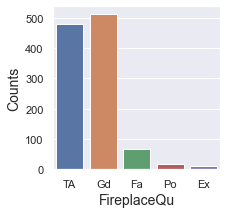

In [4536]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'FireplaceQu', data=df)
plt.xlabel('FireplaceQu', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column57: GarageType: Garage location```

* 2Types - More than one type of garage
* Attchd - Attached to home
* Basment - Basement Garage
* BuiltIn - Built-In (Garage part of house - typically has room above garage)
* CarPort - Car Port
* Detchd - Detached from home
* NA - No Garage

In [4537]:
df["GarageType"].unique() #check the unique values

array(['Attchd', 'BuiltIn', 'Detchd', nan, '2Types', 'CarPort', 'Basment'],
      dtype=object)

In [4538]:
df["GarageType"].value_counts()

Attchd     647
Detchd     309
BuiltIn     47
Basment     14
CarPort      8
2Types       3
Name: GarageType, dtype: int64

Text(0, 0.5, 'Counts')

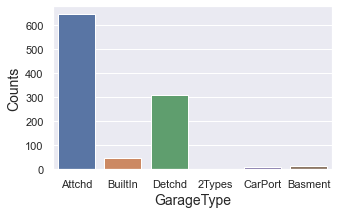

In [4539]:
#visualize this column by Countplot
plt.figure(figsize =(5,3))
sns.countplot(x = 'GarageType', data=df)
plt.xlabel('GarageType', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column58: GarageYrBlt: Year garage was built```

In [4540]:
df["GarageYrBlt"].unique() #check the unique values

array([1977., 1997., 2006., 1957., 1965., 1947., 1937., 2003., 1955.,
       1923., 2002., 2007., 1987., 2001., 1988., 1939., 2005., 1991.,
       1979., 1975., 1976., 1978., 1956., 2004., 1982., 2000., 1948.,
         nan, 1964., 1930., 1968., 1946., 1992., 1936., 1967., 1989.,
       1974., 1959., 1966., 1916., 1941., 1962., 1926., 1950., 1925.,
       1983., 1999., 1969., 1998., 2008., 1971., 1980., 1945., 1995.,
       1994., 1970., 1949., 1953., 1921., 1993., 1961., 1963., 1938.,
       1960., 1958., 1935., 1940., 1990., 1910., 1954., 1927., 1985.,
       1986., 1929., 2009., 1981., 1920., 1984., 1973., 1996., 1922.,
       1924., 1942., 1900., 1931., 1951., 2010., 1972., 1932., 1928.,
       1933., 1906., 1914., 1952., 1934., 1915.])

In [4541]:
df["GarageYrBlt"].value_counts()

2005.0    49
2004.0    43
2006.0    40
2003.0    35
2007.0    33
          ..
1933.0     1
1906.0     1
2010.0     1
1932.0     1
1900.0     1
Name: GarageYrBlt, Length: 95, dtype: int64

In [4542]:
df["GarageYrBlt"].isnull().sum()

61

In [4543]:
df["GarageYrBlt"] = df["GarageYrBlt"].bfill()

In [4544]:
df["GarageYrBlt"].isnull().sum()

0

In [4545]:
df["GarageYrBlt"].value_counts()

2005.0    50
2004.0    46
2006.0    41
2003.0    38
2007.0    36
          ..
1933.0     1
1900.0     1
2010.0     1
1932.0     1
1906.0     1
Name: GarageYrBlt, Length: 95, dtype: int64

```Column59: GarageFinish: Interior finish of the garage```

* Fin - Finished
* RFn - Rough Finished	
* Unf - Unfinished
* NA - No Garage

In [4546]:
df["GarageFinish"].unique() #check tyhe unique values

array(['RFn', 'Unf', 'Fin', nan], dtype=object)

In [4547]:
df["GarageFinish"].value_counts()

Unf    475
RFn    334
Fin    219
Name: GarageFinish, dtype: int64

In [4548]:
df["GarageFinish"].isnull().sum()

61

In [4549]:
df["GarageFinish"] = df["GarageFinish"].bfill()

In [4550]:
df["GarageFinish"].isnull().sum()

0

In [4551]:
df["GarageFinish"].value_counts()

Unf    503
RFn    353
Fin    233
Name: GarageFinish, dtype: int64

In [4552]:
df["GarageFinish"].value_counts(normalize = True)

Unf    0.461892
RFn    0.324151
Fin    0.213958
Name: GarageFinish, dtype: float64

Text(0, 0.5, 'Counts')

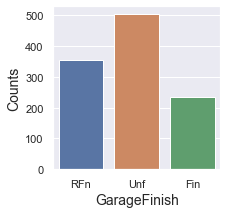

In [4553]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'GarageFinish', data=df)
plt.xlabel('GarageFinish', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

In [4554]:
df.groupby("GarageFinish")["GarageYrBlt"].value_counts(bins = 3)

GarageFinish                      
Fin           (1979.333, 2009.0]      184
              (1949.667, 1979.333]     47
              (1919.91, 1949.667]       2
RFn           (1983.667, 2010.0]      220
              (1957.333, 1983.667]    122
              (1930.92, 1957.333]      11
Unf           (1936.333, 1972.667]    237
              (1972.667, 2009.0]      190
              (1899.89, 1936.333]      76
Name: GarageYrBlt, dtype: int64

```Column60: GarageCars: Size of garage in car capacity```

In [4555]:
df["GarageCars"].unique() #check the unique values

array([2, 3, 1, 0, 4], dtype=int64)

In [4556]:
df["GarageCars"].value_counts()

2    635
1    301
3     90
0     61
4      2
Name: GarageCars, dtype: int64

Text(0, 0.5, 'Counts')

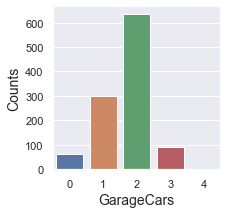

In [4557]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'GarageCars', data=df)
plt.xlabel('GarageCars', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column61: GarageArea: Size of garage in square feet```

In [4558]:
df["GarageArea"].unique() #check the unique values

array([ 440,  455,  660,  528,  484,  461,  336,  198,  613,  300,  180,
        432,  632,  504,  564,  396,  240,  576,  672,  479,  470,  308,
        252,  380,  328,  264,  463,    0,  246,  756,  534,  327,  392,
        288,  451,  575,  738,  312,  520,  474,  490,  826,  360,  675,
        418,  625,  390,  216,  686,  905,  352,  682,  530,  750,  562,
        499,  608,  836,  486,  286,  627,  495,  476,  442,  409,  482,
        480,  570,  615,  315,  400,  824,  546,  736,  270,  434,  294,
        779,  642,  588,  460,  572,  462,  532,  287,  812,  420,  573,
        667,  456,  544,  384,  483,  550,  540,  377,  648,  506,  497,
        283,  574,  840,  514,  466,  865,  473,  275,  912,  569,  690,
        720,  299,  513,  478,  342,  505,  650,  457,  338,  494,  160,
       1043,  502,  539,  722,  477,  281,  871,  636,  408,  680,  439,
        445,  624,  276,  577,  614,  754,  205,  786,  487,  983,  413,
       1025,  552,  753,  776,  410,  453,  551,  8

In [4559]:
df["GarageArea"].value_counts()

0       61
440     41
576     35
240     35
484     29
        ..
482      1
483      1
494      1
498      1
1053     1
Name: GarageArea, Length: 347, dtype: int64

In [4560]:
df["GarageArea"].all()

False

In [4561]:
df["GarageArea"] = df["GarageArea"].replace(0,np.nan)

In [4562]:
df["GarageArea"].all()

True

In [4563]:
df["GarageArea"].isnull().sum()

61

In [4564]:
df["GarageArea"] = df["GarageArea"].interpolate(method = 'linear', limit_direction = 'forward')

In [4565]:
df["GarageArea"].isnull().sum()

0

In [4566]:
df["GarageArea"].value_counts()

440.0    41
240.0    36
576.0    35
484.0    30
528.0    25
         ..
606.0     1
768.0     1
439.0     1
459.0     1
485.0     1
Name: GarageArea, Length: 380, dtype: int64

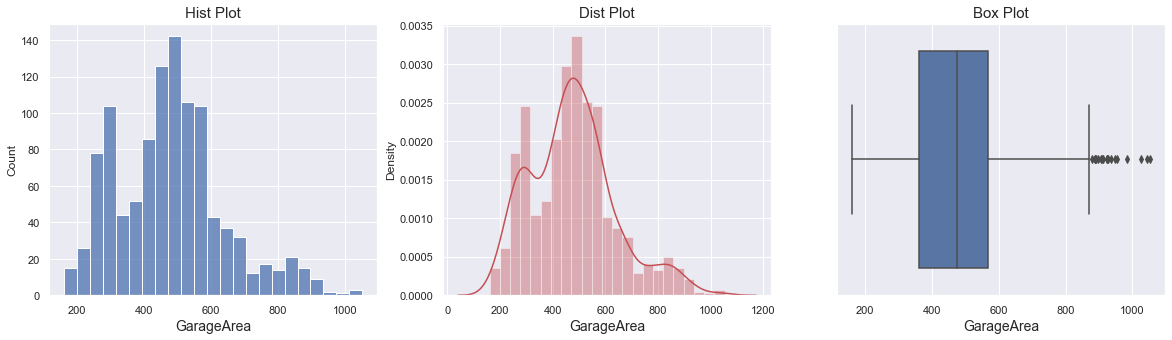

In [4567]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['GarageArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('GarageArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['GarageArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('GarageArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['GarageArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('GarageArea', fontsize= 14)
plt.show()

```Remove the outliers by using IQR Method```

In [4568]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['GarageArea'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['GarageArea'], 74,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['GarageArea'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['GarageArea'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 204.0

 **************************************************
Higher range:-
 (array([  64,  168,  204,  217,  260,  266,  301,  312,  317,  459,  489,
        516,  537,  590,  604,  616,  746,  782,  821,  926,  954,  969,
       1019, 1084], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 24

 **************************************************
Lower range:- 
 (array([], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 0

 **************************************************


In [4569]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1089, 76)
New Shape:------>  (1065, 76)


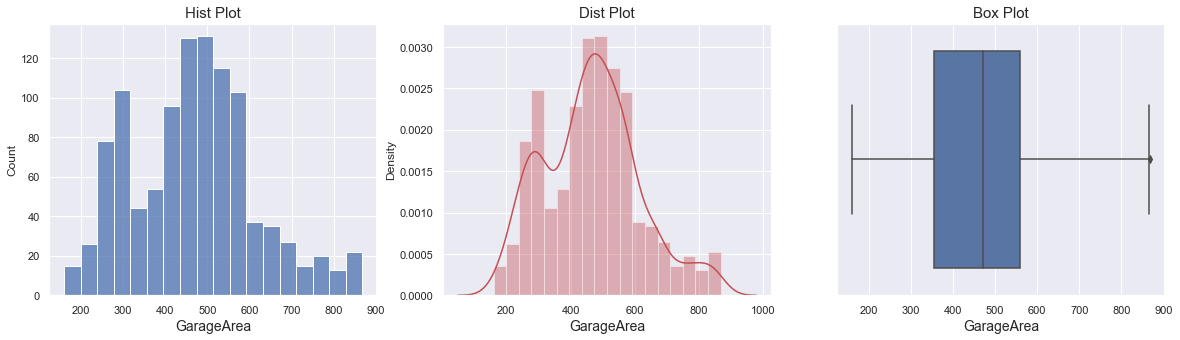

In [4570]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['GarageArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('GarageArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['GarageArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('GarageArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['GarageArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('GarageArea', fontsize= 14)
plt.show()

In [4571]:
df = df[df["GarageArea"]<850].reset_index(drop=True)

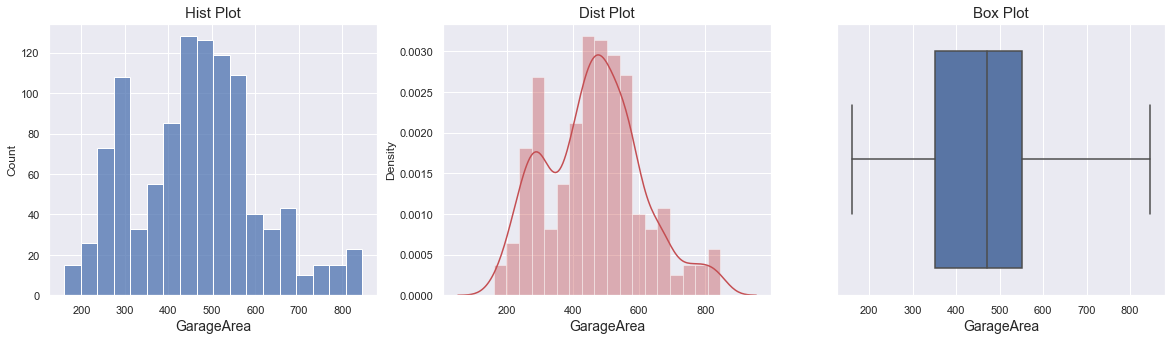

In [4572]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['GarageArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('GarageArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['GarageArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('GarageArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['GarageArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('GarageArea', fontsize= 14)
plt.show()

```Column62: GarageQual: Garage quality```

* Ex - Excellent
* Gd - Good
* TA - Typical/Average
* Fa - Fair
* Po - Poor
* NA - No Garage

In [4573]:
df["GarageQual"].unique() #check the unique values

array(['TA', 'Fa', nan, 'Gd', 'Po'], dtype=object)

In [4574]:
df["GarageQual"].value_counts()

TA    941
Fa     44
Gd      8
Po      3
Name: GarageQual, dtype: int64

In [4575]:
df["GarageQual"].isnull().sum()

60

In [4576]:
df["GarageQual"] = df["GarageQual"].bfill()

In [4577]:
df["GarageQual"].isnull().sum()

0

In [4578]:
df["GarageQual"].value_counts()

TA    999
Fa     45
Gd      9
Po      3
Name: GarageQual, dtype: int64

In [4579]:
df["GarageQual"].value_counts(normalize = True)

TA    0.946023
Fa    0.042614
Gd    0.008523
Po    0.002841
Name: GarageQual, dtype: float64

Text(0, 0.5, 'Counts')

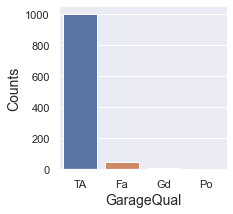

In [4580]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'GarageQual', data=df)
plt.xlabel('GarageQual', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column63: GarageCond: Garage condition```

* Ex - Excellent
* Gd - Good
* TA - Typical/Average
* Fa - Fair
* Po - Poor
* NA - No Garage

In [4581]:
df["GarageCond"].unique() #check the unique values

array(['TA', 'Fa', 'Gd', nan, 'Po'], dtype=object)

In [4582]:
df["GarageCond"].value_counts()

TA    951
Fa     32
Gd      7
Po      6
Name: GarageCond, dtype: int64

In [4583]:
df["GarageCond"].isnull().sum()

60

In [4584]:
df["GarageCond"] = df["GarageCond"].bfill()

In [4585]:
df["GarageCond"].isnull().sum()

0

In [4586]:
df["GarageCond"].value_counts()

TA    1010
Fa      32
Gd       8
Po       6
Name: GarageCond, dtype: int64

In [4587]:
df["GarageCond"].value_counts(normalize = True)

TA    0.956439
Fa    0.030303
Gd    0.007576
Po    0.005682
Name: GarageCond, dtype: float64

Text(0, 0.5, 'Counts')

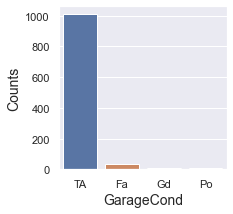

In [4588]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'GarageCond', data=df)
plt.xlabel('GarageCond', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column64: PavedDrive: Paved driveway```

* Y - Paved 
* P - Partial Pavement
* N - Dirt/Gravel

In [4589]:
df["PavedDrive"].unique() #check the unique values

array(['Y', 'N', 'P'], dtype=object)

In [4590]:
df["PavedDrive"].value_counts()

Y    966
N     69
P     21
Name: PavedDrive, dtype: int64

Text(0, 0.5, 'Counts')

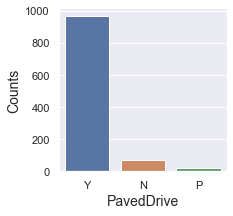

In [4591]:
#visualize this column by Countplot
plt.figure(figsize =(3,3))
sns.countplot(x = 'PavedDrive', data=df)
plt.xlabel('PavedDrive', fontsize = 14)
plt.ylabel('Counts', fontsize = 14)

```Column65: WoodDeckSF: Wood deck area in square feet```

In [4592]:
df["WoodDeckSF"].unique() #check tyhe unique values

array([  0, 180, 100, 158, 192, 121,  96, 132, 370,  58, 196, 237, 120,
       261, 210, 168, 171, 240, 175, 252, 184,  33, 138,  53, 208, 351,
        70, 278, 305, 156, 224, 315, 128, 371, 144, 253,  66, 114, 185,
       298, 187, 364, 216, 250, 143, 222, 149, 356,  64,  85, 355, 147,
       161, 182, 198,  40, 238,  48, 116, 112, 164, 229, 288, 232, 276,
       392, 421, 166, 268, 255,  36, 736, 212, 304, 123, 509, 169, 173,
       105,  95, 142, 353, 256, 177,  38, 125,  92,  60, 344, 382, 264,
       245,  72, 140, 172, 241, 431, 176, 234, 260, 146, 270,  55, 324,
        98, 576, 322, 148,  74, 219, 154, 160, 199, 328,  80, 110, 203,
       194, 335, 104, 257, 263,  49, 418, 280,  24, 272, 188, 242,  57,
        12,  26, 170, 476, 352, 635, 302, 136, 290, 243, 426, 379, 289,
       303, 292,  89, 201, 200, 153,  86, 115, 218, 239, 233, 220, 133,
       155, 215, 265, 135, 333,  44, 436,  35, 227, 207, 190, 468,  45,
       365, 390, 108, 394, 117, 186, 296, 235, 165, 127, 262, 10

In [4593]:
df["WoodDeckSF"].value_counts()

0      574
100     26
120     25
144     25
192     23
      ... 
186      1
187      1
190      1
32       1
736      1
Name: WoodDeckSF, Length: 216, dtype: int64

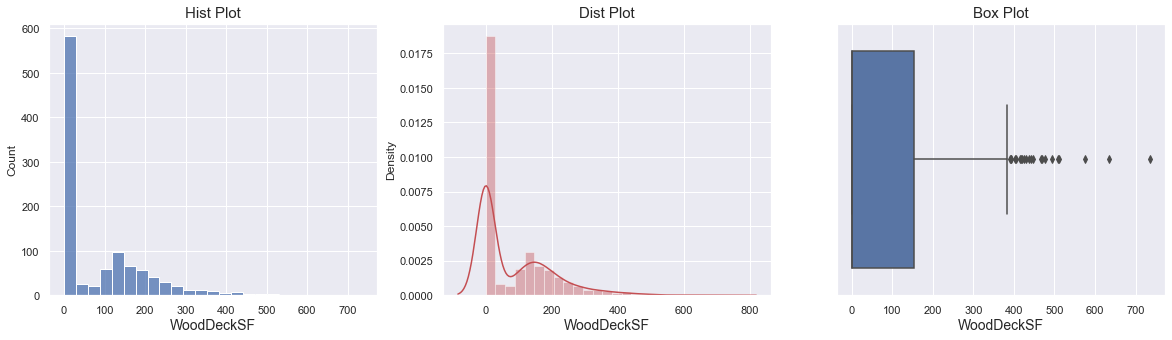

In [4594]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['WoodDeckSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['WoodDeckSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['WoodDeckSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)
plt.show()

In [4595]:
df["WoodDeckSF"].all()

False

In [4596]:
df["WoodDeckSF"] = df["WoodDeckSF"].replace(0, np.nan)

In [4597]:
df["WoodDeckSF"].all()

True

In [4598]:
df["WoodDeckSF"].isnull().sum()

574

In [4599]:
df["WoodDeckSF"] = df["WoodDeckSF"].interpolate(method = 'linear', limit_direction = 'forward')

In [4600]:
df["WoodDeckSF"].isnull().sum()

1

In [4601]:
df["WoodDeckSF"] = df["WoodDeckSF"].bfill()

In [4602]:
df["WoodDeckSF"].isnull().sum()

0

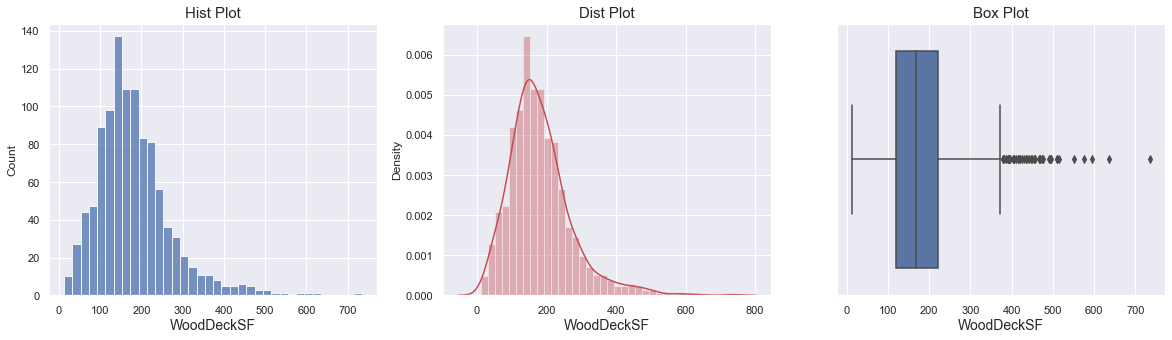

In [4603]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['WoodDeckSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['WoodDeckSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['WoodDeckSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)
plt.show()

In [4604]:
#Detecting the outlier by using iqr method and removing them.
q1 = np.percentile(df['WoodDeckSF'], 25,
                   interpolation = 'midpoint')
 
q3 = np.percentile(df['WoodDeckSF'], 73,
                   interpolation = 'midpoint')
iqr = q3 - q1

print('Inter quartile range:------>',iqr)
print("\n",'*'*50)

# higher side 
higher_side = df['WoodDeckSF'] >= (q3+1.5*iqr)

print('Higher range:-\n',np.where(higher_side))

print("\n",'*'*50)

for i in np.where(higher_side):
    print('Total Number of Higher side Outlier is:-------->', len(i))
    
print("\n",'*'*50)

# lower side 
lower_side = df['WoodDeckSF'] <= (q1-1.5*iqr)
print('Lower range:- \n',np.where(lower_side))

print("\n",'*'*50)

for j in np.where(lower_side):
    print('Total Number of Lower side Outlier is:-------->', len(j))
    
print("\n",'*'*50)

Inter quartile range:------> 97.38888888888889

 **************************************************
Higher range:-
 (array([ 13,  91, 111, 188, 201, 203, 227, 228, 229, 242, 296, 332, 370,
       371, 372, 460, 511, 515, 516, 517, 518, 519, 520, 537, 542, 706,
       736, 742, 760, 781, 830, 831, 832, 835, 836, 837, 838, 839, 840,
       841, 842, 872, 873, 874, 904, 917, 955], dtype=int64),)

 **************************************************
Total Number of Higher side Outlier is:--------> 47

 **************************************************
Lower range:- 
 (array([], dtype=int64),)

 **************************************************
Total Number of Lower side Outlier is:--------> 0

 **************************************************


In [4605]:
#First print the old shape and then compare
print("old Shape:------> ", df.shape)
#removing the outliers
high=np.where(higher_side)
low=np.where(lower_side)
df=df.drop(df.index[high])
df=df.drop(df.index[low])
 
print("New Shape:------> ", df.shape)

old Shape:------>  (1056, 76)
New Shape:------>  (1009, 76)


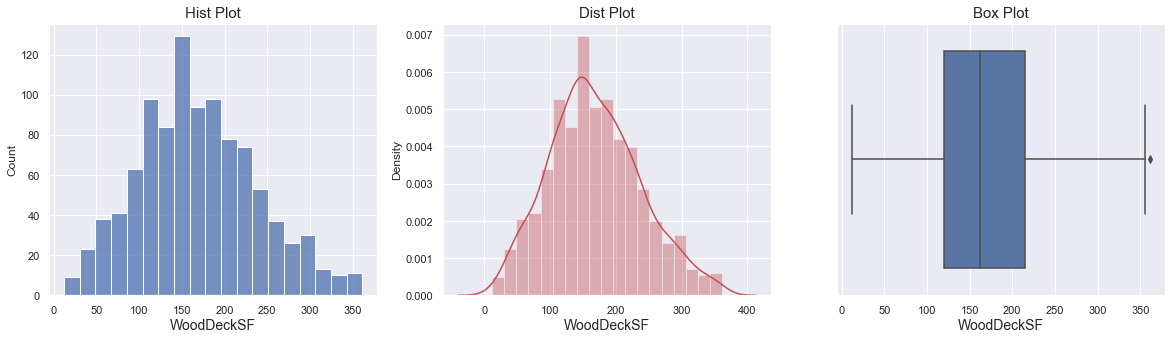

In [4606]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['WoodDeckSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['WoodDeckSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['WoodDeckSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)
plt.show()

In [4607]:
df=df[df['WoodDeckSF']<350].reset_index(drop=True)

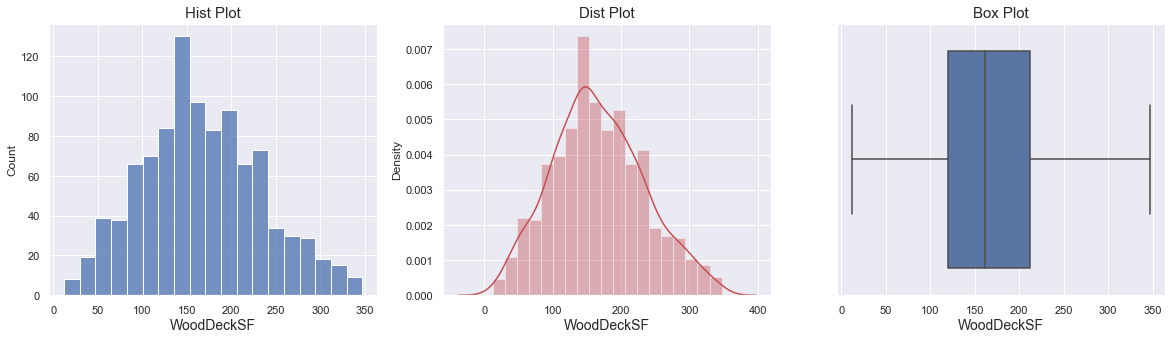

In [4608]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['WoodDeckSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['WoodDeckSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['WoodDeckSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('WoodDeckSF', fontsize= 14)
plt.show()

In [4609]:
#Actual shape of the dataset
print("The shape of the dataset now is:----> {0}".format(df.shape))

The shape of the dataset now is:----> (1001, 76)


```Column66: OpenPorchSF: Open porch area in square feet```

In [4610]:
df["OpenPorchSF"].unique() #check tyhe unique values

array([205, 130,  17,   0,  39,  96,  82, 144,  40,  63,  36, 159,  28,
        64,  84,  45, 129,  44,  38, 128,  24, 240,  78, 120, 189,  88,
        80,  48,  42, 102,  20,  73,  66,  22,  50, 124,  74,  53,  47,
       104, 172, 142,  35, 140,  56,  52,  32,  21, 162,  58, 192, 182,
        27,  60,  76, 241,  83, 116, 112, 213, 117, 114, 105, 156,  57,
        75, 158, 106,  59,  23, 110,  25, 160, 138,  16,  18, 176, 211,
       134, 235,  70, 187,  68, 113,  98, 228,  62, 150,  61,   8, 180,
       312,  72, 151,  91,  54, 121, 123,  51,  55, 132,  26,  33, 288,
       170, 238, 100,  46, 108,  65, 122,  11,  29, 188, 184,  43,  87,
       133,  30,  12, 195, 199,  34, 155, 234,  94, 168,  49, 152, 523,
       146, 198,  77,  10,  81, 204,  90,  93,  69, 247, 111, 141, 169,
        41, 118, 224, 125, 214, 200, 208, 285, 174, 119, 304,  85,  99,
       252, 287], dtype=int64)

In [4611]:
df["OpenPorchSF"].value_counts()

0      485
36      22
48      17
20      17
45      14
      ... 
159      1
77       1
10       1
106      1
523      1
Name: OpenPorchSF, Length: 158, dtype: int64

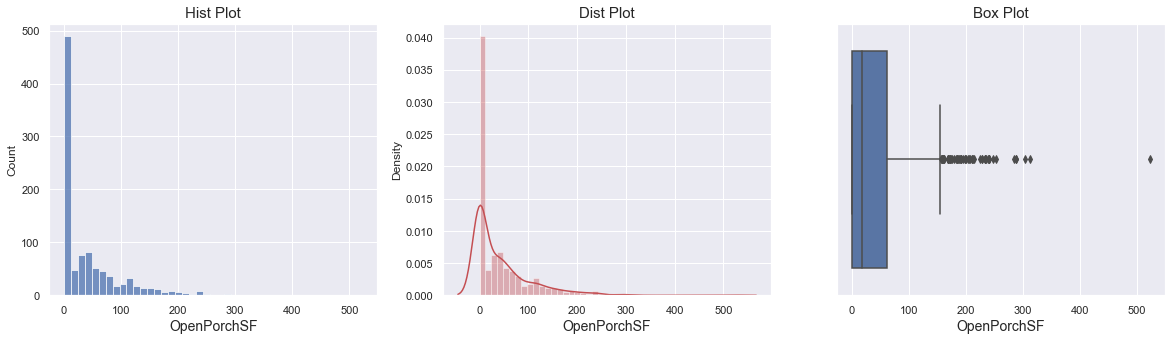

In [4612]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['OpenPorchSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['OpenPorchSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['OpenPorchSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize= 14)
plt.show()

In [4613]:
df["OpenPorchSF"] = df["OpenPorchSF"].replace(0,np.nan)

In [4614]:
df["OpenPorchSF"] = df["OpenPorchSF"].interpolate()

In [4615]:
df["OpenPorchSF"].isnull().sum()

0

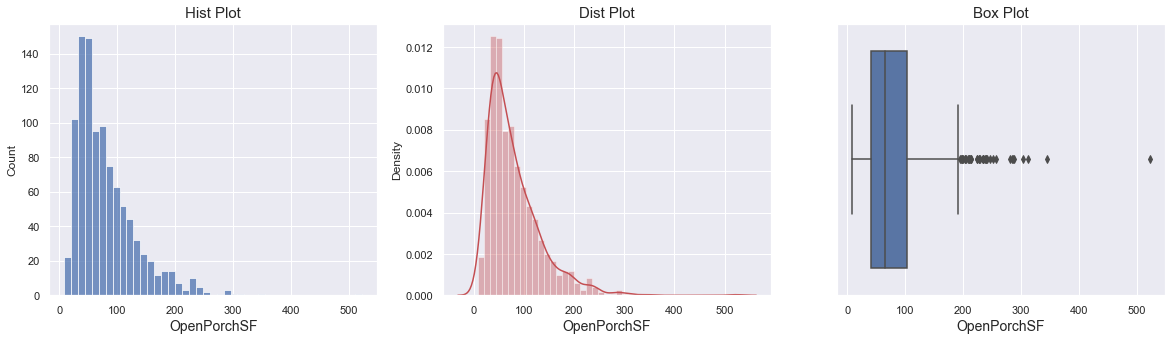

In [4616]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['OpenPorchSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['OpenPorchSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['OpenPorchSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize= 14)
plt.show()

In [4617]:
df=df[df['OpenPorchSF']<170].reset_index(drop=True)

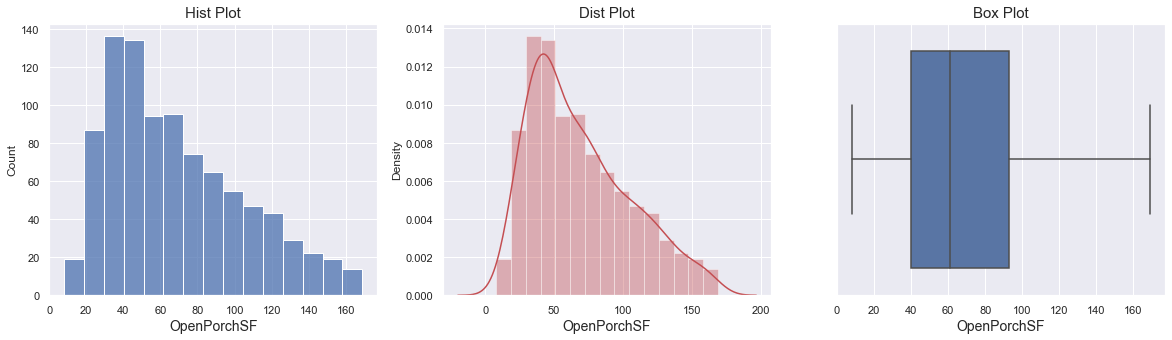

In [4618]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['OpenPorchSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['OpenPorchSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['OpenPorchSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('OpenPorchSF', fontsize= 14)
plt.show()

```Column67: EnclosedPorch: Enclosed porch area in square feet```

In [4619]:
df["EnclosedPorch"].unique() #check the unique values

array([  0, 184, 102, 112,  96, 126, 156, 120, 286, 244,  68,  80, 216,
       137, 234, 272,  44, 116, 105,  24,  70, 114, 280, 100, 148, 294,
       130, 176, 259, 192,  84, 208, 293, 228, 129, 138, 158, 144, 185,
       136, 242, 252,  40, 264, 128,  56, 189, 268, 275, 196, 164, 168,
       180, 150, 230,  81, 212, 239,  64, 115,  36, 254,  77, 236, 240,
       202, 210,  52, 169,  34, 221, 220,  39, 123,  90, 170, 190,  91,
        54, 172,  87,  48, 140,  32, 214,  19, 154, 205, 198,  20,  94,
       160, 183], dtype=int64)

In [4620]:
df["EnclosedPorch"].value_counts()

0      788
112     12
96       5
120      5
156      4
      ... 
123      1
115      1
105      1
100      1
294      1
Name: EnclosedPorch, Length: 93, dtype: int64

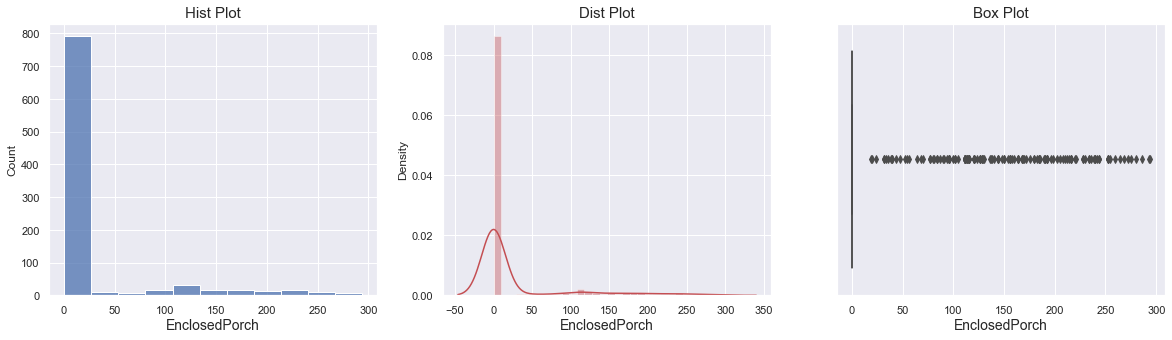

In [4621]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['EnclosedPorch']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('EnclosedPorch', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['EnclosedPorch'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('EnclosedPorch', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['EnclosedPorch']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('EnclosedPorch', fontsize= 14)
plt.show()

In [4622]:
df.drop(columns = 'EnclosedPorch',inplace = True)

```Column68: 3SsnPorch: Three season porch area in square feet```

In [4623]:
df["3SsnPorch"].unique() #check the unique values

array([  0, 245, 196, 140, 180, 168, 144, 216,  23, 508, 320, 407],
      dtype=int64)

In [4624]:
df["3SsnPorch"].value_counts()

0      919
144      2
168      2
180      2
23       1
140      1
196      1
216      1
245      1
320      1
407      1
508      1
Name: 3SsnPorch, dtype: int64

In [4625]:
df.drop(columns = '3SsnPorch',inplace = True)

```Column69: ScreenPorch: Screen porch area in square feet```

In [4626]:
df["ScreenPorch"].unique() #check tyhe unique values

array([  0,  95, 265,  53, 192, 128, 224, 160, 189, 204, 155, 216, 126,
       168, 178, 185, 147, 184, 266, 271, 273,  99, 176, 288, 122,  80,
       120, 144,  63, 156, 165, 161, 143, 252, 190, 100, 200, 259, 154,
       322, 291, 180, 197, 163, 385, 198, 130, 119, 152, 233, 220, 276,
       374,  90, 234], dtype=int64)

In [4627]:
df["ScreenPorch"].value_counts().head()

0      858
120      4
160      3
224      3
192      3
Name: ScreenPorch, dtype: int64

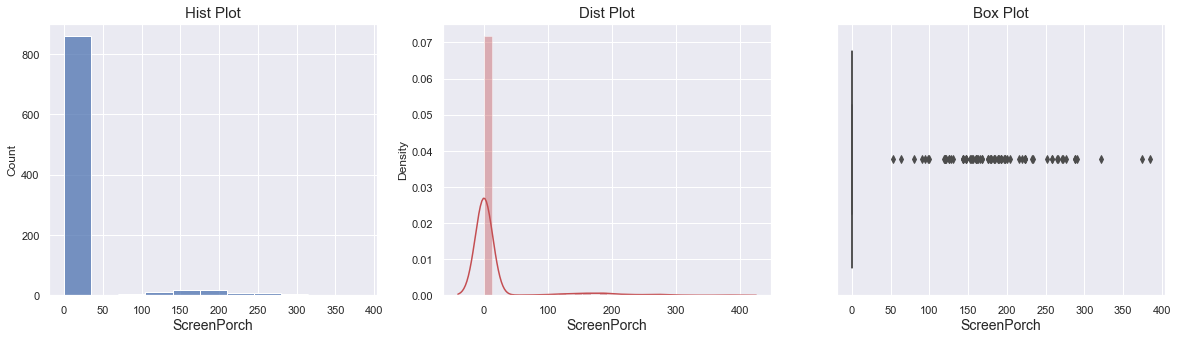

In [4628]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['ScreenPorch']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('ScreenPorch', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['ScreenPorch'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('ScreenPorch', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['ScreenPorch']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('ScreenPorch', fontsize= 14)
plt.show()

In [4629]:
df.drop(columns = 'ScreenPorch',inplace = True)

```Column70: PoolArea: Pool area in square feet```

In [4630]:
df["PoolArea"].unique() #check the unique values

array([  0, 648], dtype=int64)

In [4631]:
df["PoolArea"].value_counts()

0      932
648      1
Name: PoolArea, dtype: int64

In [4632]:
df.drop(columns= 'PoolArea', inplace = True)

```Column71: PoolQC: Pool quality```

* Ex - Excellent
* Gd - Good
* TA - Average/Typical
* Fa - Fair
* NA - No Pool

In [4633]:
df["PoolQC"].unique() #check tyhe unique values

array([nan, 'Fa'], dtype=object)

In [4634]:
df["PoolQC"].value_counts()

Fa    1
Name: PoolQC, dtype: int64

In [4635]:
df.drop(columns = 'PoolQC', inplace = True)

```Column72: Fence: Fence quality```

* GdPrv - Good Privacy
* MnPrv - Minimum Privacy
* GdWo - Good Wood
* MnWw - Minimum Wood/Wire
* NA - No Fence

In [4636]:
df["Fence"].unique() #check tyhe unique values

array([nan, 'GdPrv', 'MnPrv', 'GdWo', 'MnWw'], dtype=object)

In [4637]:
df["Fence"].value_counts()

MnPrv    111
GdWo      38
GdPrv     36
MnWw      10
Name: Fence, dtype: int64

In [4638]:
df["Fence"].isnull().sum()

738

In [4639]:
df["Fence"] = df["Fence"].bfill()

In [4640]:
df["Fence"].isnull().sum()

17

In [4641]:
df["Fence"] = df["Fence"].pad()

In [4642]:
df["Fence"].isnull().sum()

0

In [4643]:
df["Fence"].value_counts()

MnPrv    511
GdWo     186
GdPrv    176
MnWw      60
Name: Fence, dtype: int64

```Column73: MiscFeature: Miscellaneous feature not covered in other categories```

* Elev - Elevator
* Gar2 - 2nd Garage (if not described in garage section)
* Othr - Other
* Shed - Shed (over 100 SF)
* TenC - Tennis Court
* NA - None

In [4644]:
df["MiscFeature"].unique() #check the unique values

array([nan, 'Shed', 'Gar2', 'Othr'], dtype=object)

In [4645]:
df["MiscFeature"].value_counts()

Shed    33
Othr     2
Gar2     1
Name: MiscFeature, dtype: int64

In [4646]:
df["MiscFeature"].isnull().sum()

897

In [4647]:
df["MiscFeature"] = df["MiscFeature"].bfill()

In [4648]:
df["MiscFeature"].isnull().sum()

0

In [4649]:
df["MiscFeature"].value_counts()

Shed    857
Othr     65
Gar2     11
Name: MiscFeature, dtype: int64

```Column74: MiscVal: Value of miscellaneous feature```

In [4650]:
df["MiscVal"].unique() #check the unique values

array([    0,   400,   600,   500,  1200,   480,  1300,  1400,  2000,
         700,   620, 15500,   450,    54,  3500], dtype=int64)

In [4651]:
df["MiscVal"].value_counts()

0        899
400        6
500        6
600        4
700        4
450        3
1200       2
2000       2
54         1
15500      1
1300       1
1400       1
3500       1
480        1
620        1
Name: MiscVal, dtype: int64

In [4652]:
df["MiscVal"].all()

False

In [4653]:
df["MiscVal"] = df["MiscVal"].replace(0, np.nan)

In [4654]:
df["MiscVal"].isnull().sum()

899

In [4655]:
df["MiscVal"] = df["MiscVal"].bfill()

In [4656]:
df["MiscVal"].isnull().sum()

0

In [4657]:
df["MiscVal"].value_counts()

400.0      330
500.0      130
1300.0      96
450.0       80
600.0       69
3500.0      55
700.0       50
2000.0      43
1200.0      24
1400.0      21
54.0        13
15500.0     11
620.0       10
480.0        1
Name: MiscVal, dtype: int64

```Column75: MoSold: Month Sold (MM)```

In [4658]:
df["MoSold"].unique() #check the unique values

array([ 6, 11,  5,  1,  4, 10,  8,  2,  3,  9, 12,  7], dtype=int64)

In [4659]:
df["MoSold"].value_counts()

6     155
5     148
7     148
4      99
8      76
3      66
10     57
11     44
9      39
12     38
2      32
1      31
Name: MoSold, dtype: int64

```Column76: YrSold: Year Sold (YYYY)```

In [4660]:
df["YrSold"].unique() #check the unique values

array([2007, 2006, 2010, 2008, 2009], dtype=int64)

In [4661]:
df["YrSold"].value_counts()

2009    221
2007    211
2006    195
2008    192
2010    114
Name: YrSold, dtype: int64

```Column77: SaleType: Type of sale```

* WD - Warranty Deed - Conventional
* CWD - Warranty Deed - Cash
* VWD - Warranty Deed - VA Loan
* New - Home just constructed and sold
* COD - Court Officer Deed/Estate
* Con - Contract 15% Down payment regular terms
* ConLw - Contract Low Down payment and low interest
* ConLI - Contract Low Interest
* ConLD - Contract Low Down
* Oth - Other

In [4662]:
df["SaleType"].unique() #check tyhe unique values

array(['WD', 'New', 'COD', 'ConLI', 'Con', 'ConLw', 'Oth', 'ConLD', 'CWD'],
      dtype=object)

In [4663]:
df["SaleType"].value_counts()

WD       830
New       59
COD       28
ConLD      5
CWD        3
ConLI      3
ConLw      2
Oth        2
Con        1
Name: SaleType, dtype: int64

```Column78: SaleCondition: Condition of sale```

* Normal - Normal Sale
* Abnorml - Abnormal Sale -  trade, foreclosure, short sale
* AdjLand - Adjoining Land Purchase
* Alloca - Allocation - two linked properties with separate deeds, typically condo with a garage unit	
* Family - Sale between family members
* Partial - Home was not completed when last assessed (associated with New Homes)

In [4664]:
df["SaleCondition"].unique() #check tyhe unique values

array(['Normal', 'Partial', 'Abnorml', 'Family', 'AdjLand', 'Alloca'],
      dtype=object)

In [4665]:
df["SaleCondition"].value_counts()

Normal     782
Abnorml     68
Partial     60
Family      11
Alloca       8
AdjLand      4
Name: SaleCondition, dtype: int64

```Column79: MasVnrArea: Masonry veneer area in square feet```

In [4666]:
df['MasVnrArea'].unique()

array([0.000e+00, 1.800e+02, 6.700e+01, 2.230e+02, 8.200e+01, 1.720e+02,
       4.120e+02, 1.890e+02, 5.000e+01, 2.200e+02, 1.600e+01, 2.810e+02,
       3.400e+02, 2.160e+02, 1.400e+02, 1.830e+02, 3.360e+02, 8.500e+01,
             nan, 1.620e+02, 1.540e+02, 1.760e+02, 1.200e+02, 1.080e+02,
       2.520e+02, 1.300e+02, 3.510e+02, 1.740e+02, 3.200e+02, 5.300e+01,
       2.040e+02, 8.000e+01, 4.720e+02, 2.370e+02, 1.130e+02, 1.600e+02,
       1.470e+02, 1.360e+02, 8.900e+01, 4.150e+02, 2.000e+02, 2.860e+02,
       4.500e+01, 2.470e+02, 9.800e+01, 2.700e+01, 1.530e+02, 2.060e+02,
       2.990e+02, 2.330e+02, 6.800e+01, 2.100e+02, 9.600e+01, 1.560e+02,
       3.500e+02, 7.400e+01, 1.860e+02, 4.100e+01, 6.500e+01, 1.440e+02,
       8.400e+01, 2.120e+02, 2.600e+02, 5.670e+02, 1.940e+02, 1.250e+02,
       1.800e+01, 2.050e+02, 3.090e+02, 7.200e+01, 1.450e+02, 7.880e+02,
       2.720e+02, 2.560e+02, 4.400e+01, 1.680e+02, 2.880e+02, 2.800e+01,
       9.900e+01, 2.240e+02, 1.040e+02, 6.000e+02, 

In [4667]:
df['MasVnrArea'].all()

False

In [4668]:
df['MasVnrArea'].isnull().sum()

5

In [4669]:
df['MasVnrArea'].value_counts()

0.0      571
108.0      8
106.0      6
16.0       6
120.0      6
        ... 
65.0       1
76.0       1
189.0      1
158.0      1
894.0      1
Name: MasVnrArea, Length: 209, dtype: int64

In [4670]:
df['MasVnrArea'] = df['MasVnrArea'].replace(0, np.nan)

In [4671]:
df['MasVnrArea'].isnull().sum()

576

In [4672]:
df['MasVnrArea'] = df['MasVnrArea'].interpolate()

In [4673]:
df['MasVnrArea'].isnull().sum()

2

In [4674]:
df['MasVnrArea'] = df['MasVnrArea'].bfill()

In [4675]:
df['MasVnrArea'].isnull().sum()

0

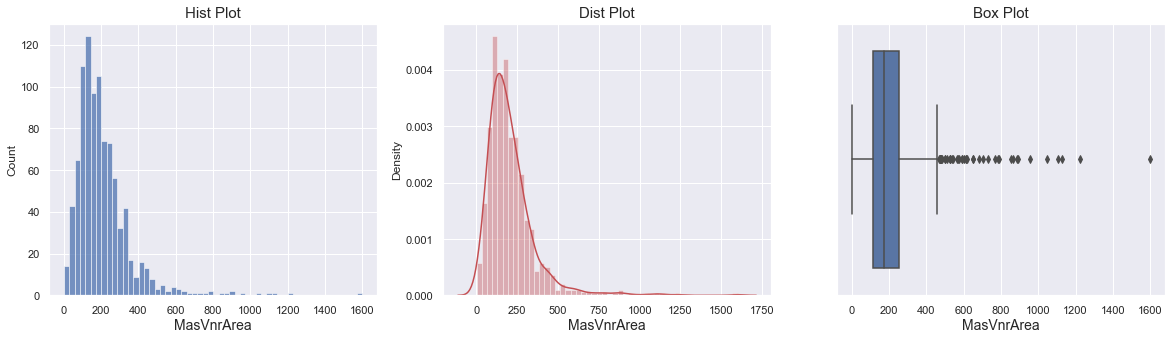

In [4676]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MasVnrArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('MasVnrArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MasVnrArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('MasVnrArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['MasVnrArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('MasVnrArea', fontsize= 14)
plt.show()

In [4677]:
df=df[df['MasVnrArea']<420].reset_index(drop=True)

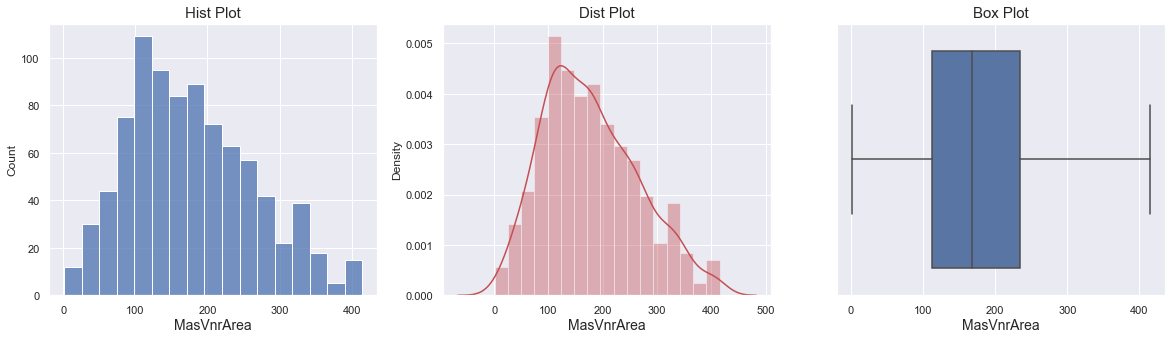

In [4678]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['MasVnrArea']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('MasVnrArea', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['MasVnrArea'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('MasVnrArea', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['MasVnrArea']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('MasVnrArea', fontsize= 14)
plt.show()

```Column80: BsmtUnfSF: Unfinished square feet of basement area```

In [4679]:
df['BsmtUnfSF'].unique()

array([ 255,  879,   90,  284,  420,  390,  780,  458,  816,  602,  278,
        508,  112,  389, 1296,  651,  360,    0,  253, 1090,  115,  742,
        551,  970,  270,  982,  172,  363,  132, 1777,   76,  666,   95,
        108,  386,  292,  354, 1194,  798, 1496,   30,  276,  417,  660,
        604,  312,  195,  155,  960,  728,  650, 1099,  440,  247,  413,
        813,  298,  448,  434,  168,  432,  314,  462, 1530,  250,  409,
       1290,  104,  756,  400,   99, 1074,  221,  858,  319,  844,  999,
        342, 1550,  712,  536,  884,  628, 1128,  540,  506,  163,  864,
       1319,  726,  264,  721,  398,  252,  180,  151,  701,  572,  765,
        849,  340,  414,  230,  380,  796,  622,  920,  148, 1428,  208,
        266,  184,  161,  177,  286,  468,  866,  577,  724, 1020,  396,
        100,  785,  522, 1008,  134,  135,  832,  882,  239,  244, 1670,
        299,  624,  567,  896,  768,  846,  430,  210,  594,  416,  927,
        427,  370,  546,  173,  606, 1390,  114,  5

In [4680]:
df['BsmtUnfSF'].all()

False

In [4681]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].replace(0,np.nan)

In [4682]:
df['BsmtUnfSF'].isnull().sum()

75

In [4683]:
df['BsmtUnfSF'] = df['BsmtUnfSF'].interpolate()

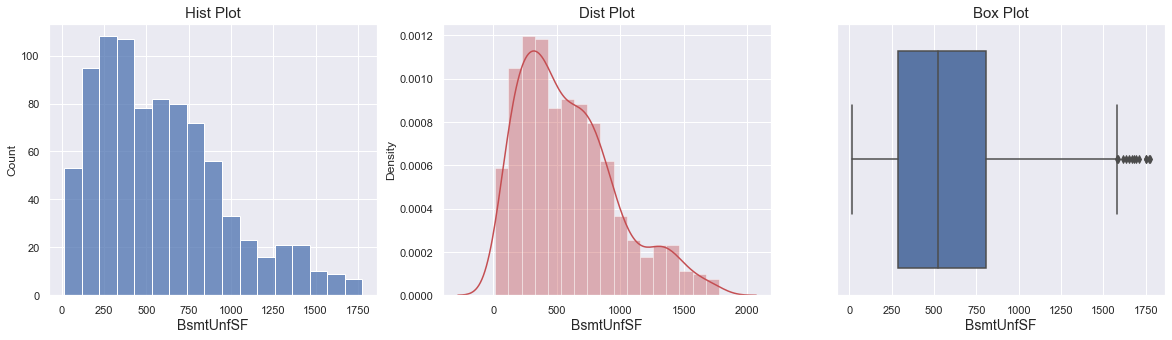

In [4684]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BsmtUnfSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('BsmtUnfSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BsmtUnfSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('BsmtUnfSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['BsmtUnfSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('BsmtUnfSF', fontsize= 14)
plt.show()

In [4685]:
df=df[df['BsmtUnfSF']<1550].reset_index(drop=True)

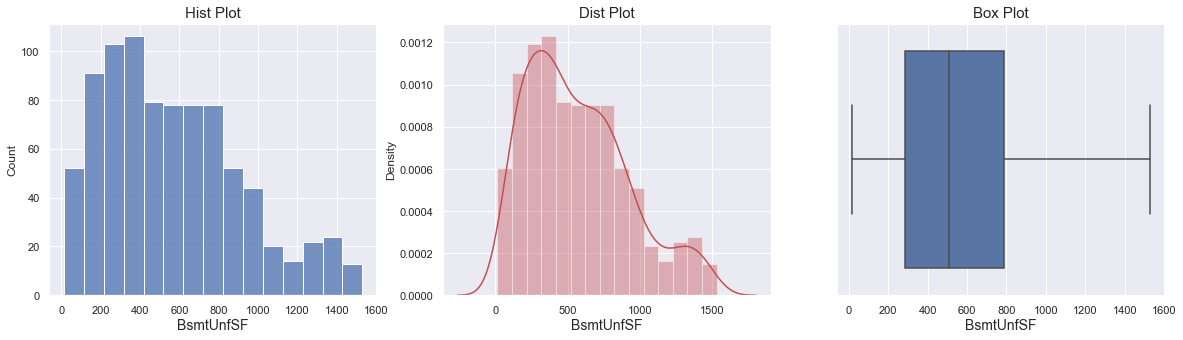

In [4686]:
#visualization
plt.figure(figsize=(20,5))
plt.subplot(1,3,1)
sns.histplot(df['BsmtUnfSF']) #visualize the outliers by using histplot
plt.title('Hist Plot', fontsize=15)
plt.xlabel('BsmtUnfSF', fontsize= 14)

plt.subplot(1,3,2)
sns.distplot(df['BsmtUnfSF'], color='r') #visualize the normalization curve by using distplot
plt.title('Dist Plot', fontsize=15)
plt.xlabel('BsmtUnfSF', fontsize= 14)

plt.subplot(1,3,3)
sns.boxplot(df['BsmtUnfSF']) #visualize the outliers by using boxplot
plt.title('Box Plot', fontsize=15)
plt.xlabel('BsmtUnfSF', fontsize= 14)
plt.show()

```Label : SalePrice```

In [4687]:
df1['SalePrice'].unique()

array([128000, 268000, 269790, 190000, 215000, 219210, 121500, 155000,
       140000, 118500, 119500, 237000, 201000, 126500, 135500, 165000,
       120500, 194500, 148000, 106000, 231500, 133000, 142125, 136500,
       146000, 217000, 112000, 394432, 113000, 188700, 319900, 135000,
       128500, 169000, 122000, 152000, 243000, 156000,  79500, 132000,
       144152, 130000, 149900, 124500, 179000, 147000,  39300, 312500,
       256000,  60000, 153000,  84900, 230000, 180000, 106500, 239000,
       107500, 123000, 176000, 228500, 117500, 350000, 200624, 173000,
       225000,  84500, 174900,  79000, 297000,  87000, 465000, 204900,
       127000, 159000, 170000, 159500, 102000, 109500, 163990, 189950,
       119000, 157500, 287000, 144000, 286000, 172000, 212000, 124000,
       150000, 205950, 251000, 129000, 223500, 475000, 335000, 115000,
       205000, 209500, 176432, 171000, 302000, 259500, 141000, 187500,
       385000, 275000, 108000,  89500, 109900, 185000, 143000, 127500,
      

In [4688]:
df1['SalePrice'].all()

True

In [4689]:
df1['SalePrice'].isnull().sum()

0

In [4690]:
#Actual shape of the dataset now
print("The actual shape of the dataset are: {0}".format(df.shape))

The actual shape of the dataset are: (854, 71)


```Using Label Encoding to handle categorical variables```

In [4691]:
#Initiate Label Encoder
lab_ene = LabelEncoder()

In [4692]:
#Using for loop to iterate all categorical columns
df_col=list(df.columns)

for i in range(len(df_col)):
    df[df_col[i]] = LabelEncoder().fit_transform(df[df_col[i]])

In [4693]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 71 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Id             854 non-null    int64
 1   MSSubClass     854 non-null    int64
 2   MSZoning       854 non-null    int32
 3   LotFrontage    854 non-null    int64
 4   LotArea        854 non-null    int64
 5   Alley          854 non-null    int32
 6   LotShape       854 non-null    int32
 7   LandContour    854 non-null    int32
 8   LotConfig      854 non-null    int32
 9   LandSlope      854 non-null    int32
 10  Neighborhood   854 non-null    int32
 11  Condition1     854 non-null    int32
 12  BldgType       854 non-null    int32
 13  HouseStyle     854 non-null    int32
 14  OverallQual    854 non-null    int64
 15  OverallCond    854 non-null    int64
 16  YearBuilt      854 non-null    int64
 17  YearRemodAdd   854 non-null    int64
 18  RoofStyle      854 non-null    int32
 19  Exterior

By using ```Label Encoder``` we can successfully convert all categorical features into integer form and by using ```df.info() Method``` we can check that all columns are converted or not.

In [4694]:
#Actual shape of the dataset now
print("The actual shape of the dataset are: {0}".format(df.shape))

The actual shape of the dataset are: (854, 71)


In [4695]:
#shuffle
df = df.sample(df.shape[0])

In [4696]:
#split train dataset and test dataset
df_test = df[700:]
time.sleep(1)
df_train = df[154:]

In [4697]:
#Trained dataset shape
print("The actual shape of the Trained dataset are: {0}".format(df_train.shape))

The actual shape of the Trained dataset are: (700, 71)


In [4698]:
#Test dataset shape
print("The actual shape of the Test dataset are: {0}".format(df_test.shape))

The actual shape of the Test dataset are: (154, 71)


```We need to split the dataset into two parts train and test, which we have merged at the beginning, first we merge both datasets and clean them, and now we split it into two parts ( alomost 75% trained dataset and 25% test dataset) to make our model, first we need to save our clean datasets. then we are heading towards Feature selection techniques, test dataset is useful for us for predictions```

In [4699]:
#store clean file to csv
df_train.to_csv('cleaned_home_price_prediction_trained.csv')
time.sleep(1)
df_test.to_csv('cleaned_home_price_prediction_test.csv')

```Feature Selection and multicolinearity```

correlation between the Features and with label:-----> (71, 71)

 **************************************************


<function matplotlib.pyplot.show(close=None, block=None)>

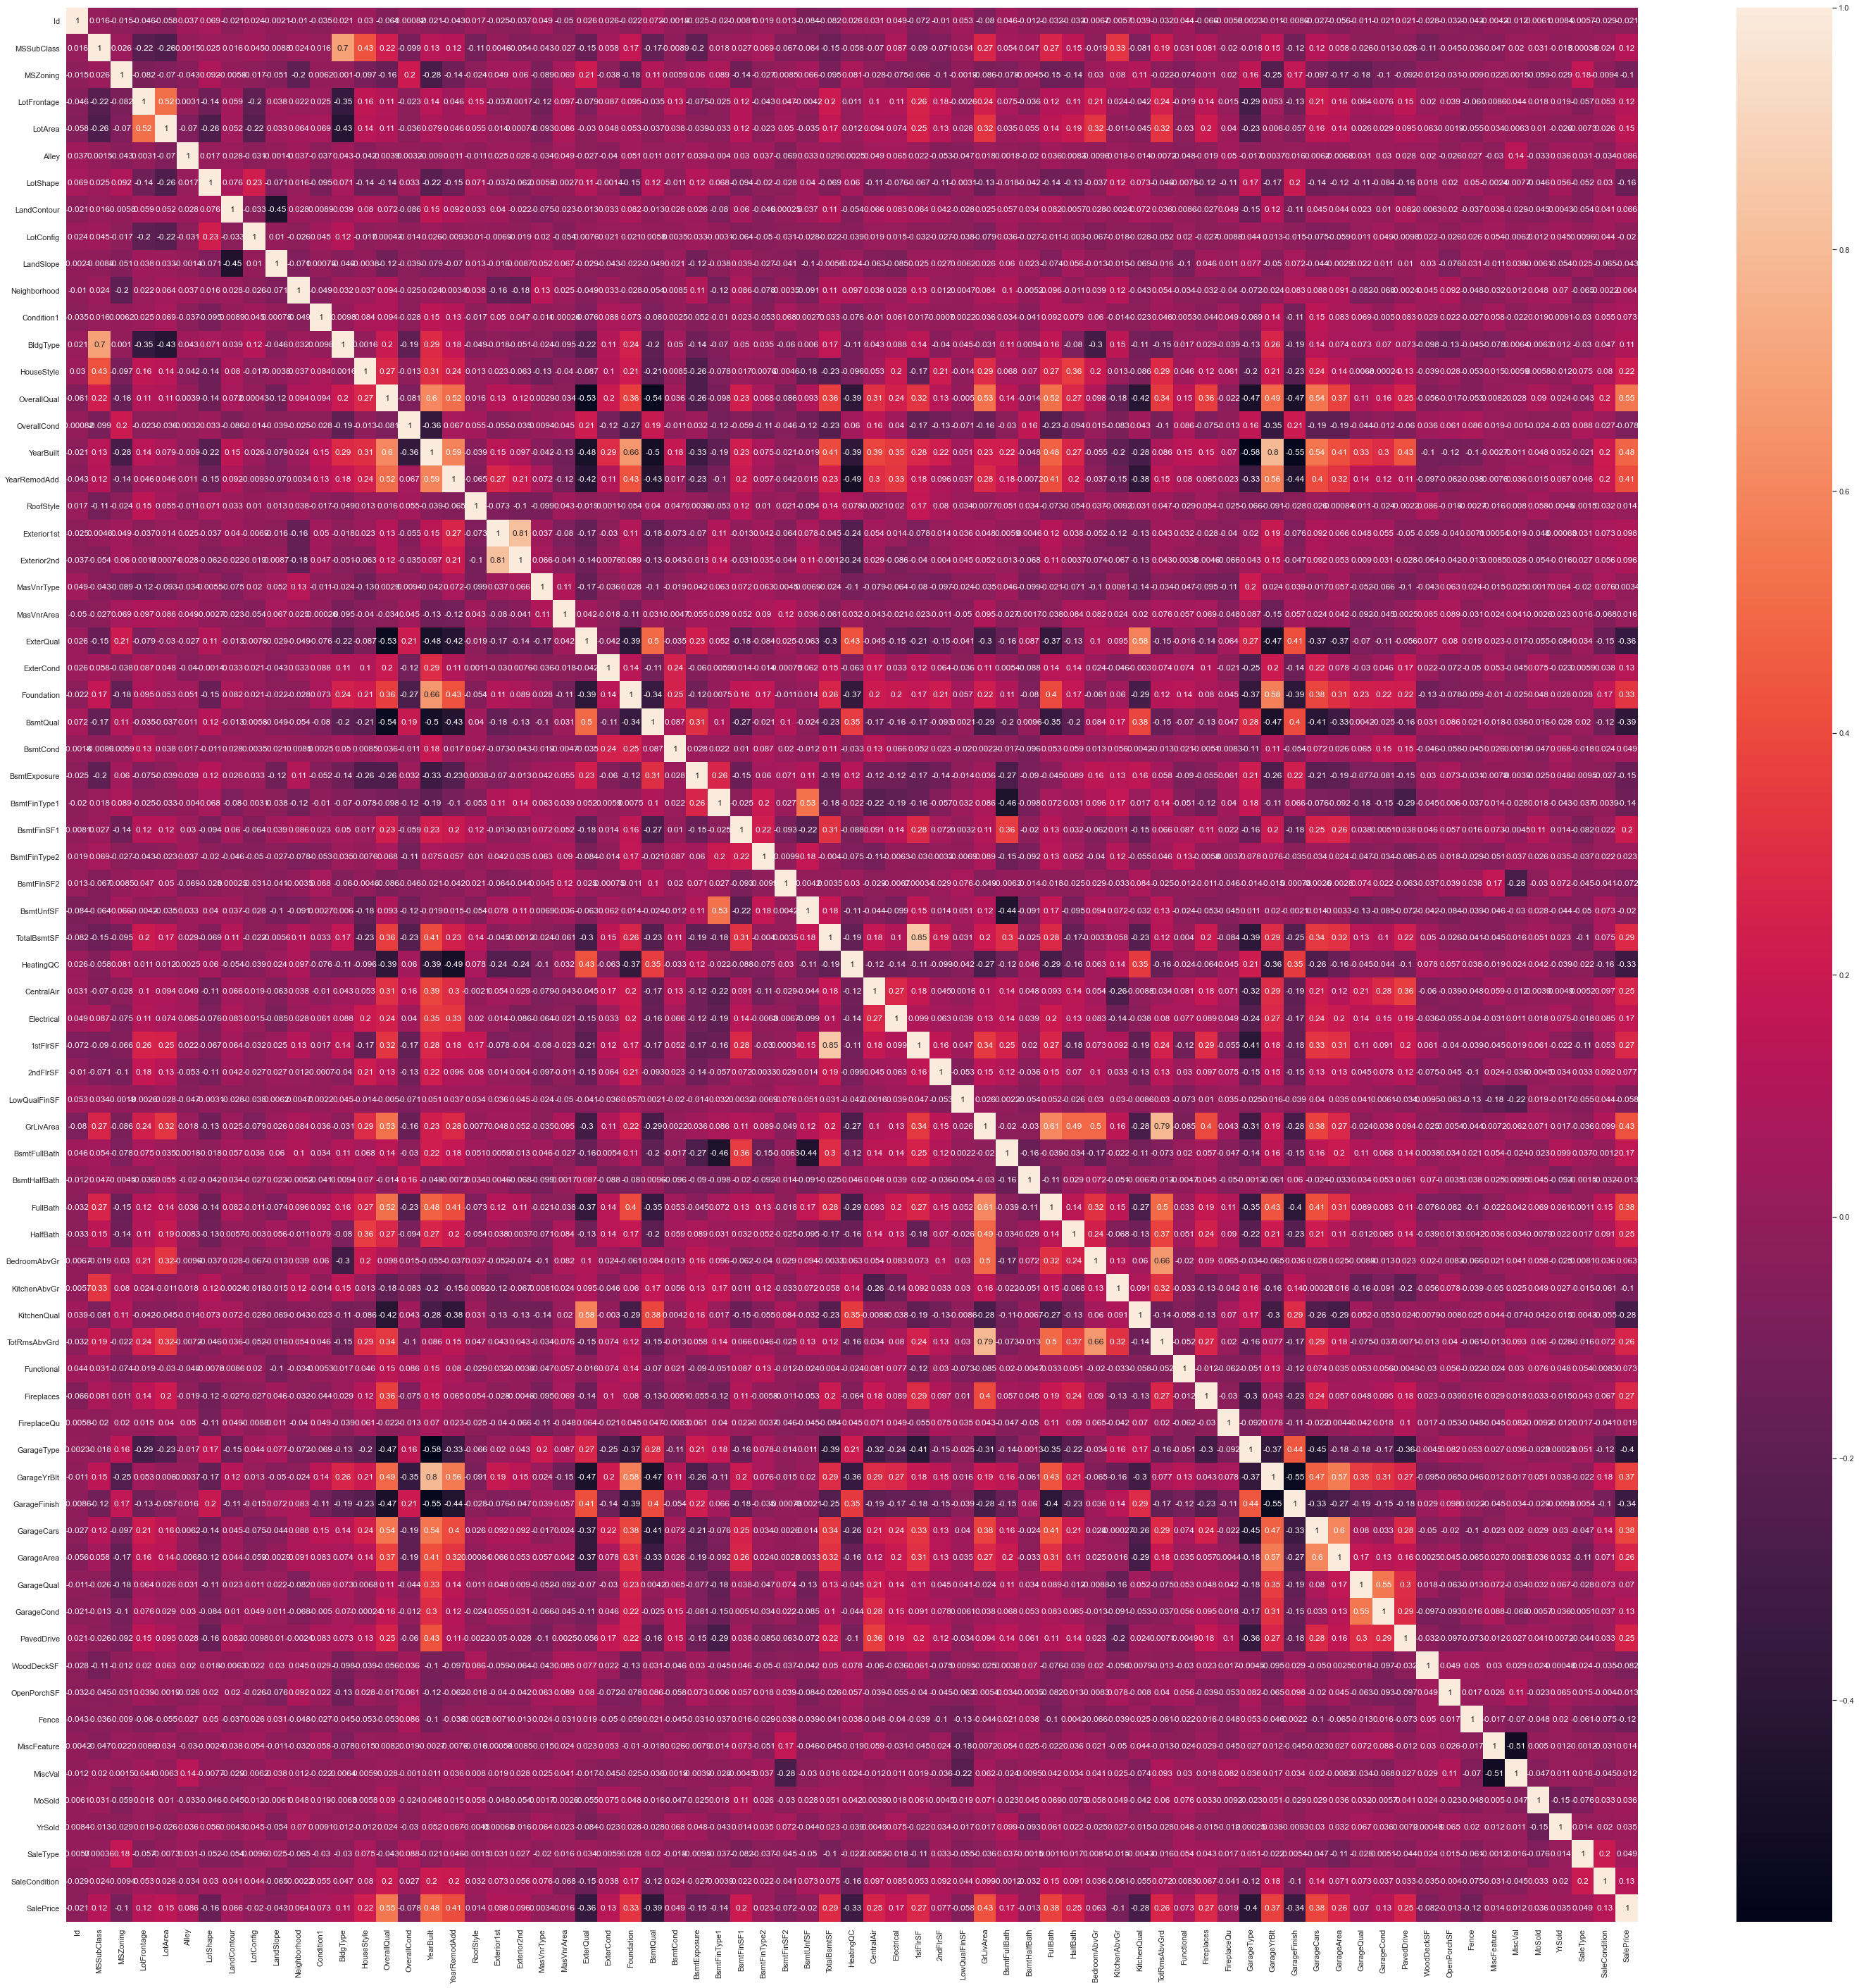

In [4700]:
# analyize the correlation
corr = df_train.corr()
print('correlation between the Features and with label:----->',corr.shape)
print("\n",'*'*50)
# Visualize the corrrelation by using heatmap
plt.figure(figsize=(50,50))
sns.heatmap(corr, annot=True)
plt.show

In [4701]:
#split x and y
x = df_train.drop(['SalePrice'], axis=1)
y=df_train.SalePrice

In [4702]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[-1.39006525, -1.01425051, -0.05409688, ..., -0.66848547,
         0.28032214,  0.24313801],
       [-0.20895386, -1.01425051, -0.05409688, ...,  1.5957395 ,
         0.28032214,  0.24313801],
       [-0.55681543, -1.01425051, -0.05409688, ...,  0.84099785,
         0.28032214,  0.24313801],
       ...,
       [ 1.36046812, -1.01425051, -0.05409688, ...,  0.84099785,
         0.28032214,  0.24313801],
       [-1.7055676 ,  0.46640717, -0.05409688, ..., -1.42322712,
         0.28032214, -3.39743108],
       [-1.21613446, -1.01425051,  1.52372878, ...,  1.5957395 ,
         0.28032214,  0.24313801]])

In [4703]:
# Check the multicollinearity between the features
#import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["vif"]= [ variance_inflation_factor(x_scaled, i)
               for i in range ( x_scaled.shape[1])]
vif['features']= x.columns
 #no multicollinearity between the features

In [4704]:
vif.head(40)

vif      features
0   1.086500            Id
1   6.854072    MSSubClass
2   1.371803      MSZoning
3   1.808990   LotFrontage
4   1.954550       LotArea
5   1.115148         Alley
6   1.310455      LotShape
7   1.448089   LandContour
8   1.182315     LotConfig
9   1.484946     LandSlope
10  1.327997  Neighborhood
11  1.127533    Condition1
12  5.656247      BldgType
13  2.881852    HouseStyle
14  3.563505   OverallQual
15  2.152791   OverallCond
16  8.966535     YearBuilt
17  2.755735  YearRemodAdd
18  1.198083     RoofStyle
19  3.498813   Exterior1st
20  3.515389   Exterior2nd
21  1.311016    MasVnrType
22  1.231890    MasVnrArea
23  2.470052     ExterQual
24  1.321697     ExterCond
25  2.423236    Foundation
26  2.079141      BsmtQual
27  1.317312      BsmtCond
28  1.792297  BsmtExposure
29  2.262459  BsmtFinType1
30  1.881114    BsmtFinSF1
31  1.383368  BsmtFinType2
32  1.233023    BsmtFinSF2
33  2.414697     BsmtUnfSF
34  6.134078   TotalBsmtSF
35  1.736815     HeatingQC
36  1.721873    CentralAir
37  1.382410    Electrical
38  6.398845      1stFlrSF
39  1.344971      2ndFlrSF

In [4705]:
df_train.drop(columns="YearBuilt", inplace = True)
time.sleep(1)
df_train.drop(columns="GrLivArea", inplace = True)
time.sleep(1)
df_train.drop(columns="MSSubClass", inplace = True)
time.sleep(1)
df_train.drop(columns="BldgType", inplace = True)
time.sleep(1)
df_train.drop(columns="TotalBsmtSF", inplace = True)
time.sleep(1)
df_train.drop(columns="1stFlrSF", inplace = True)

In [4706]:
df_train.shape   

(700, 65)

In [4707]:
#split x and y
x = df_train.drop(['SalePrice'], axis=1)
y=df_train.SalePrice

In [4708]:
#scale the value x
Scaler = StandardScaler()
x_scaled = Scaler.fit_transform(x)
x_scaled

array([[-1.39006525, -0.05409688,  0.54156358, ..., -0.66848547,
         0.28032214,  0.24313801],
       [-0.20895386, -0.05409688,  1.32062018, ...,  1.5957395 ,
         0.28032214,  0.24313801],
       [-0.55681543, -0.05409688,  0.87544498, ...,  0.84099785,
         0.28032214,  0.24313801],
       ...,
       [ 1.36046812, -0.05409688, -0.07055232, ...,  0.84099785,
         0.28032214,  0.24313801],
       [-1.7055676 , -0.05409688, -0.54355097, ..., -1.42322712,
         0.28032214, -3.39743108],
       [-1.21613446,  1.52372878,  0.93109188, ...,  1.5957395 ,
         0.28032214,  0.24313801]])

In [4709]:
#split data into train and test.
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y,test_size = 0.25, random_state=40)

In [4710]:
y_train.head()

49     369
18     211
734    384
544    284
598    178
Name: SalePrice, dtype: int64

```Check the Accuracy by using 5 models```

In [4711]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor #import library
from sklearn import metrics
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor

In [4712]:
#Model instantiating and training
lr = LinearRegression()
dtr=DecisionTreeRegressor()
rfo = RandomForestRegressor()
svr = SVR()
knn = KNeighborsRegressor()

In [4713]:
#train all the models
print('Linear Regression:----->',lr.fit(x_train, y_train))
time.sleep(2)
print('Decsion Tree:------->',dtr.fit(x_train, y_train))
time.sleep(2)
print('Random Forest:-------->',rfo.fit(x_train, y_train))
time.sleep(2)
print('Support vector machine:-------->',svr.fit(x_train, y_train))
time.sleep(2)
print('KNeighborsRegressor:-------->',knn.fit(x_train, y_train))

Linear Regression:-----> LinearRegression()
Decsion Tree:-------> DecisionTreeRegressor()
Random Forest:--------> RandomForestRegressor()
Support vector machine:--------> SVR()
KNeighborsRegressor:--------> KNeighborsRegressor()


In [4714]:
#Check How much our model learn
print('Linear regression Score:-------->', lr.score(x_train, y_train))
time.sleep(2)
print('Decision Tree score:------->', dtr.score(x_train,y_train))
time.sleep(2)
print('Random Forest score:------>',rfo.score(x_train, y_train))
time.sleep(2)
print('Support vector machine score:------>',svr.score(x_train, y_train))
time.sleep(2)
print('KNeighborsRegressor score:------>',knn.score(x_train, y_train))

Linear regression Score:--------> 0.47868732306128203
Decision Tree score:-------> 1.0
Random Forest score:------> 0.9108651151117151
Support vector machine score:------> 0.1099025466101915
KNeighborsRegressor score:------> 0.5528915855417598


In [4715]:
#Let's check how well model fits the test data
print('Linear regression Score:-------->', lr.score(x_test, y_test))
time.sleep(2)
print('Decision Tree score:------->', dtr.score(x_test,y_test))
time.sleep(2)
print('Random Forest score:------>',rfo.score(x_test, y_test))
time.sleep(2)
print('Support vector machine score:------>',svr.score(x_test, y_test))
time.sleep(2)
print('KNeighborsRegressor score:------>',knn.score(x_test, y_test))

Linear regression Score:--------> 0.20137856146574462
Decision Tree score:-------> -0.2686957355691497
Random Forest score:------> 0.3292667261780382
Support vector machine score:------> 0.05740051966373427
KNeighborsRegressor score:------> 0.19951221879896852


In [4716]:
y_pred_lr = lr.predict(x_test)#save the predictions in some variables
y_pred_dtr = dtr.predict(x_test)
y_pred_rfo = rfo.predict(x_test)
y_pred_svr = svr.predict(x_test)
y_pred_knn = knn.predict(x_test)

In [4717]:
#Check the mean of all models cv score one by one
print("Linear regression CV Score:")
print(cross_val_score(lr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Decision Tree CV Score:")
print(cross_val_score(dtr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Random Forest CV Score:")
print(cross_val_score(rfo,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("KNeighbour Classifier CV Score:")
print(cross_val_score(knn,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)

print("Support Vector Machine CV Score:")
print(cross_val_score(svr,x_scaled,y,cv=5).mean())

Linear regression CV Score:
0.28395103938702093

 **************************************************
Decision Tree CV Score:
-0.15392085549825926

 **************************************************
Random Forest CV Score:
0.3702549012537496

 **************************************************
KNeighbour Classifier CV Score:
0.24397558797806376

 **************************************************
Support Vector Machine CV Score:
0.08665872221522938


Linear Regression:


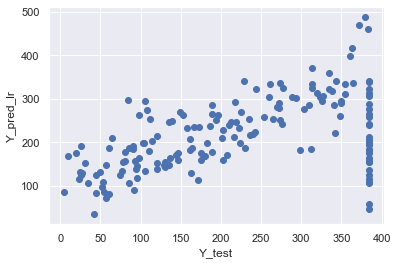

Decision Tree:


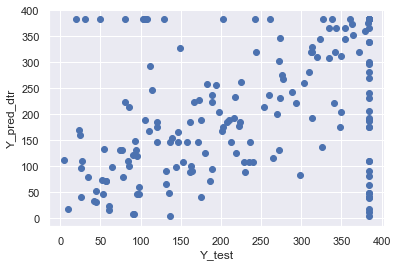

Random Forest:


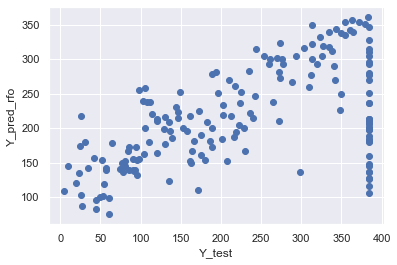

In [4718]:
#plot the actual and predicted value
print("Linear Regression:")
plt.scatter(y_test,y_pred_lr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_lr')
plt.show()
time.sleep(2)
print("Decision Tree:")
plt.scatter(y_test,y_pred_dtr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_dtr')
plt.show()
time.sleep(2)
print("Random Forest:")
plt.scatter(y_test,y_pred_rfo)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_rfo')
plt.show()
time.sleep(2)

In [4719]:
#calculate Mean absolute error
print("Linear Regression:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_lr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_lr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_lr)))#calculate root mean square error

time.sleep(2)

print("Decision Tree:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_dtr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_dtr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_dtr)))#calculate root mean square error

time.sleep(2)

print("Random Forest:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_rfo))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_rfo))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_rfo)))#calculate root mean square error

Linear Regression:
MAE:---------> 82.75707231500219
MSE:-----------> 12111.975767362692
RSME:---------> 110.05442184375279
Decision Tree:
MAE:---------> 95.78857142857143
MSE:-----------> 19241.17142857143
RSME:---------> 138.7125496433954
Random Forest:
MAE:---------> 76.73034285714286
MSE:-----------> 10172.410565142858
RSME:---------> 100.85836884038358


We see here, ```Support vector regressor``` and ```KNN Regressor``` is giving us poor accuarcy, so, we can easily drop both them. If we see ```Linear Regressor```, ```Decision Tree Regressor``` and ```Random Forest Regressor```. all the three are giving us best training score and they giving us good accuarcy perhaps there is some overfitting exist that we will try to remove further. if we see, ```MAE, MSE, RSME``` score of all three models, than we can conclude here that ```Random Forest Regressor``` is giving us less error than other two

```Lasso regression```

In [4720]:
#import Ridge, Lasso, RidgeCV, LassoCV
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV

In [4721]:
#to find best alpha
lassocv= LassoCV(alphas=None, max_iter = 1000, normalize = True)

#train the model
print(lassocv.fit(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
#best alpha parameter
alpha = lassocv.alpha_
print("Alpha value is:----->",alpha)
time.sleep(1)
print()
lasso_reg = Lasso(alpha) #fit the data
time.sleep(1)
print('*'*50)
time.sleep(1)
print(lasso_reg.fit(x_train,y_train)) #train the data
time.sleep(1)
print()
print('*'*50)
time.sleep(1)
print("Accuracy of the model is:---->", lasso_reg.score(x_test,y_test)) #get the score of test data

LassoCV(normalize=True)

**************************************************
Alpha value is:-----> 0.20676578177565183

**************************************************
Lasso(alpha=0.20676578177565183)

**************************************************
Accuracy of the model is:----> 0.20693847467225812


```Ridge Regression```

In [4722]:
ridgecv= RidgeCV(alphas=np.arange(0.001,0.1,0.01), normalize = True)
#train the data
print(ridgecv.fit(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
#best alpha parameter
print("Alpha value is:----->",ridgecv.alpha_)
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
#fit the data
ridge_model = Ridge(alpha = ridgecv.alpha_)
print(ridge_model.fit(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
print("Accuracy of the model is:----->",ridge_model.score(x_test,y_test)) #get the score

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

**************************************************
Alpha value is:-----> 0.09099999999999998

**************************************************
Ridge(alpha=0.09099999999999998)

**************************************************
Accuracy of the model is:-----> 0.20143548309117432


```Gridsearchcv by using Random Forest Regressor as a estimator```

In [4723]:
params = {'n_estimators':[10,20,30],
         'max_features':['auto',"sqrt","log2"],
         'min_samples_split':[10,11]}
gridsearch = GridSearchCV(estimator=rfo, param_grid= params)#apply GridSearchCV
time.sleep(2)
print(gridsearch.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('GridSearchCV best parameters:----->',gridsearch.best_params_) #get best parameters
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
#put best params
rfc = gridsearch.best_estimator_
print('Trained Model using best parameters:----->',rfc.fit(x_train,y_train)) #train the model
time.sleep(1)
print("\n",'*'*50)
time.sleep(1)
print('Accuracy score:------>',rfc.score(x_train,y_train))#check the accuracy score

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [10, 11],
                         'n_estimators': [10, 20, 30]})

 **************************************************
GridSearchCV best parameters:-----> {'max_features': 'sqrt', 'min_samples_split': 11, 'n_estimators': 20}

 **************************************************
Trained Model using best parameters:-----> RandomForestRegressor(max_features='sqrt', min_samples_split=11,
                      n_estimators=20)

 **************************************************
Accuracy score:------> 0.7568975786697465


```Using Ensembling Technique ```

Adaboost Regressor:--------> AdaBoostRegressor()

**************************************************
Adaboost Regressor Training Score:--------> 0.5698564045920229

**************************************************
Adaboost Regressor Testing Score:--------> 0.3220811507881942

 **************************************************
Ada Boost CV Score:
[0.3605392  0.29636807 0.2974772  0.40193098 0.33081137]

 **************************************************
Ada Boost CV Score:
0.3281360970210375

 **************************************************
Ada Booster:


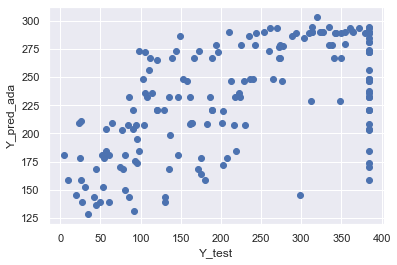

In [4724]:
ada = AdaBoostRegressor()
time.sleep(2)
print('Adaboost Regressor:-------->',ada.fit(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
print('Adaboost Regressor Training Score:-------->',ada.score(x_train,y_train))
print()
time.sleep(1)
print('*'*50)
time.sleep(1)
print('Adaboost Regressor Testing Score:-------->',ada.score(x_test,y_test))
time.sleep(2)
y_pred_ada = ada.predict(x_test)

time.sleep(2)
print("\n",'*'*50)

print("Ada Boost CV Score:")
print(cross_val_score(ada,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("Ada Boost CV Score:")
print(cross_val_score(ada,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)
print("Ada Booster:")
plt.scatter(y_test,y_pred_ada)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_ada')
plt.show()

In [4725]:
print("Ada Booster:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_ada))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_ada))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_ada)))#calculate root mean square error

Ada Booster:
MAE:---------> 85.93792247784104
MSE:-----------> 10281.387748570442
RSME:---------> 101.3971782081259


```XGBoost Regressor```

XGBoost Training score:------> XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.300000012,
             max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=100, n_jobs=8,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)
**************************************************
XGBoost Testing Score:-------> 0.5051066443034442

 **************************************************
XGBoost CV Score:
[0.58330763 0.39464063 0.46033469 0.60613183 0.47412683]

 **************************************************
XGBoost CV Score:
0.5037083216046441

 *******************

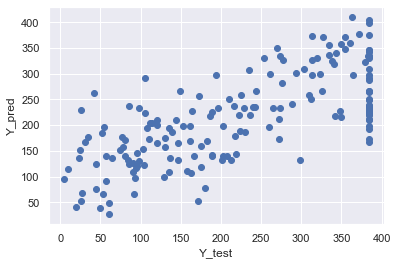

In [4726]:
xgbr = xgb.XGBRegressor()
time.sleep(1)
print("XGBoost Training score:------>",xgbr.fit(x_train,y_train))
time.sleep(1)
print('*'*50)
time.sleep(1)
y_pred = xgbr.predict(x_test)
print("XGBoost Testing Score:------->", r2_score(y_test, y_pred))

time.sleep(2)
print("\n",'*'*50)

print("XGBoost CV Score:")
print(cross_val_score(xgbr,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("XGBoost CV Score:")
print(cross_val_score(xgbr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)
print("XGBooster:")
plt.scatter(y_test,y_pred)
plt.xlabel('Y_test')
plt.ylabel('Y_pred')
plt.show()

In [4727]:
print("XGBoost:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred)))#calculate root mean square error

XGBoost:
MAE:---------> 68.13277174813406
MSE:-----------> 7505.604085243177
RSME:---------> 86.63488953789447


```GradientBoostingRegressor```

GradientBoostingRegressor Training Score:-----> GradientBoostingRegressor(learning_rate=0.4, n_estimators=6)
**************************************************
GradientBoostingRegressor Testing score:------> 0.23891969389791579

 **************************************************
GBR CV Score:
[0.49807001 0.36411379 0.38212903 0.54282093 0.35631056]

 **************************************************
GBR CV Score:
0.432543864995196

 **************************************************
GBR:


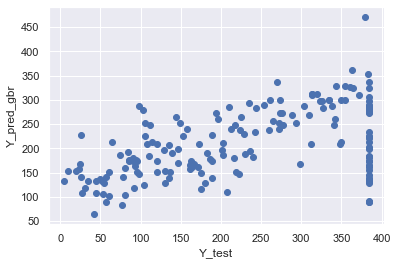

In [4728]:
gbr = GradientBoostingRegressor(max_depth=3, n_estimators=6, learning_rate=.4)
time.sleep(1)
print("GradientBoostingRegressor Training Score:----->", gbr.fit(x_train,y_train))
time.sleep(1)
print("*"*50)
time.sleep(1)
y_pred_gbr = gbr.predict(x_test)
print("GradientBoostingRegressor Testing score:------>", r2_score(y_test,y_pred_gbr))
time.sleep(2)
print("\n",'*'*50)

print("GBR CV Score:")
print(cross_val_score(gbr,x_scaled,y,cv=5))

time.sleep(2)
print("\n",'*'*50)

print("GBR CV Score:")
print(cross_val_score(gbr,x_scaled,y,cv=5).mean())

time.sleep(2)
print("\n",'*'*50)
print("GBR:")
plt.scatter(y_test,y_pred_gbr)
plt.xlabel('Y_test')
plt.ylabel('Y_pred_gbr')
plt.show()

In [4729]:
print("GBR:")
print('MAE:--------->',mean_absolute_error(y_test, y_pred_gbr))#calculate Mean absolute error
time.sleep(1)
print('MSE:----------->',mean_squared_error(y_test,y_pred_gbr))#calculate mean squared error
time.sleep(1)
print('RSME:--------->',np.sqrt(mean_squared_error(y_test,y_pred_gbr)))#calculate root mean square error

GBR:
MAE:---------> 81.81985577778804
MSE:-----------> 11542.623049844446
RSME:---------> 107.43660014094101


```Saving the model```

In [4731]:
df_test.drop(columns="YearBuilt", inplace = True)
time.sleep(1)
df_test.drop(columns="GrLivArea", inplace = True)
time.sleep(1)
df_test.drop(columns="MSSubClass", inplace = True)
time.sleep(1)
df_test.drop(columns="BldgType", inplace = True)
time.sleep(1)
df_test.drop(columns="TotalBsmtSF", inplace = True)
time.sleep(1)
df_test.drop(columns="1stFlrSF", inplace = True)

In [4732]:
with open('House_price_prediction','wb') as f:
     pickle.dump(rfo,f)

In [4733]:
df_test.head(5)

Id  MSZoning  LotFrontage  LotArea  Alley  LotShape  LandContour  \
293  751         3           47      356      1         0            3   
202  397         3           62      592      1         3            0   
843  726         1           79      253      0         3            3   
227  733         3           73      169      1         3            3   
577  118         3           68      293      0         0            3   

     LotConfig  LandSlope  Neighborhood  ...  WoodDeckSF  OpenPorchSF  Fence  \
293          4          0             7  ...         329          196      2   
202          0          1            18  ...         465           36      2   
843          4          0            20  ...         150          282      2   
227          4          0            11  ...         444            6      1   
577          4          0             4  ...         260           51      2   

     MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
293            2        6       6       2         8              4        260  
202            2        9      10       0         8              4        209  
843            2        7       8       3         6              5        384  
227            2        9       4       0         8              4        111  
577            2        1       8       3         8              4        262  

[5 rows x 65 columns]

```Preict the sale price```

In [4734]:
features_test = df_test.drop(["SalePrice"], axis = 1)
target_test = df_test.SalePrice

In [4736]:
with open('House_price_prediction','wb') as f:
     pickle.dump(rfo,f)

```Conculsion```

In [4737]:
loaded_model = pickle.load(open("House_price_prediction",'rb'))
result = loaded_model.score(features_test, target_test)
print(result)

-0.6430708254729836


In [4750]:
conclusion = pd.DataFrame([loaded_model.predict(features_test)[:], target_test[:]], index =["predicted","Orignal"])

In [4751]:
conclusion

0       1       2       3       4       5       6       7    \
predicted  314.33  312.83  314.52  314.49  314.86  313.17  316.82  314.25   
Orignal    260.00  209.00  384.00  111.00  262.00  384.00   57.00  264.00   

              8       9    ...     144     145    146     147    148    149  \
predicted  315.49  313.65  ...  319.91  313.91  313.7  318.03  315.4  314.0   
Orignal    147.00  384.00  ...  384.00   94.00  175.0  107.00  266.0  384.0   

              150     151     152     153  
predicted  316.27  314.88  315.14  315.29  
Orignal    270.00  323.00  136.00  136.00  

[2 rows x 154 columns]